# Housing:Price Prediction

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate 
market is one of the markets which is one of the major contributors in the world’s economy.

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy houses to enter the market.

For this company wants to know:
• Which variables are important to predict the price of variable?
• How do these variables describe the price of the house?


One has to model the price of houses with the available independent variables.

This is a regression problem as one has to predict the actual value of the prospective properties and decide whether to invest in them or not.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('house_price_prediction.csv')

In [3]:
data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2007        WD         Normal     128000  
1        10   2007        WD         Normal     268000  
2         6   2007        WD         Normal     269790  
3         1   2010       COD         Normal     190000  
4         6   2009        WD         Normal     215000  
...     ...    ...       ...            ...        ...  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[1168 rows x 81 columns]

In [4]:
df=pd.DataFrame(data)

In [5]:
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2007        WD         Normal     128000  
1        10   2007        WD         Normal     268000  
2         6   2007        WD         Normal     269790  
3         1   2010       COD         Normal     190000  
4         6   2009        WD         Normal     215000  
...     ...    ...       ...            ...        ...  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[1168 rows x 81 columns]

The dataset is having 1168 rows and 81 columns(features).

The feature named as Sale Price is the target variable.

In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
df.shape

(1168, 81)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

The dataset is a mix of integer,float ,object(categorical) datatype.
There are null values present in the dataset.

In [9]:
pd.set_option('display.max_rows',None)

In [10]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

There are null values present in features named as LotFrontage ,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence and MiscFeature                  

In [11]:
df1=df.copy()

In [12]:
df1['Alley']=df1['Alley'].replace(np.nan,'No alley access')

In [13]:
df1['Alley'].value_counts()

No alley access    1091
Grvl                 41
Pave                 36
Name: Alley, dtype: int64

The feature Alley is having third category as per the dataset information so i have replaced the nan values appearing in the alley feature with 'No alley access'.

In [14]:
df1['MasVnrType'].value_counts()

None       696
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64

In [15]:
df1['MasVnrType']=df1['MasVnrType'].replace(np.nan,'None')

The feature MasVnrType is having maximum records for None Type so the null values are replaced with the mode which is None in this case.

In [16]:
df1['MasVnrType'].value_counts()

None       703
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64

In [17]:
df1['BsmtQual'].value_counts()           

TA    517
Gd    498
Ex     94
Fa     29
Name: BsmtQual, dtype: int64

In [18]:
df1['BsmtQual']=df1['BsmtQual'].replace(np.nan,'No Basement')

The feature BsmtQual is having fifth category as NA i.e 'No Basement '.Further, the nan values are replaced with 'No Basement' in feature BsmtQual.

In [19]:
df1['BsmtQual'].value_counts()

TA             517
Gd             498
Ex              94
No Basement     30
Fa              29
Name: BsmtQual, dtype: int64

In [20]:
df1['BsmtCond'].value_counts()   

TA    1041
Gd      56
Fa      39
Po       2
Name: BsmtCond, dtype: int64

In [21]:
df1['BsmtCond']=df1['BsmtCond'].replace(np.nan,'No Basement')

The feature BsmtCond is having fifth category as NA i.e 'No Basement '.Further, the nan values are replaced with 'No Basement' in feature BsmtCond.

In [22]:
df1['BsmtExposure'].value_counts()

No    756
Av    180
Gd    108
Mn     93
Name: BsmtExposure, dtype: int64

In [23]:
df1['BsmtExposure']=df1['BsmtExposure'].replace(np.nan,'No Basement')

The feature BsmtExposure is having fifth category as NA i.e 'No Basement '.Further, the nan values are replaced with 'No Basement' in feature BsmtExposure.

In [24]:
df1['BsmtFinType1'].value_counts()  

Unf    345
GLQ    330
ALQ    174
BLQ    121
Rec    109
LwQ     59
Name: BsmtFinType1, dtype: int64

In [25]:
df1['BsmtFinType1']=df1['BsmtFinType1'].replace(np.nan,'No Basement')

The feature BsmtFinType1 is having seventh category as NA i.e 'No Basement '.Further, the nan values are replaced with 'No Basement' in feature  BsmtFinType1 .

In [26]:
df1['BsmtFinType1'].value_counts() 

Unf            345
GLQ            330
ALQ            174
BLQ            121
Rec            109
LwQ             59
No Basement     30
Name: BsmtFinType1, dtype: int64

In [27]:
df1['BsmtFinType2'].value_counts()  

Unf    1002
Rec      43
LwQ      40
BLQ      24
ALQ      16
GLQ      12
Name: BsmtFinType2, dtype: int64

In [28]:
df1['BsmtFinType2']=df1['BsmtFinType2'].replace(np.nan,'No Basement')

The feature BsmtFinType2 is having seventh category as NA i.e 'No Basement '.Further, the nan values are replaced with 'No Basement' in feature  BsmtFinType2 .

In [29]:
df1['FireplaceQu'].value_counts() 

Gd    301
TA    252
Fa     25
Ex     21
Po     18
Name: FireplaceQu, dtype: int64

In [30]:
df1['FireplaceQu']=df1['FireplaceQu'].replace(np.nan,'No Fireplace')

The feature FireplaceQu is having sixth category as NA i.e 'No Fireplace '. Further, the nan values are replaced with 'No Fireplace' in feature FireplaceQu.

In [31]:
df1['FireplaceQu'].value_counts() 

No Fireplace    551
Gd              301
TA              252
Fa               25
Ex               21
Po               18
Name: FireplaceQu, dtype: int64

In [32]:
df1['GarageType'].value_counts()

Attchd     691
Detchd     314
BuiltIn     70
Basment     16
CarPort      8
2Types       5
Name: GarageType, dtype: int64

In [33]:
df1['GarageType']=df1['GarageType'].replace(np.nan,'No Garage')

The feature GarageType is having seventh category as NA i.e 'No Garage '. Further, the nan values are replaced with 'No Garage' in feature GarageType.

In [34]:
df1['GarageType'].value_counts()

Attchd       691
Detchd       314
BuiltIn       70
No Garage     64
Basment       16
CarPort        8
2Types         5
Name: GarageType, dtype: int64

In [35]:
df1['GarageFinish'].value_counts()

Unf    487
RFn    339
Fin    278
Name: GarageFinish, dtype: int64

In [36]:
df1['GarageFinish']=df1['GarageFinish'].replace(np.nan,'No Garage')

the feature GarageFinish is having fourth category as NA i.e 'No Garage '. Further, the nan values are replaced with 'No Garage' in feature GarageFinish.

In [37]:
df1['GarageFinish'].value_counts()

Unf          487
RFn          339
Fin          278
No Garage     64
Name: GarageFinish, dtype: int64

In [38]:
df1['GarageQual'].value_counts()

TA    1050
Fa      39
Gd      11
Po       2
Ex       2
Name: GarageQual, dtype: int64

In [39]:
df1['GarageQual']=df1['GarageQual'].replace(np.nan,'No Garage')

The feature GarageQual is having sixth category as NA i.e 'No Garage '. Further, the nan values are replaced with 'No Garage' in feature GarageQual.

In [40]:
df1['GarageQual'].value_counts()

TA           1050
No Garage      64
Fa             39
Gd             11
Po              2
Ex              2
Name: GarageQual, dtype: int64

In [41]:
df1['GarageCond'].value_counts()

TA    1061
Fa      28
Gd       8
Po       6
Ex       1
Name: GarageCond, dtype: int64

In [42]:
df1['GarageCond']=df1['GarageCond'].replace(np.nan,'No Garage')

The feature GarageCond is having sixth category as NA i.e 'No Garage '. Further, the nan values are replaced with 'No Garage' in feature GarageCond.

In [43]:
df1['GarageCond'].value_counts()

TA           1061
No Garage      64
Fa             28
Gd              8
Po              6
Ex              1
Name: GarageCond, dtype: int64

In [44]:
df1['PoolQC'].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [45]:
df1['PoolQC']=df1['PoolQC'].replace(np.nan,'No Pool')

The feature PoolQC is having fifth category as NA i.e 'No Pool '. Further, the nan values are replaced with 'No Pool' in feature PoolQC.

In [46]:
df1['PoolQC'].value_counts()

No Pool    1161
Gd            3
Fa            2
Ex            2
Name: PoolQC, dtype: int64

In [47]:
df1['Fence'].value_counts()

MnPrv    129
GdPrv     51
GdWo      47
MnWw      10
Name: Fence, dtype: int64

In [48]:
df1['Fence']=df1['Fence'].replace(np.nan,'No Fence')

The feature Fence is having fifth category as NA i.e 'No Fence '. Further, the nan values are replaced with 'No Fence' in feature Fence.

In [49]:
df1['Fence'].value_counts()

No Fence    931
MnPrv       129
GdPrv        51
GdWo         47
MnWw         10
Name: Fence, dtype: int64

In [50]:
df1['MiscFeature'].value_counts()

Shed    40
Gar2     2
Othr     1
TenC     1
Name: MiscFeature, dtype: int64

In [51]:
df1['MiscFeature']=df1['MiscFeature'].replace(np.nan,'None')

The feature MiscFeature is having sixth category as NA i.e 'None '. Further, the nan values are replaced with 'None' in feature MiscFeature.

In [52]:
df1['LotFrontage']=df1['LotFrontage'].fillna(df1['LotFrontage'].mean())

The nan values in feature LotFrontage is replaced by the mean of that feature.

In [53]:
df1['MasVnrArea']=df1['MasVnrArea'].fillna(df1['MasVnrArea'].median())

The nan values in feature MasVnrArea  is replaced by the median of that feature.

In [54]:
df1['GarageYrBlt'].value_counts()

2006.0    52
2005.0    51
2007.0    40
2003.0    37
2004.0    36
1998.0    25
1977.0    24
2002.0    23
1999.0    23
2008.0    21
1976.0    20
1993.0    20
1957.0    18
1968.0    18
1966.0    18
1950.0    18
2001.0    18
2009.0    18
1962.0    18
2000.0    18
1997.0    17
1974.0    17
1995.0    17
1958.0    17
1965.0    17
1960.0    16
1994.0    15
1990.0    14
1954.0    14
1959.0    14
1978.0    14
1969.0    14
1970.0    14
1964.0    13
1961.0    13
1996.0    13
1963.0    13
1956.0    13
1940.0    12
1971.0    12
1920.0    12
1988.0    12
1955.0    12
1980.0    12
1979.0    11
1973.0    10
1967.0    10
1992.0    10
1981.0    10
1985.0     9
1948.0     9
1972.0     9
1953.0     9
1987.0     8
1975.0     8
1989.0     8
1983.0     7
1925.0     7
1941.0     7
1949.0     7
1991.0     7
1986.0     6
1930.0     6
1939.0     6
1951.0     5
1936.0     5
1926.0     4
1945.0     4
1984.0     4
1916.0     4
1935.0     4
1946.0     4
1932.0     3
1923.0     3
1952.0     3
1931.0     3
1922.0     3

The maximum records i.e 52 for feature GarageYrBlt are for garage built in year 2006. Further, the nan values in feature GarageYrBlt will be replaced by the maximum records i.e 2006 in this case.

In [55]:
df2=df1.copy()

In [56]:
df2['GarageYrBlt']=df2['GarageYrBlt'].replace(np.nan,2006.0)

In [57]:
df2['GarageYrBlt'].value_counts()

2006.0    116
2005.0     51
2007.0     40
2003.0     37
2004.0     36
1998.0     25
1977.0     24
2002.0     23
1999.0     23
2008.0     21
1976.0     20
1993.0     20
1957.0     18
1968.0     18
1966.0     18
1950.0     18
2001.0     18
2009.0     18
1962.0     18
2000.0     18
1997.0     17
1974.0     17
1995.0     17
1958.0     17
1965.0     17
1960.0     16
1994.0     15
1990.0     14
1954.0     14
1959.0     14
1978.0     14
1969.0     14
1970.0     14
1964.0     13
1961.0     13
1996.0     13
1963.0     13
1956.0     13
1940.0     12
1971.0     12
1920.0     12
1988.0     12
1955.0     12
1980.0     12
1979.0     11
1973.0     10
1967.0     10
1992.0     10
1981.0     10
1985.0      9
1948.0      9
1972.0      9
1953.0      9
1987.0      8
1975.0      8
1989.0      8
1983.0      7
1925.0      7
1941.0      7
1949.0      7
1991.0      7
1986.0      6
1930.0      6
1939.0      6
1951.0      5
1936.0      5
1926.0      4
1945.0      4
1984.0      4
1916.0      4
1935.0      4
1946.0

In [58]:
df2.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

There are no null values present in the dataset.

In [59]:
df2['MSSubClass'].value_counts()

20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64

<AxesSubplot:xlabel='MSSubClass', ylabel='count'>

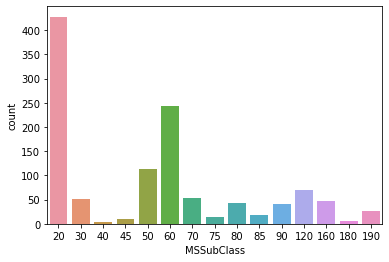

In [60]:
sns.countplot(df2['MSSubClass'])

The maximum records i.e 428 out of 1168 are for MSSubclass 20 i.e 1-STORY 1946 & NEWER ALL STYLES type of dwelling involved in sale.

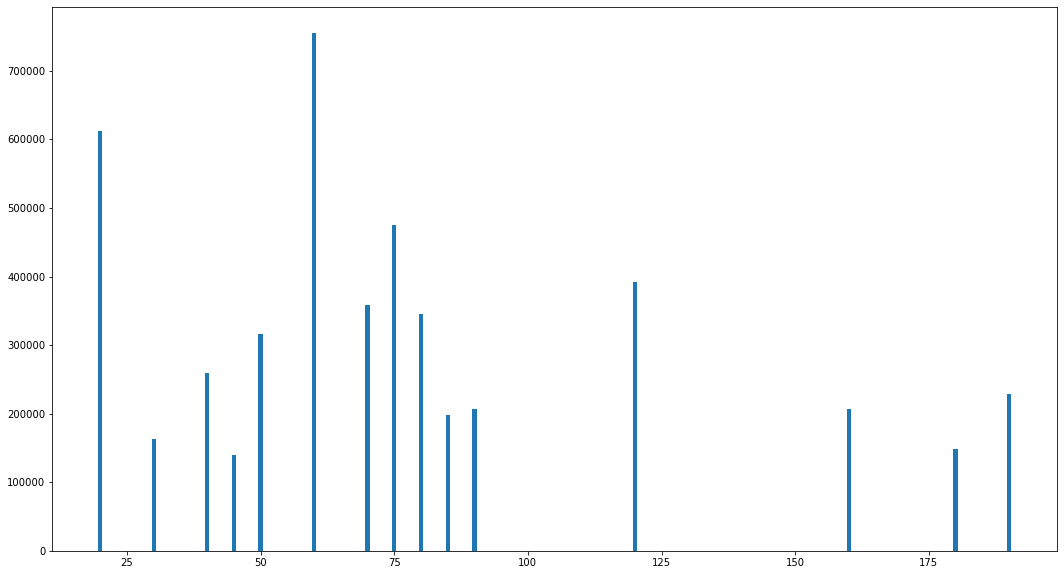

In [61]:
plt.figure(figsize=[18,10])
plt.bar(df2['MSSubClass'],df2['SalePrice'])
plt.show()


The dwelling type 60 2-STORY 1946 & NEWER is having the highest sale price i.e 755000$

<AxesSubplot:xlabel='MSZoning', ylabel='count'>

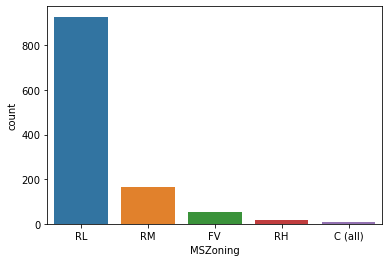

In [62]:
sns.countplot(df2['MSZoning'])

In [63]:
df2['MSZoning'].value_counts()

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64

The maximum records i.e 928 out of 1168 are for RL i.e Residential Low Density type of zoning.

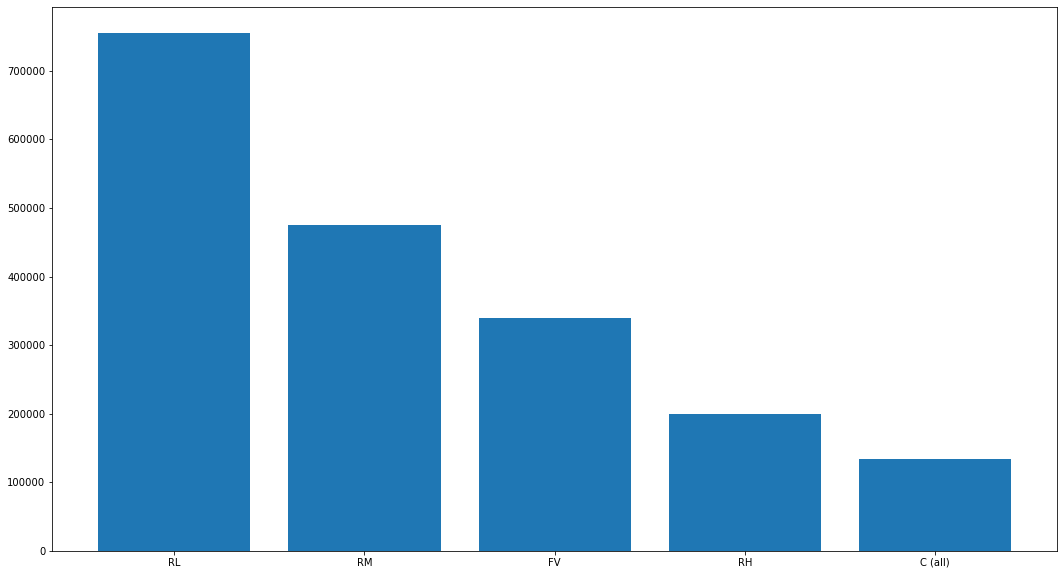

In [64]:
plt.figure(figsize=[18,10])
plt.bar(df2['MSZoning'],df2['SalePrice'])
plt.show()

The RL i.e residential low density type of MSzoning is expensive as compared to other categories.
The C(all) i.e Commercial type of MSzoning is cheaper as compared to other categories.

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

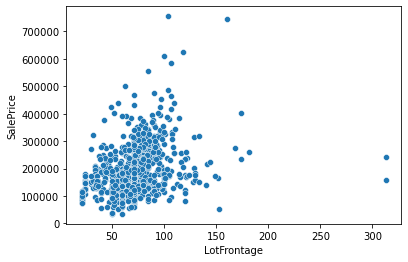

In [65]:
sns.scatterplot(x='LotFrontage',y='SalePrice',data=df2)

There is a linear positive relationship between LotFrontage( Linear feet of street connected to property)and the SalePrice.

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

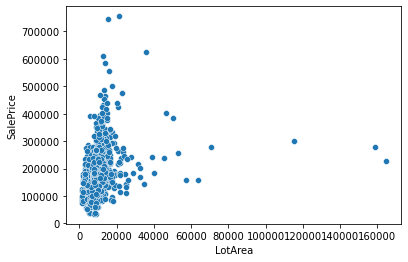

In [66]:
sns.scatterplot(x='LotArea',y='SalePrice',data=df2)

There is a linear positive relationship between LotArea( Linear feet of street connected to property)and the SalePrice.

<AxesSubplot:xlabel='Street', ylabel='count'>

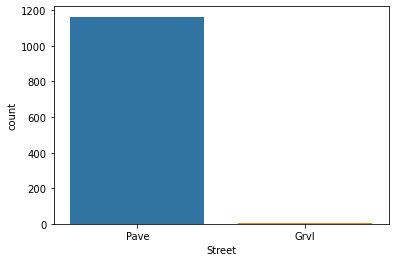

In [67]:
sns.countplot(df2['Street'])

In [68]:
df2['Street'].value_counts()

Pave    1164
Grvl       4
Name: Street, dtype: int64

The maximum records i.e 1164 out of 1168 are for Paved type of road connectivity to the property.

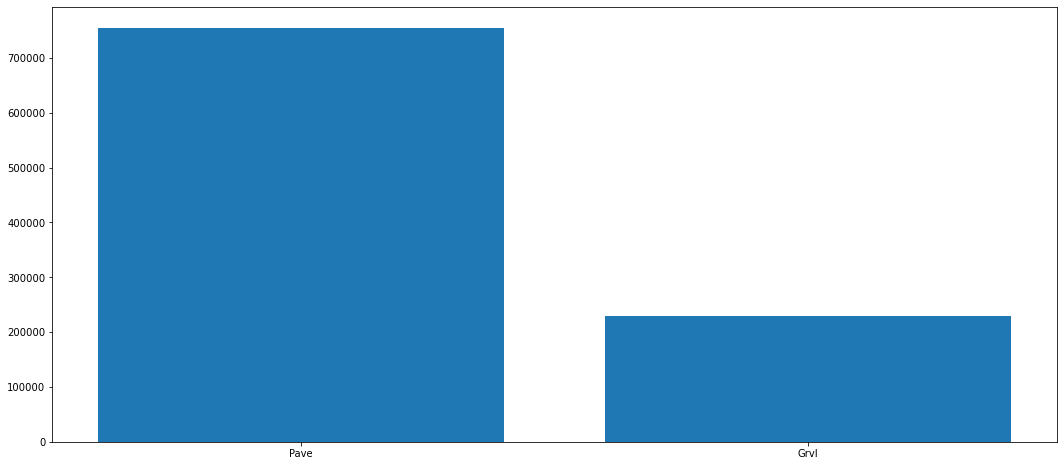

In [69]:
plt.figure(figsize=[18,8])
plt.bar(df2['Street'],df2['SalePrice'])
plt.show()

Paved type of road access to the properties are expensive as compared to other category.

<AxesSubplot:xlabel='Alley', ylabel='count'>

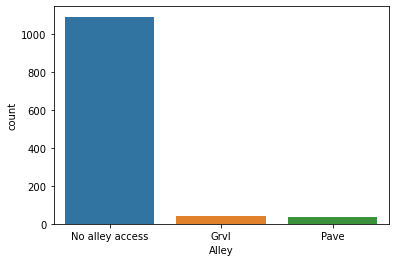

In [70]:
sns.countplot(df2['Alley'])

In [71]:
df2['Alley'].value_counts()

No alley access    1091
Grvl                 41
Pave                 36
Name: Alley, dtype: int64

The maximum records i.e 1091 out of 1168 are for No alley access.

<AxesSubplot:xlabel='LotShape', ylabel='count'>

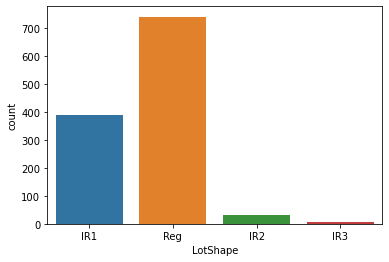

In [72]:
sns.countplot(df2['LotShape'])

In [73]:
df2['LotShape'].value_counts()

Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64

The maximum records i.e 740 out of 1168 are for the properties with regular shape.

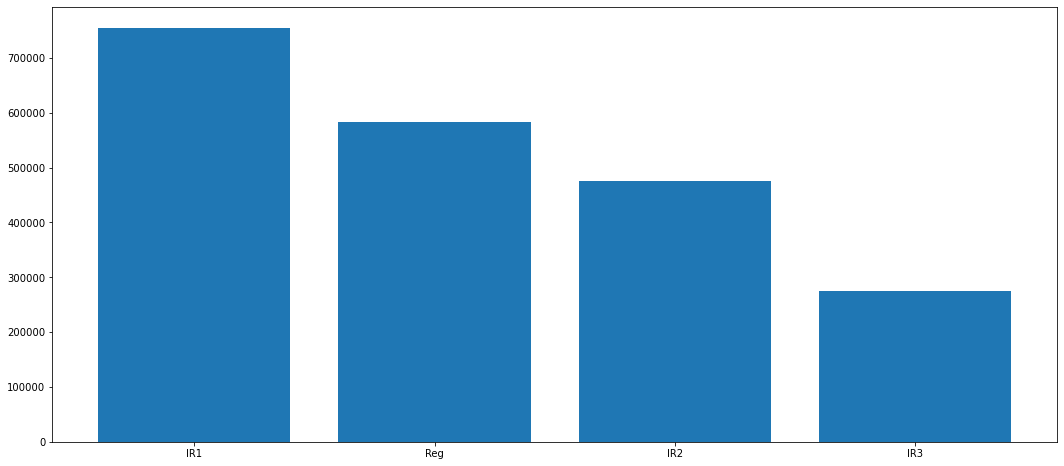

In [74]:
plt.figure(figsize=[18,8])
plt.bar(df2['LotShape'],df2['SalePrice'])
plt.show()

Slightly irregular shape properties are expensive as compared to other categories. 

<AxesSubplot:xlabel='LandContour', ylabel='count'>

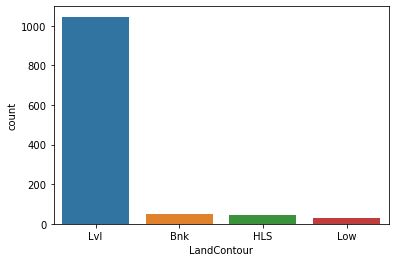

In [75]:
sns.countplot(df2['LandContour'])

In [76]:
df2['LandContour'].value_counts()

Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64

The maximum records i.e 1046 out of 1168 are of lvl (Near Flat/Level).

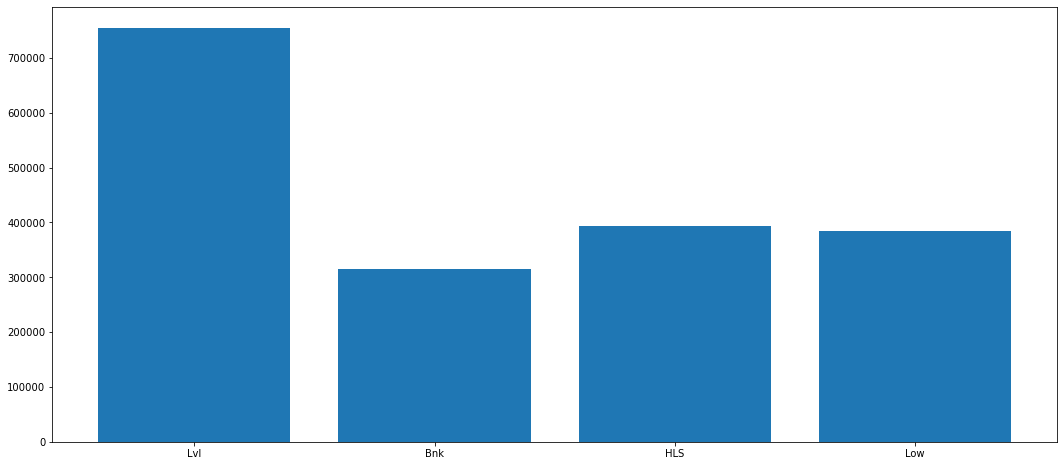

In [77]:
plt.figure(figsize=[18,8])
plt.bar(df2['LandContour'],df2['SalePrice'])
plt.show()

Nearly flat properties are expensive as compared to other categories.

<AxesSubplot:xlabel='Utilities', ylabel='count'>

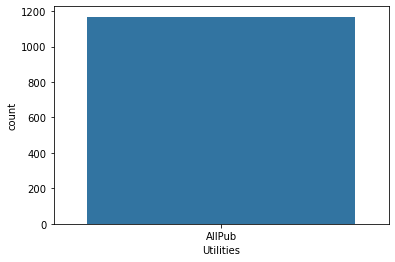

In [78]:
sns.countplot(df2['Utilities'])

All the records in the dataset related to the property sold  are having all utilities facility i.e ELectricity, Gas, water and Sewage.

<AxesSubplot:xlabel='LotConfig', ylabel='count'>

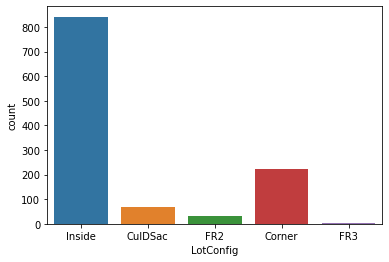

In [79]:
sns.countplot(df2['LotConfig'])

In [80]:
df2['LotConfig'].value_counts()

Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64

The maximum records i.e 842 out of 1168 are for inside lot type of Lot configuration.

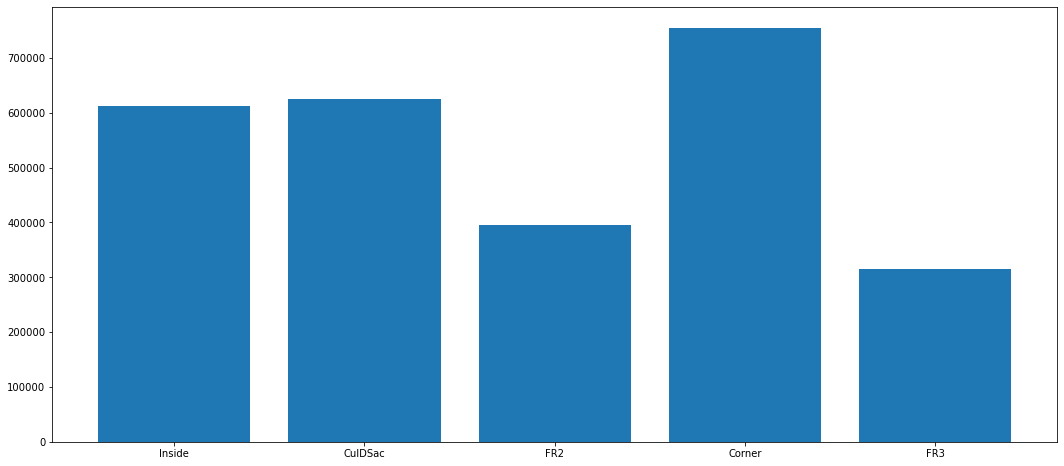

In [81]:
plt.figure(figsize=[18,8])
plt.bar(df2['LotConfig'],df2['SalePrice'])
plt.show()

Corner type of lot configuration are expensive as compared to other categories.

<AxesSubplot:xlabel='LandSlope', ylabel='count'>

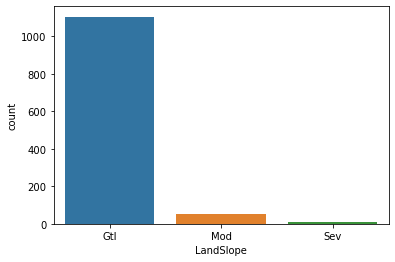

In [82]:
sns.countplot(df2['LandSlope'])

In [83]:
df2['LandSlope'].value_counts()

Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64

The maximum records i.e 1105 out of 1168 are for gentle slope type of property classification.

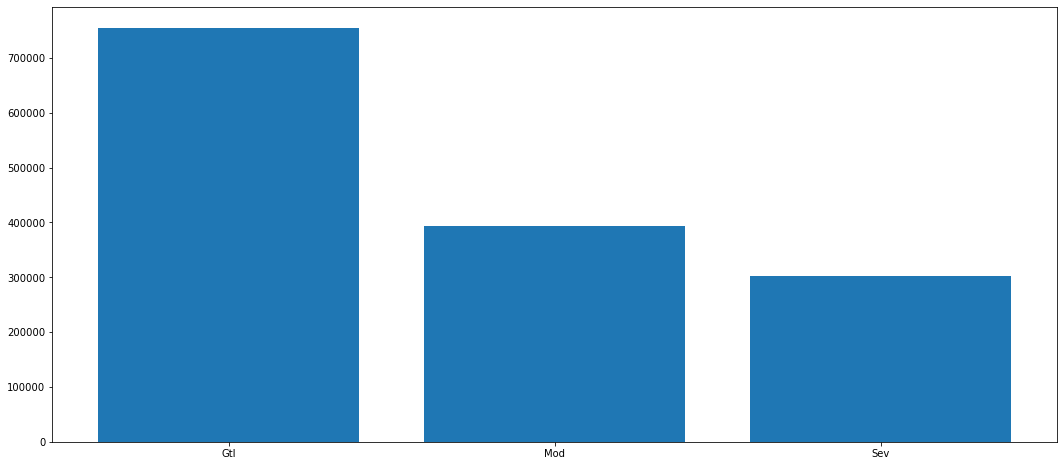

In [84]:
plt.figure(figsize=[18,8])
plt.bar(df2['LandSlope'],df2['SalePrice'])
plt.show()

The properties having gentle slope are expensive as compared to other categories. 

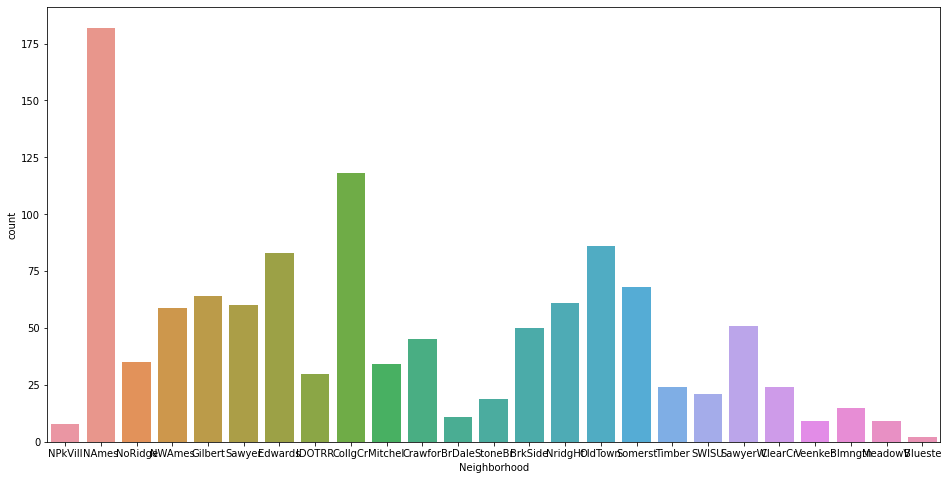

In [85]:
plt.figure(figsize=[16,8])
sns.countplot(df2['Neighborhood'])
plt.show()

In [86]:
df2['Neighborhood'].value_counts()

NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
ClearCr     24
Timber      24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
MeadowV      9
Veenker      9
NPkVill      8
Blueste      2
Name: Neighborhood, dtype: int64

The maximum records i.e 182 out of 1168 are for Names (North Ames) as a neighbourhood location.

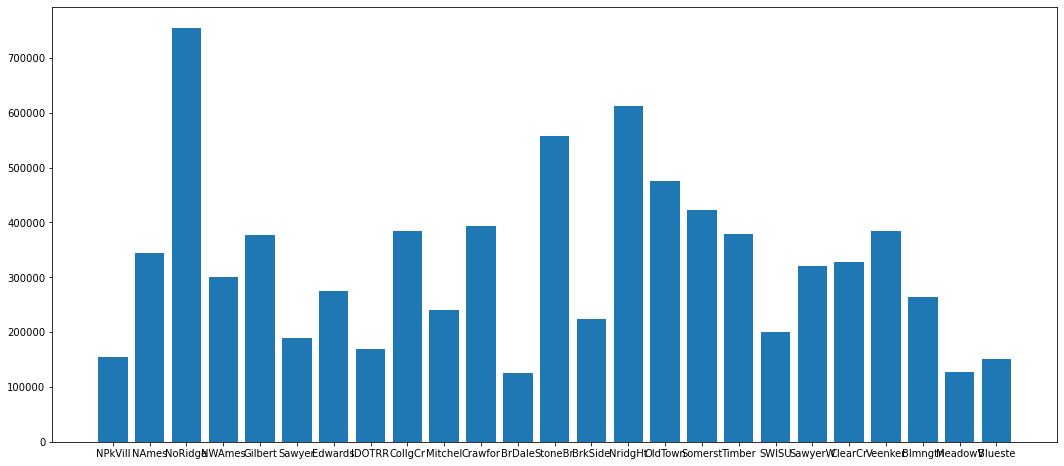

In [87]:
plt.figure(figsize=[18,8])
plt.bar(df2['Neighborhood'],df2['SalePrice'])
plt.show()

In [88]:
pd.crosstab(df2['Neighborhood'],df2['SalePrice'],margins=True)

SalePrice     34900  35311  37900  39300  40000  52000  52500  55000  55993  \
Neighborhood                                                                  
Blmngtn           0      0      0      0      0      0      0      0      0   
Blueste           0      0      0      0      0      0      0      0      0   
BrDale            0      0      0      0      0      0      0      0      0   
BrkSide           0      0      0      1      0      1      0      0      0   
ClearCr           0      0      0      0      0      0      0      0      0   
CollgCr           0      0      0      0      0      0      0      0      0   
Crawfor           0      0      0      0      0      0      0      0      0   
Edwards           0      0      0      0      0      0      0      0      0   
Gilbert           0      0      0      0      0      0      0      0      0   
IDOTRR            1      1      0      0      1      0      0      1      1   
MeadowV           0      0      0      0      0      0      0      0      0   
Mitchel           0      0      0      0      0      0      0      0      0   
NAmes             0      0      0      0      0      0      0      0      0   
NPkVill           0      0      0      0      0      0      0      0      0   
NWAmes            0      0      0      0      0      0      0      0      0   
NoRidge           0      0      0      0      0      0      0      0      0   
NridgHt           0      0      0      0      0      0      0      0      0   
OldTown           0      0      1      0      0      0      1      0      0   
SWISU             0      0      0      0      0      0      0      0      0   
Sawyer            0      0      0      0      0      0      0      0      0   
SawyerW           0      0      0      0      0      0      0      0      0   
Somerst           0      0      0      0      0      0      0      0      0   
StoneBr           0      0      0      0      0      0      0      0      0   
Timber            0      0      0      0      0      0      0      0      0   
Veenker           0      0      0      0      0      0      0      0      0   
All               1      1      1      1      1      1      1      1      1   

SalePrice     58500  ...  475000  485000  501837  556581  582933  611657  \
Neighborhood         ...                                                   
Blmngtn           0  ...       0       0       0       0       0       0   
Blueste           0  ...       0       0       0       0       0       0   
BrDale            0  ...       0       0       0       0       0       0   
BrkSide           0  ...       0       0       0       0       0       0   
ClearCr           0  ...       0       0       0       0       0       0   
CollgCr           0  ...       0       0       0       0       0       0   
Crawfor           0  ...       0       0       0       0       0       0   
Edwards           1  ...       0       0       0       0       0       0   
Gilbert           0  ...       0       0       0       0       0       0   
IDOTRR            0  ...       0       0       0       0       0       0   
MeadowV           0  ...       0       0       0       0       0       0   
Mitchel           0  ...       0       0       0       0       0       0   
NAmes             0  ...       0       0       0       0       0       0   
NPkVill           0  ...       0       0       0       0       0       0   
NWAmes            0  ...       0       0       0       0       0       0   
NoRidge           0  ...       0       0       0       0       0       0   
NridgHt           0  ...       0       1       0       0       1       1   
OldTown           0  ...       1       0       0       0       0       0   
SWISU             0  ...       0       0       0       0       0       0   
Sawyer            0  ...       0       0       0       0       0       0   
SawyerW           0  ...       0       0       0       0       0       0   
Somerst           0  ...       0       

The properties having neighborhood NoRidge are expensive as compared to other neighborhoods.

<AxesSubplot:xlabel='BldgType', ylabel='count'>

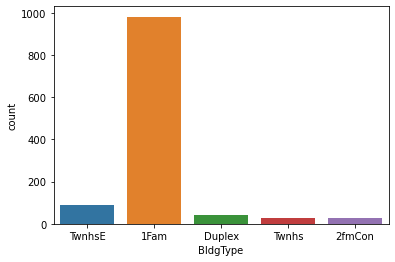

In [89]:
sns.countplot(df2['BldgType'])

In [90]:
df2['BldgType'].value_counts()

1Fam      981
TwnhsE     90
Duplex     41
Twnhs      29
2fmCon     27
Name: BldgType, dtype: int64

The maximum records i.e 981 out of 1168 are for Single-family Detached type of dwelling.

<AxesSubplot:xlabel='HouseStyle', ylabel='count'>

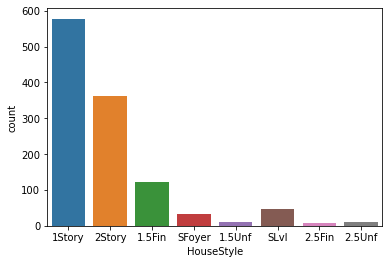

In [91]:
sns.countplot(df2['HouseStyle'])

In [92]:
df2['HouseStyle'].value_counts()

1Story    578
2Story    361
1.5Fin    121
SLvl       47
SFoyer     32
1.5Unf     12
2.5Unf     10
2.5Fin      7
Name: HouseStyle, dtype: int64

The maximum records i.e 578 out of 1168 are for One storey housestyle.

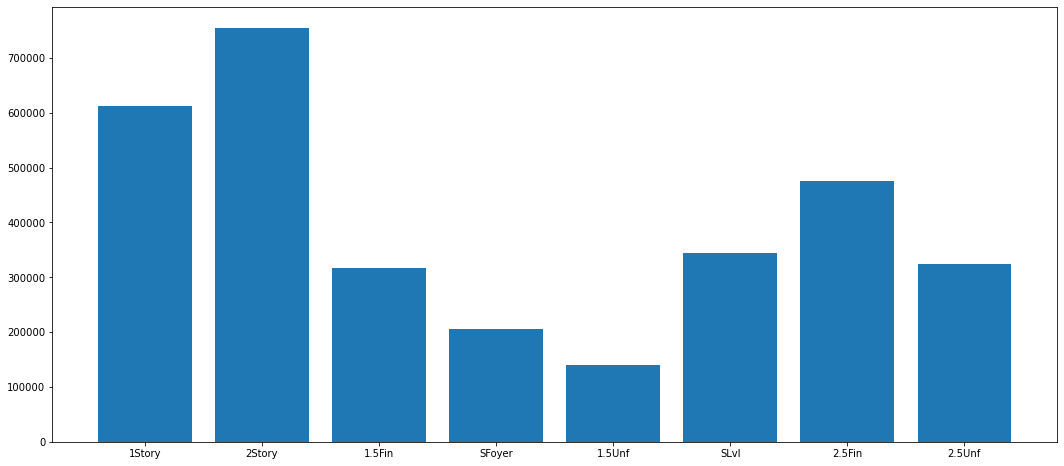

In [93]:
plt.figure(figsize=[18,8])
plt.bar(df2['HouseStyle'],df2['SalePrice'])
plt.show()

Two Storey style of dwelling are expensive as compared to other style of dwelling.

<AxesSubplot:xlabel='OverallQual', ylabel='count'>

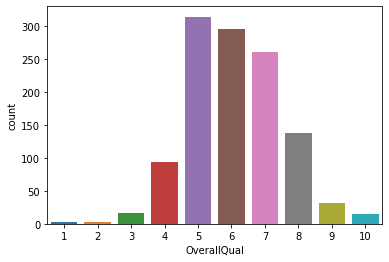

In [94]:
sns.countplot(df2['OverallQual'])

In [95]:
df2['OverallQual'].value_counts()

5     314
6     295
7     260
8     138
4      93
9      32
3      16
10     15
2       3
1       2
Name: OverallQual, dtype: int64

The maximum records i.e 314 out of 1168 are for rating 5 i.e average,pertaining to overall material used and finishing of the house.

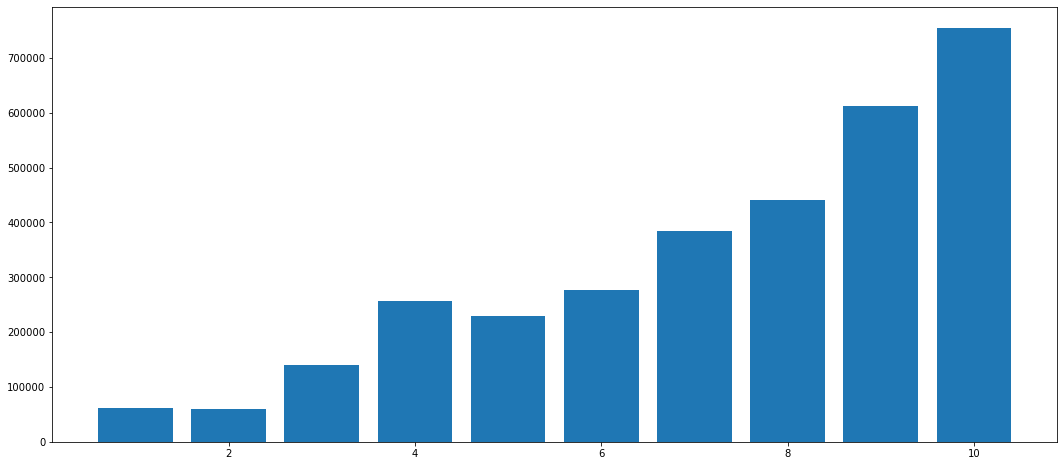

In [96]:
plt.figure(figsize=[18,8])
plt.bar(df2['OverallQual'],df2['SalePrice'])
plt.show()

The house with overall rating 10 i.e very excellent are expensive. Further, as the rating keeps on going up the prices of the house also increases.

<AxesSubplot:xlabel='OverallCond', ylabel='count'>

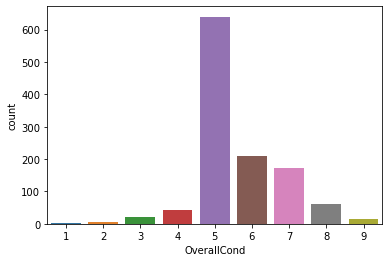

In [97]:
sns.countplot(df2['OverallCond'])

In [98]:
df2['OverallCond'].value_counts()

5    640
6    209
7    172
8     61
4     43
3     21
9     16
2      5
1      1
Name: OverallCond, dtype: int64

The maximum records i.e 640 out of 1168 are for rating 5 i.e average,pertaining to overall condition of the house.

<AxesSubplot:xlabel='RoofStyle', ylabel='count'>

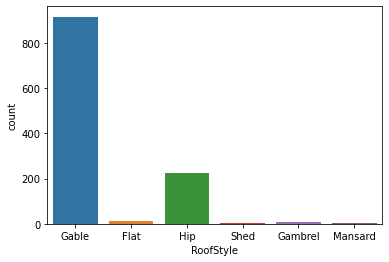

In [99]:
sns.countplot(df2['RoofStyle'])

In [100]:
df2['RoofStyle'].value_counts()

Gable      915
Hip        225
Flat        12
Gambrel      9
Mansard      5
Shed         2
Name: RoofStyle, dtype: int64

The maximum records i.e 915 out of 1168 are for Gable Roofstyle.

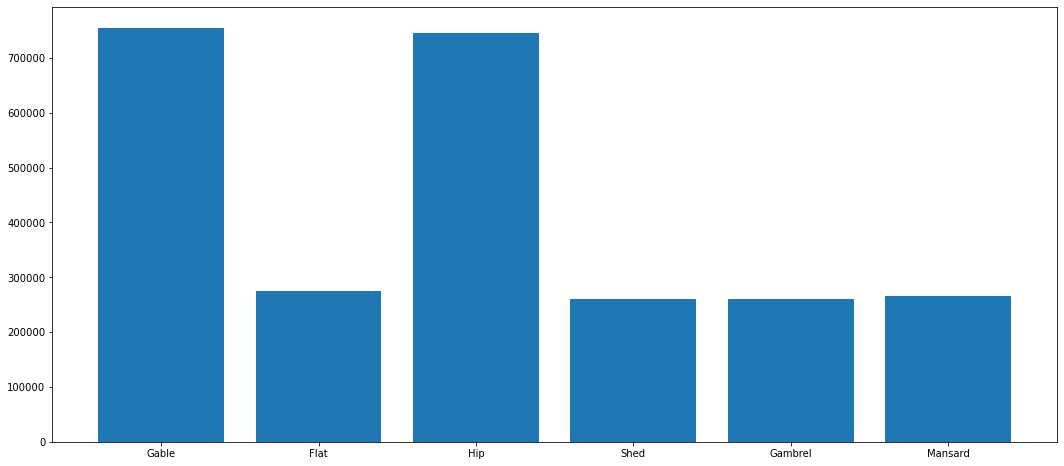

In [101]:
plt.figure(figsize=[18,8])
plt.bar(df2['RoofStyle'],df2['SalePrice'])
plt.show()

In [102]:
pd.crosstab(df2['RoofStyle'],df2['SalePrice'],margins=True)

SalePrice  34900  35311  37900  39300  40000  52000  52500  55000  55993  \
RoofStyle                                                                  
Flat           0      0      0      0      0      0      0      0      0   
Gable          1      1      1      1      0      1      1      1      0   
Gambrel        0      0      0      0      1      0      0      0      0   
Hip            0      0      0      0      0      0      0      0      1   
Mansard        0      0      0      0      0      0      0      0      0   
Shed           0      0      0      0      0      0      0      0      0   
All            1      1      1      1      1      1      1      1      1   

SalePrice  58500  ...  475000  485000  501837  556581  582933  611657  625000  \
RoofStyle         ...                                                           
Flat           0  ...       0       0       0       0       0       0       0   
Gable          1  ...       1       0       0       0       0       0       0   
Gambrel        0  ...       0       0       0       0       0       0       0   
Hip            0  ...       0       1       1       1       1       1       1   
Mansard        0  ...       0       0       0       0       0       0       0   
Shed           0  ...       0       0       0       0       0       0       0   
All            1  ...       1       1       1       1       1       1       1   

SalePrice  745000  755000   All  
RoofStyle                        
Flat            0       0    12  
Gable           0       1   915  
Gambrel         0       0     9  
Hip             1       0   225  
Mansard         0       0     5  
Shed            0       0     2  
All             1       1  1168  

[7 rows x 582 columns]

The house with gable roofstyle are expensive as compared to others roofstyles.

<AxesSubplot:xlabel='RoofMatl', ylabel='count'>

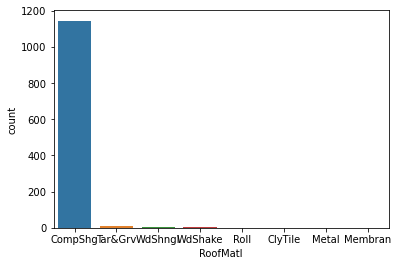

In [103]:
sns.countplot(df2['RoofMatl'])

In [104]:
df2['RoofMatl'].value_counts()

CompShg    1144
Tar&Grv      10
WdShngl       6
WdShake       4
Roll          1
Metal         1
ClyTile       1
Membran       1
Name: RoofMatl, dtype: int64

The maximum records i.e 1144 out of 1168 are for Standard (Composite) Shingle used as a Roof material.

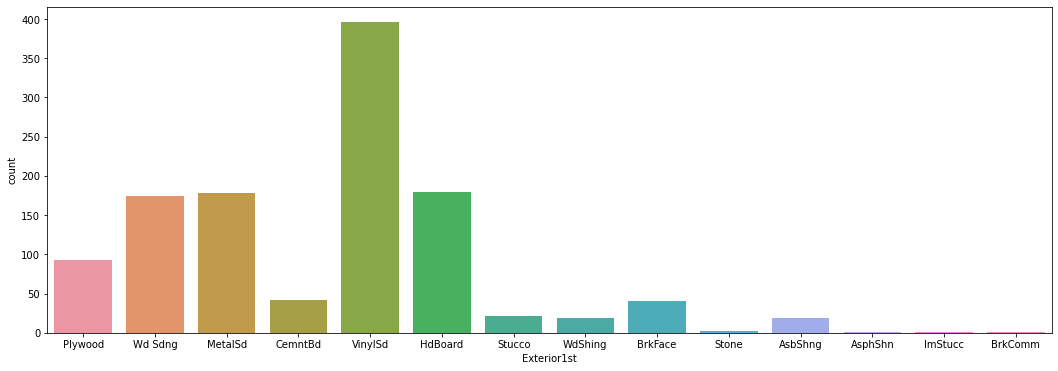

In [105]:
plt.figure(figsize=[18,6])
sns.countplot(df2['Exterior1st'])
plt.show()

In [106]:
df2['Exterior1st'].value_counts()

VinylSd    396
HdBoard    179
MetalSd    178
Wd Sdng    174
Plywood     93
CemntBd     42
BrkFace     41
Stucco      22
AsbShng     19
WdShing     19
Stone        2
ImStucc      1
BrkComm      1
AsphShn      1
Name: Exterior1st, dtype: int64

The maximum records i.e 396 out of 1168 are for VinylSd (Vinyl Siding) as an exterior covering on house.

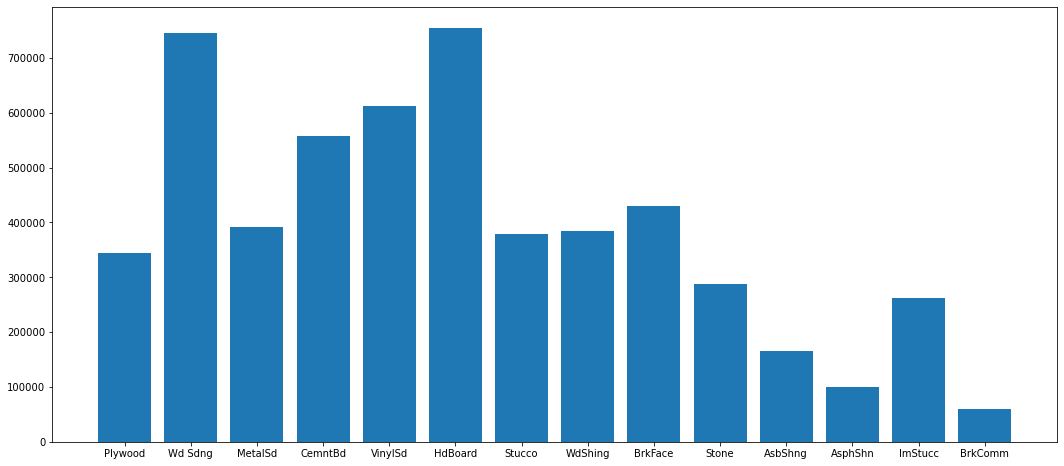

In [107]:
plt.figure(figsize=[18,8])
plt.bar(df2['Exterior1st'],df2['SalePrice'])
plt.show()

In [108]:
pd.crosstab(df2['Exterior1st'],df2['SalePrice'],margins=True)

SalePrice    34900  35311  37900  39300  40000  52000  52500  55000  55993  \
Exterior1st                                                                  
AsbShng          0      1      0      0      0      0      0      1      0   
AsphShn          0      0      0      0      0      0      0      0      0   
BrkComm          0      0      0      0      0      0      0      0      0   
BrkFace          0      0      0      0      1      0      0      0      0   
CemntBd          0      0      0      0      0      0      0      0      0   
HdBoard          0      0      0      0      0      0      0      0      0   
ImStucc          0      0      0      0      0      0      0      0      0   
MetalSd          0      0      0      0      0      0      0      0      0   
Plywood          0      0      0      0      0      0      0      0      0   
Stone            0      0      0      0      0      0      0      0      0   
Stucco           0      0      0      0      0      0      0      0      0   
VinylSd          0      0      1      1      0      1      0      0      0   
Wd Sdng          1      0      0      0      0      0      1      0      1   
WdShing          0      0      0      0      0      0      0      0      0   
All              1      1      1      1      1      1      1      1      1   

SalePrice    58500  ...  475000  485000  501837  556581  582933  611657  \
Exterior1st         ...                                                   
AsbShng          0  ...       0       0       0       0       0       0   
AsphShn          0  ...       0       0       0       0       0       0   
BrkComm          0  ...       0       0       0       0       0       0   
BrkFace          0  ...       0       0       0       0       0       0   
CemntBd          0  ...       0       0       0       1       0       0   
HdBoard          0  ...       0       0       0       0       0       0   
ImStucc          0  ...       0       0       0       0       0       0   
MetalSd          0  ...       0       0       0       0       0       0   
Plywood          0  ...       0       0       0       0       0       0   
Stone            0  ...       0       0       0       0       0       0   
Stucco           1  ...       0       0       0       0       0       0   
VinylSd          0  ...       0       1       1       0       1       1   
Wd Sdng          0  ...       1       0       0       0       0       0   
WdShing          0  ...       0       0       0       0       0       0   
All              1  ...       1       1       1       1       1       1   

SalePrice    625000  745000  755000   All  
Exterior1st                                
AsbShng           0       0       0    19  
AsphShn           0       0       0     1  
BrkComm           0       0       0     1  
BrkFace           0       0       0    41  
CemntBd           0       0       0    42  
HdBoard           1       0       1   179  
ImStucc           0       0       0     1  
MetalSd           0       0       0   178  
Plywood           0       0       0    93  
Stone             0       0       0     2  
Stucco            0       0       0    22  
VinylSd           0       0       0   396  
Wd Sdng           0       1       0   174  
WdShing           0       0       0    19  
All               1       1       1  1168  

[15 rows x 582 columns]

HdBoard(Hard Board)type of exterior coverings on house are expensive as compared to other categories of house.

<AxesSubplot:xlabel='MasVnrType', ylabel='count'>

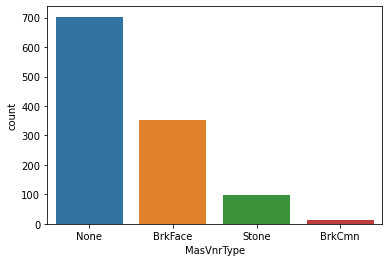

In [109]:
sns.countplot(df2['MasVnrType'])

In [110]:
df2['MasVnrType'].value_counts()

None       703
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64

The maximum records i.e 703 out of 1168 are for None i.e houses are not having any of the masonry veener.

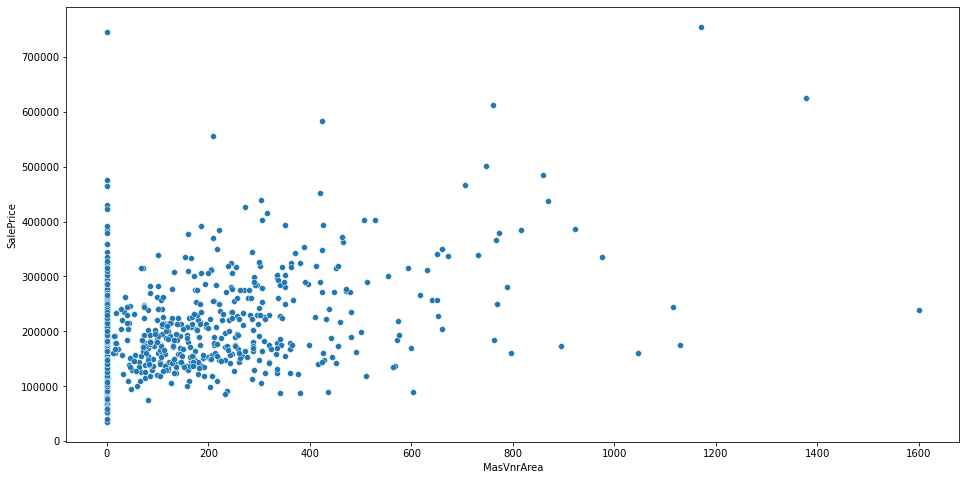

In [111]:
plt.figure(figsize=[16,8])
sns.scatterplot(x='MasVnrArea',y='SalePrice',data=df2)
plt.show()

There is a positive linear relationship between the features MasVnrArea and the Sale price.

<AxesSubplot:xlabel='ExterQual', ylabel='count'>

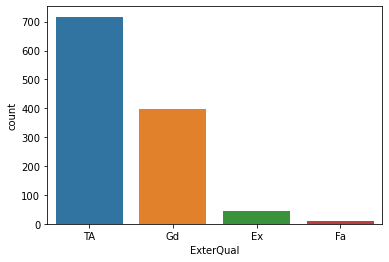

In [112]:
sns.countplot(df2['ExterQual'])

In [113]:
df2['ExterQual'].value_counts()

TA    717
Gd    397
Ex     43
Fa     11
Name: ExterQual, dtype: int64

The maximum records i.e 717 out of 1168 are for TA (Average/Typical) pertaining to the quality of the material on the exterior.

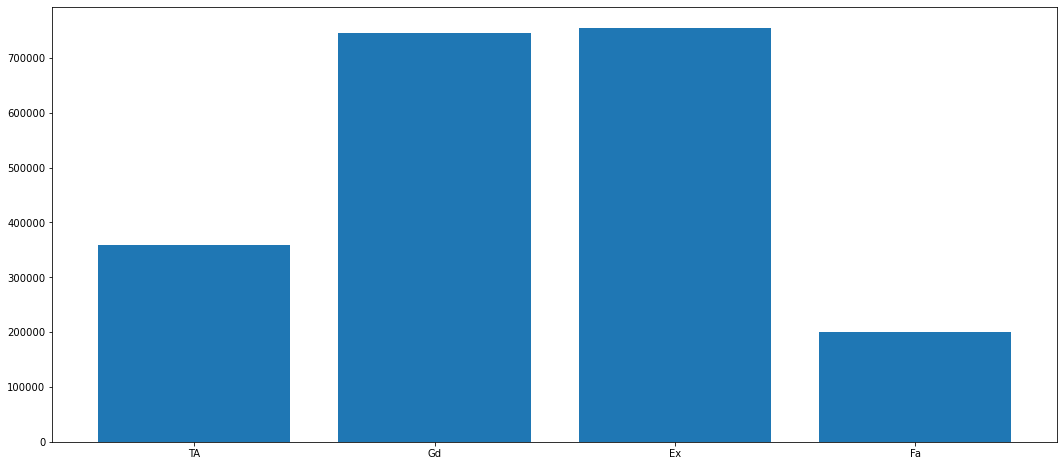

In [114]:
plt.figure(figsize=[18,8])
plt.bar(df2['ExterQual'],df2['SalePrice'])
plt.show()

In [115]:
pd.crosstab(df2['ExterQual'],df2['SalePrice'],margins=True)

SalePrice  34900  35311  37900  39300  40000  52000  52500  55000  55993  \
ExterQual                                                                  
Ex             0      0      0      0      0      0      0      0      0   
Fa             0      0      0      1      0      0      0      0      1   
Gd             0      0      0      0      0      1      0      0      0   
TA             1      1      1      0      1      0      1      1      0   
All            1      1      1      1      1      1      1      1      1   

SalePrice  58500  ...  475000  485000  501837  556581  582933  611657  625000  \
ExterQual         ...                                                           
Ex             0  ...       0       1       1       0       1       1       0   
Fa             0  ...       0       0       0       0       0       0       0   
Gd             0  ...       1       0       0       1       0       0       1   
TA             1  ...       0       0       0       0       0       0       0   
All            1  ...       1       1       1       1       1       1       1   

SalePrice  745000  755000   All  
ExterQual                        
Ex              0       1    43  
Fa              0       0    11  
Gd              1       0   397  
TA              0       0   717  
All             1       1  1168  

[5 rows x 582 columns]

The quality of the material used on the exterior of the house is also an important factor while determining the price of the house. Further, the one's with the excellent rating/categories are expensive as compared to others.

<AxesSubplot:xlabel='Foundation', ylabel='count'>

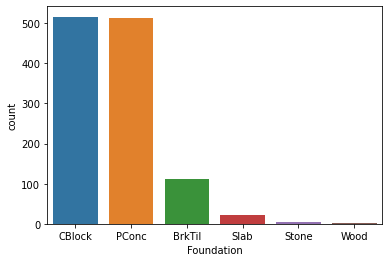

In [116]:
sns.countplot(df2['Foundation'])

In [117]:
df2['Foundation'].value_counts()

CBlock    516
PConc     513
BrkTil    112
Slab       21
Stone       5
Wood        1
Name: Foundation, dtype: int64

The maximum records i.e 516 out of 1168 are for CBlock i.e Cinder block type of foundations.

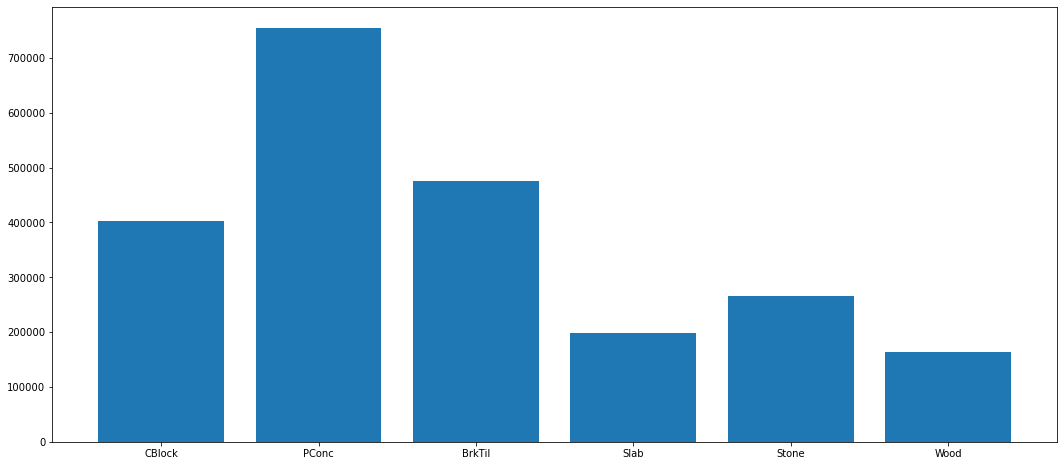

In [118]:
plt.figure(figsize=[18,8])
plt.bar(df2['Foundation'],df2['SalePrice'])
plt.show()

The houses with poured concrete foundation are expensive as compared to other categories of foundation.

<AxesSubplot:xlabel='BsmtQual', ylabel='count'>

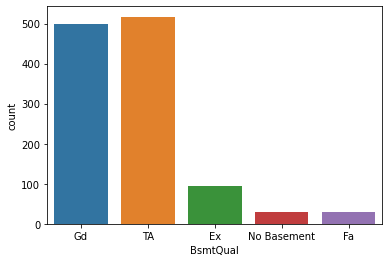

In [119]:
sns.countplot(df2['BsmtQual'])

In [120]:
df2['BsmtQual'].value_counts()

TA             517
Gd             498
Ex              94
No Basement     30
Fa              29
Name: BsmtQual, dtype: int64

The maximum records i.e 517 out of 1168 are for TA (Typical (80-89 inches))pertaining to the height of the basement.

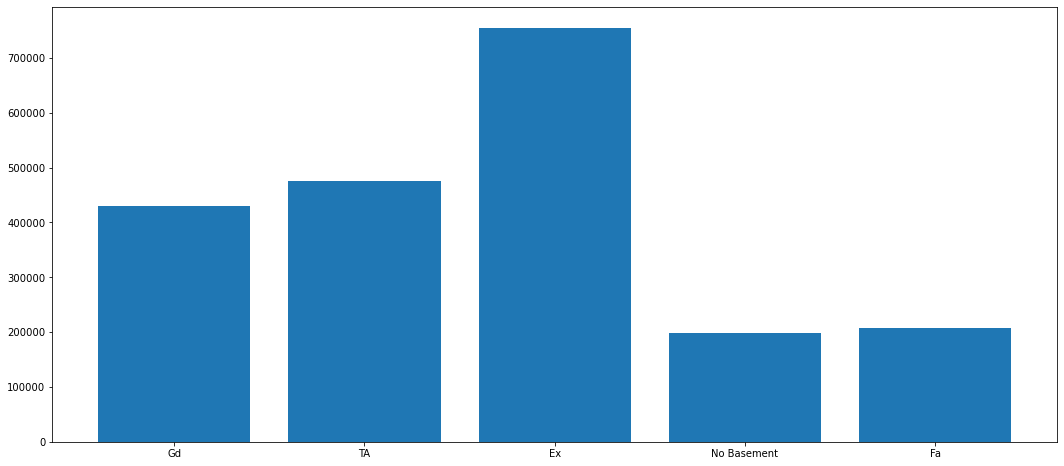

In [121]:
plt.figure(figsize=[18,8])
plt.bar(df2['BsmtQual'],df2['SalePrice'])
plt.show()

The houses with the basement height of 100+ inches(Ex) are expensive as compared to other categories.

<AxesSubplot:xlabel='BsmtCond', ylabel='count'>

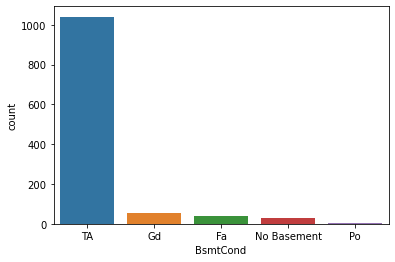

In [122]:
sns.countplot(df2['BsmtCond'])

In [123]:
df2['BsmtCond'].value_counts()

TA             1041
Gd               56
Fa               39
No Basement      30
Po                2
Name: BsmtCond, dtype: int64

The maximum records i.e 1041 out of 1168 are for TA (Typical - slight dampness allowed) pertaining to the condition of the basement.

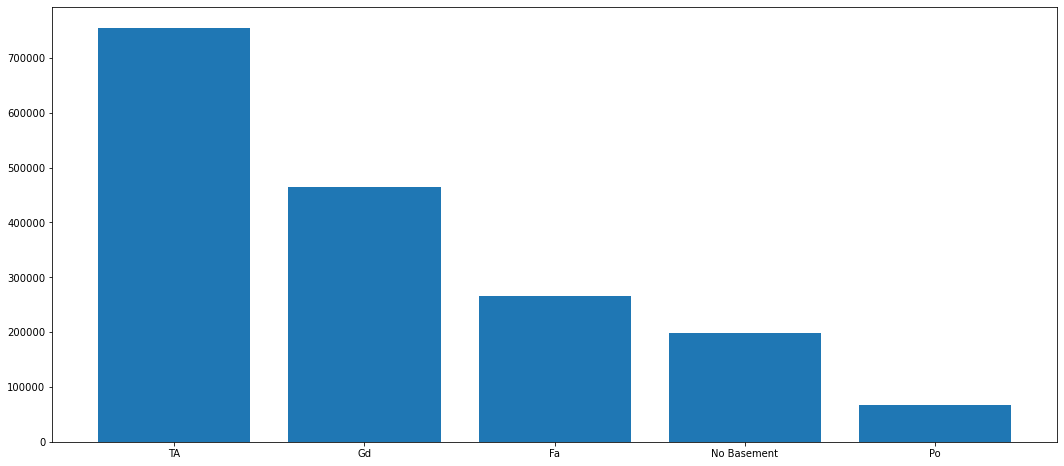

In [124]:
plt.figure(figsize=[18,8])
plt.bar(df2['BsmtCond'],df2['SalePrice'])
plt.show()

The houses where the basement condition are slightly damp are expensive as compared to other categories.

<AxesSubplot:xlabel='BsmtFinType1', ylabel='count'>

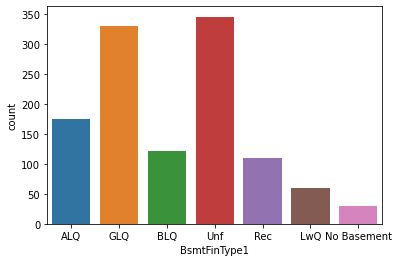

In [125]:
sns.countplot(df2['BsmtFinType1'])

In [126]:
df2['BsmtFinType1'].value_counts()

Unf            345
GLQ            330
ALQ            174
BLQ            121
Rec            109
LwQ             59
No Basement     30
Name: BsmtFinType1, dtype: int64

The maximum records i.e 345 out of 1168 are for the houses with unfinished(unf) basement area. 

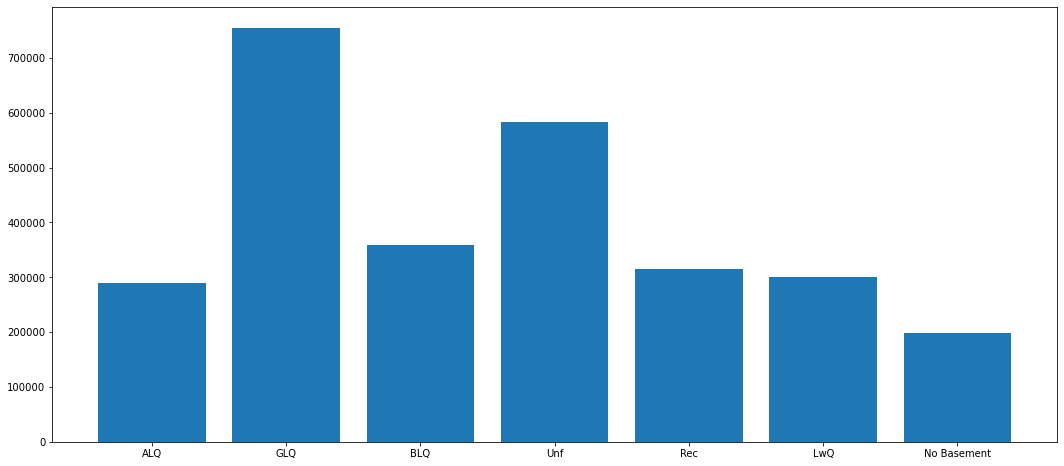

In [127]:
plt.figure(figsize=[18,8])
plt.bar(df2['BsmtFinType1'],df2['SalePrice'])
plt.show()

The houses with the basement finished area as a GLQ(Good Living Quarters) are expensive as compared to other categories.

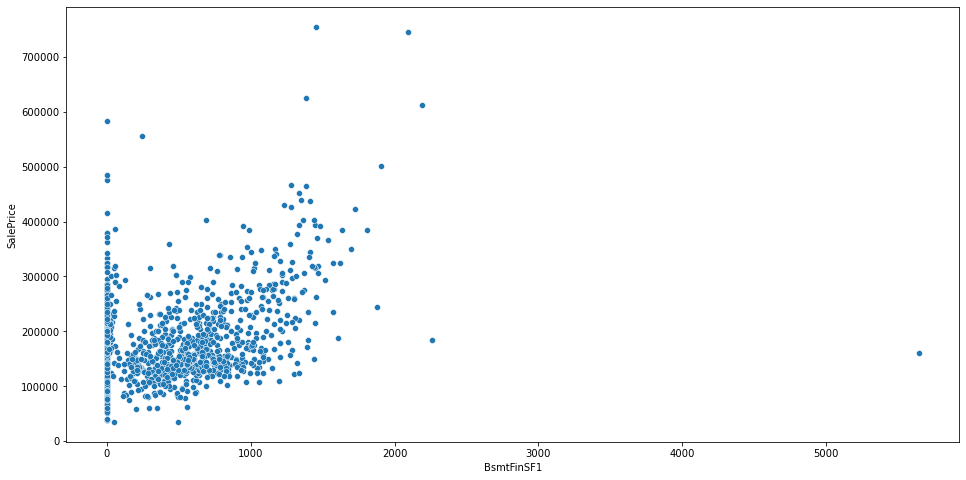

In [128]:
plt.figure(figsize=[16,8])
sns.scatterplot(x='BsmtFinSF1',y='SalePrice',data=df2)
plt.show()

There is a positive linear relationship between features BsmtFinSF1(Type 1 finished square feet ) and the Sale Price.

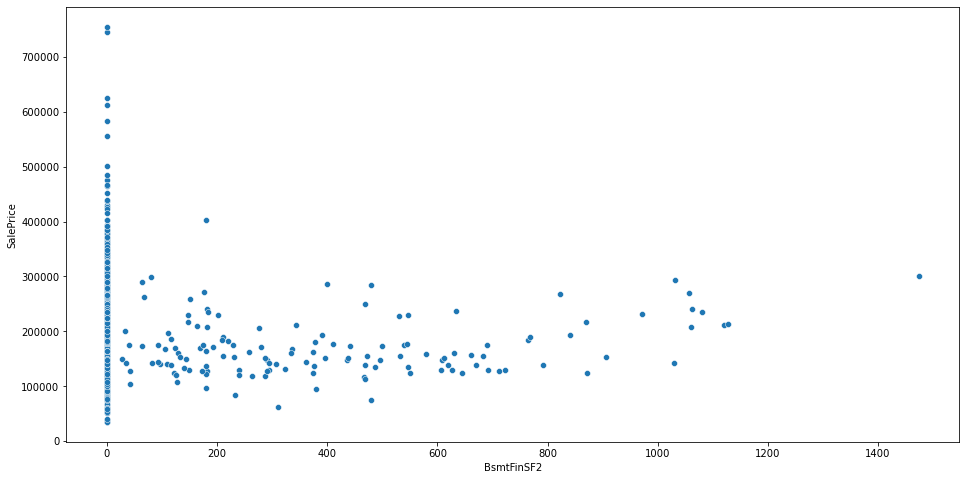

In [129]:
plt.figure(figsize=[16,8])
sns.scatterplot(x='BsmtFinSF2',y='SalePrice',data=df2)
plt.show()

As such no relationship can be established between features BsmtFinSF2(Type 2 finished square feet) and the Sale Price.

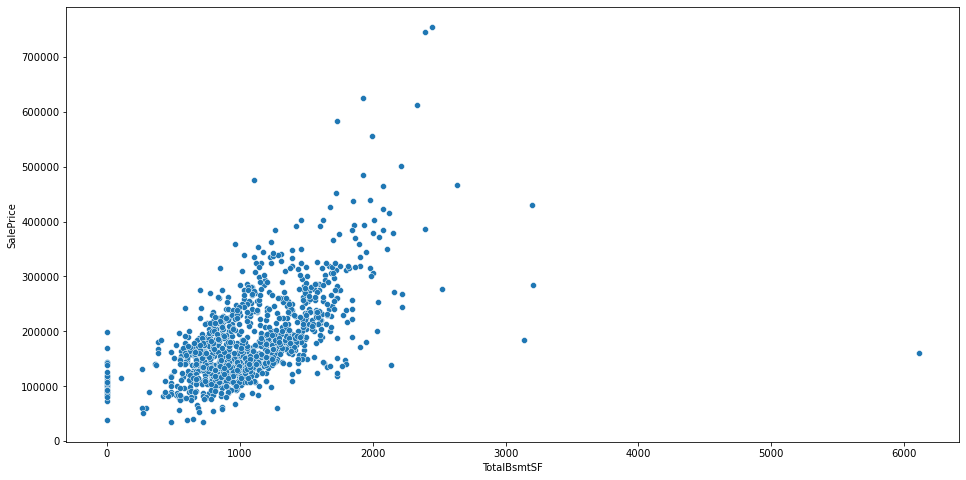

In [130]:
plt.figure(figsize=[16,8])
sns.scatterplot(x='TotalBsmtSF',y='SalePrice',data=df2)
plt.show()

There is a positive linear relationship between features (TotalBsmtSF) and the Sale Price.

<AxesSubplot:xlabel='Heating', ylabel='count'>

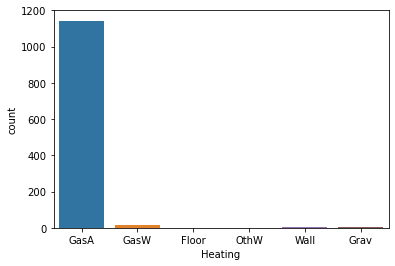

In [131]:
sns.countplot(df2['Heating'])

In [132]:
df2['Heating'].value_counts()

GasA     1143
GasW       14
Grav        5
Wall        4
Floor       1
OthW        1
Name: Heating, dtype: int64

The maximum records i.e 1143 out of 1168 are for GasA (Gas forced warm air furnace) type of heating in houses.

<AxesSubplot:xlabel='HeatingQC', ylabel='count'>

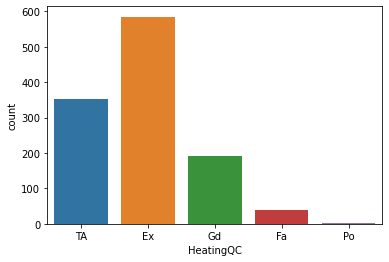

In [133]:
sns.countplot(df2['HeatingQC'])

In [134]:
df2['HeatingQC'].value_counts()

Ex    585
TA    352
Gd    192
Fa     38
Po      1
Name: HeatingQC, dtype: int64

The maximum records i.e 585 out of 1168 are for the houses with excellent(Ex) heating condition and quality.

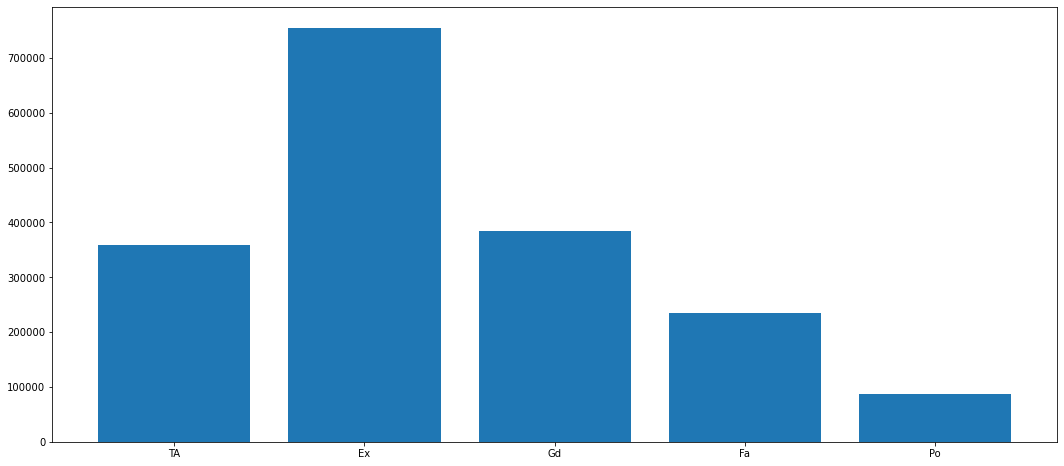

In [135]:
plt.figure(figsize=[18,8])
plt.bar(df2['HeatingQC'],df2['SalePrice'])
plt.show()

The houses with excellent(Ex) heating condition and quality are expensive as compared to other catergories.

<AxesSubplot:xlabel='CentralAir', ylabel='count'>

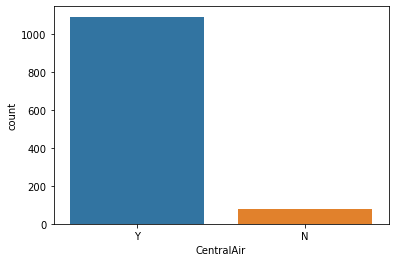

In [136]:
sns.countplot(df2['CentralAir'])

In [137]:
df2['CentralAir'].value_counts()

Y    1090
N      78
Name: CentralAir, dtype: int64

The maximum records i.e 1090 out of 1168 are for the houses having central air conditioning facility.

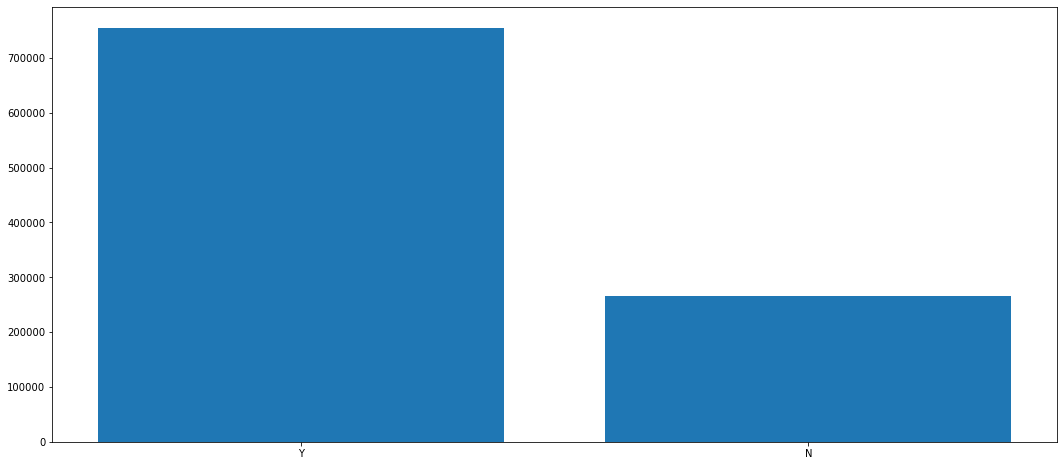

In [138]:
plt.figure(figsize=[18,8])
plt.bar(df2['CentralAir'],df2['SalePrice'])
plt.show()

The houses with Central air conditioning facility are expensive as compared to other houses with no central air conditioning facility.

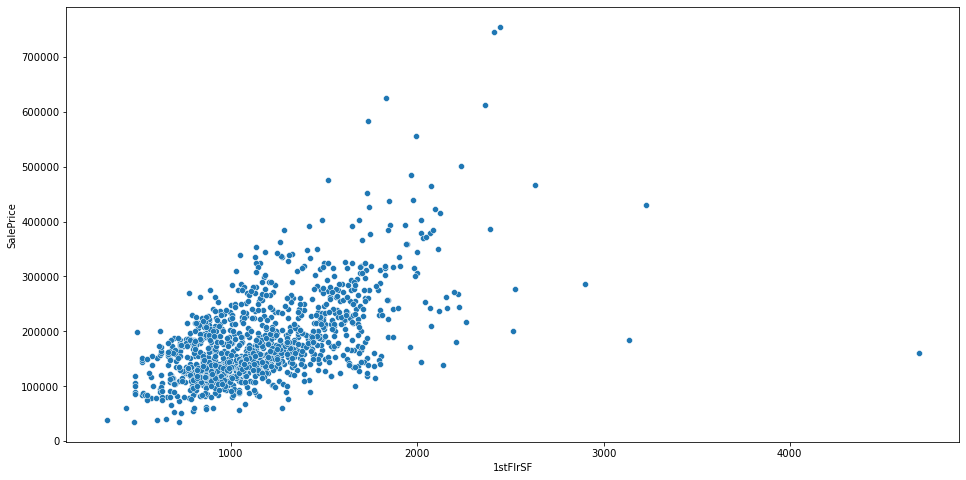

In [139]:
plt.figure(figsize=[16,8])
sns.scatterplot(x='1stFlrSF',y='SalePrice',data=df2)
plt.show()

There is a positive linear relationship between features (First Floor square feet) and the Sale price. Further, as the square feet area increaes the price of the houses increases.

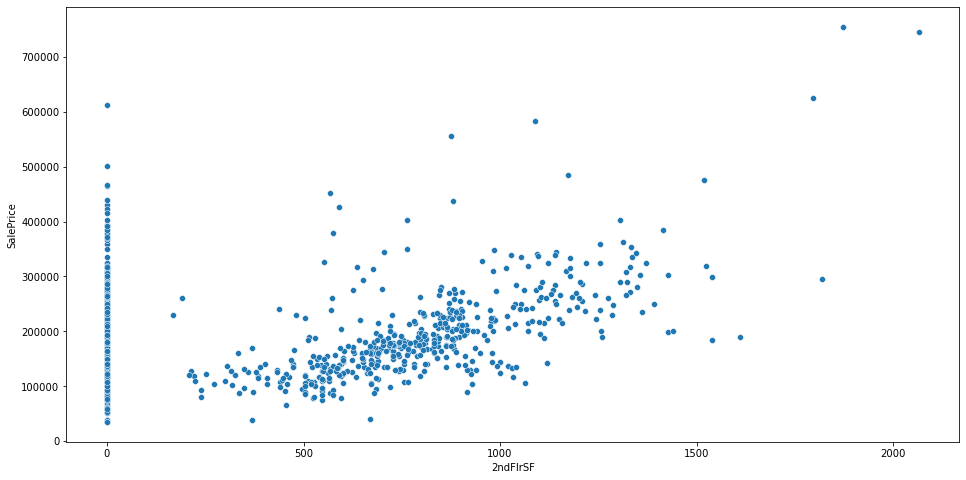

In [140]:
plt.figure(figsize=[16,8])
sns.scatterplot(x='2ndFlrSF',y='SalePrice',data=df2)
plt.show()

There is a linear positive relationship between features 2ndFlrSF (Second floor square feet) and the Sale price.

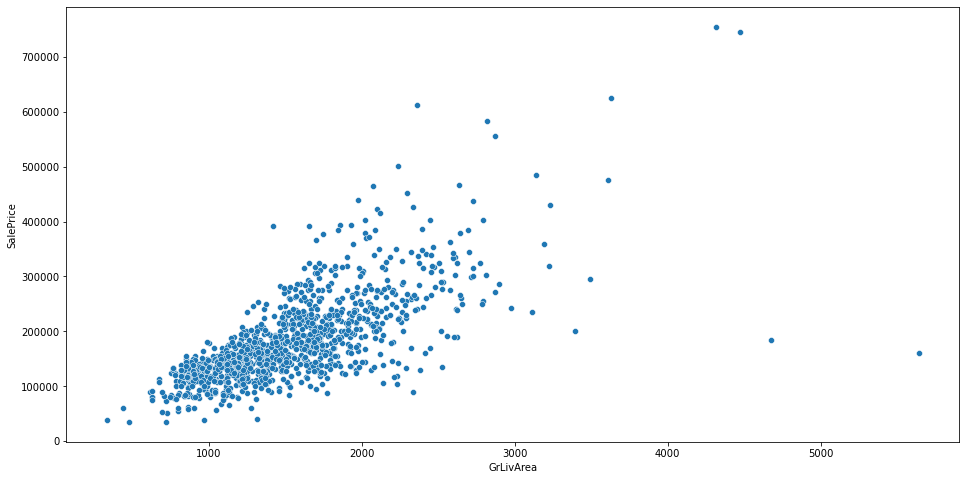

In [141]:
plt.figure(figsize=[16,8])
sns.scatterplot(x='GrLivArea',y='SalePrice',data=df2)
plt.show()

There is a positive linear relationship between features GrLivArea(Above grade (ground) living area square feet) and the Sale price.

<AxesSubplot:xlabel='KitchenQual', ylabel='count'>

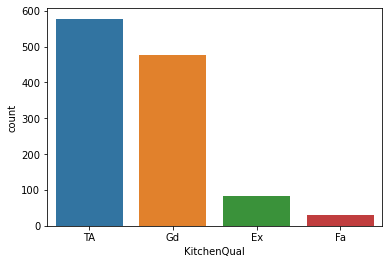

In [142]:
sns.countplot(df2['KitchenQual'])

In [143]:
df2['KitchenQual'].value_counts()

TA    578
Gd    478
Ex     82
Fa     30
Name: KitchenQual, dtype: int64

The maxiumum records i.e 578 out of 1168 are for the average(TA) type of kitchen quality.

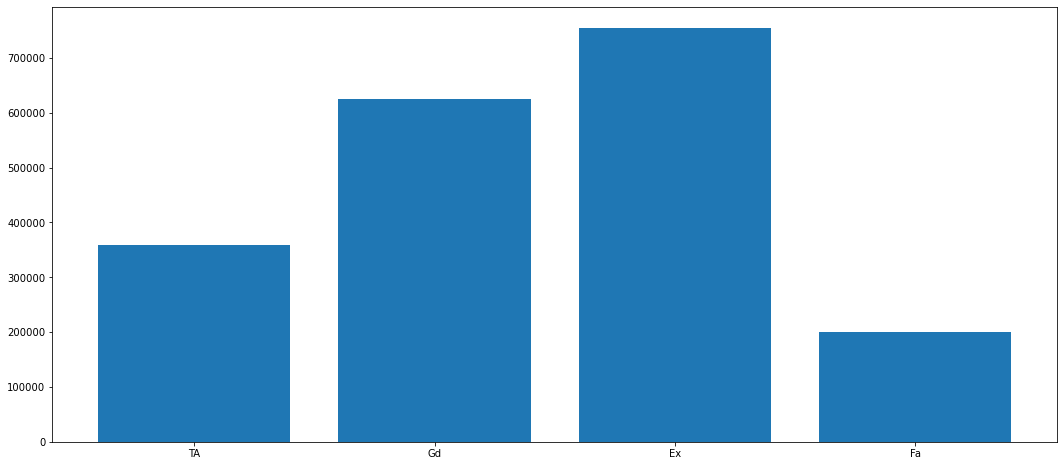

In [144]:
plt.figure(figsize=[18,8])
plt.bar(df2['KitchenQual'],df2['SalePrice'])
plt.show()

The houses with excellent(EX) kitchen quality are expensive as compared to other one categories.

<AxesSubplot:xlabel='Functional', ylabel='count'>

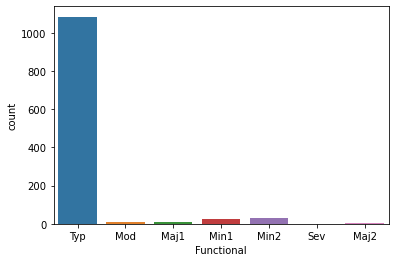

In [145]:
sns.countplot(df2['Functional'])

In [146]:
df2['Functional'].value_counts()

Typ     1085
Min2      30
Min1      25
Mod       12
Maj1      11
Maj2       4
Sev        1
Name: Functional, dtype: int64

The maximum records i.e 1085 out of 1168 are for typ (Typical Functionality) home functionality.

In [147]:
df2['Fireplaces'].value_counts()

0    551
1    518
2     94
3      5
Name: Fireplaces, dtype: int64

The maximum records i.e 551 out o f 1168 are for the houses having no fireplace.

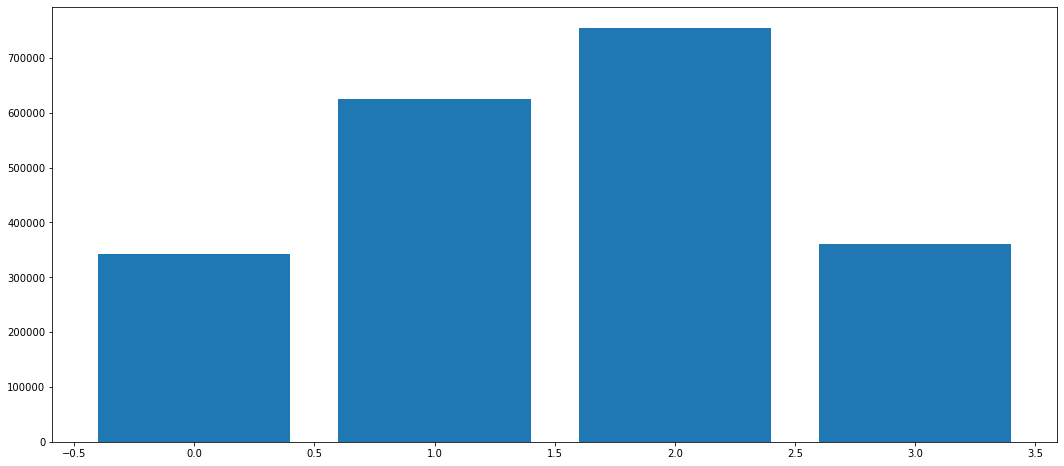

In [148]:
plt.figure(figsize=[18,8])
plt.bar(df2['Fireplaces'],df2['SalePrice'])
plt.show()

The houses with two fireplace are expensive as compared to other categories.

<AxesSubplot:xlabel='FireplaceQu', ylabel='count'>

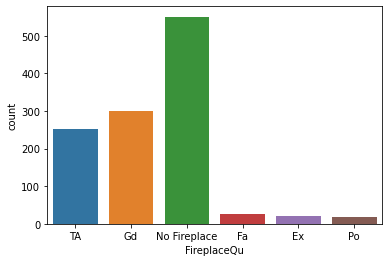

In [149]:
sns.countplot(df2['FireplaceQu'])

In [150]:
df2['FireplaceQu'].value_counts()

No Fireplace    551
Gd              301
TA              252
Fa               25
Ex               21
Po               18
Name: FireplaceQu, dtype: int64

The maximum records i.e 551 out o f 1168 are for the houses having No Fireplace.

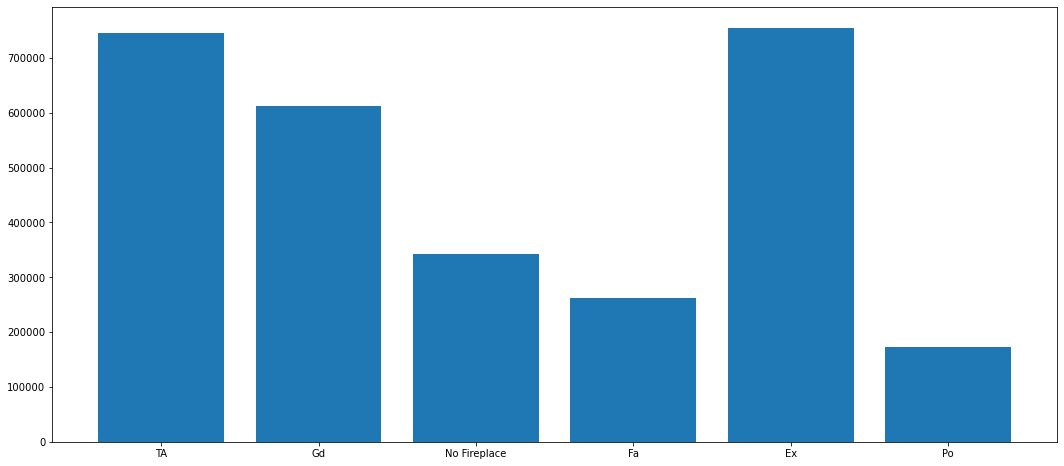

In [151]:
plt.figure(figsize=[18,8])
plt.bar(df2['FireplaceQu'],df2['SalePrice'])
plt.show()

In [152]:
pd.crosstab(df2['FireplaceQu'],df2['SalePrice'],margins=True)

SalePrice     34900  35311  37900  39300  40000  52000  52500  55000  55993  \
FireplaceQu                                                                   
Ex                0      0      0      0      0      0      0      0      0   
Fa                0      0      0      0      0      0      0      0      0   
Gd                0      0      0      0      0      0      0      0      0   
No Fireplace      1      1      1      1      1      1      1      1      1   
Po                0      0      0      0      0      0      0      0      0   
TA                0      0      0      0      0      0      0      0      0   
All               1      1      1      1      1      1      1      1      1   

SalePrice     58500  ...  475000  485000  501837  556581  582933  611657  \
FireplaceQu          ...                                                   
Ex                0  ...       0       0       0       0       0       0   
Fa                0  ...       0       0       0       0       0       0   
Gd                0  ...       0       1       1       1       1       1   
No Fireplace      1  ...       0       0       0       0       0       0   
Po                0  ...       0       0       0       0       0       0   
TA                0  ...       1       0       0       0       0       0   
All               1  ...       1       1       1       1       1       1   

SalePrice     625000  745000  755000   All  
FireplaceQu                                 
Ex                 0       0       1    21  
Fa                 0       0       0    25  
Gd                 0       0       0   301  
No Fireplace       0       0       0   551  
Po                 0       0       0    18  
TA                 1       1       0   252  
All                1       1       1  1168  

[7 rows x 582 columns]

The houses with Excellent(Ex) fireplace quality/ratings are expensive as comapred to others.

<AxesSubplot:xlabel='GarageType', ylabel='count'>

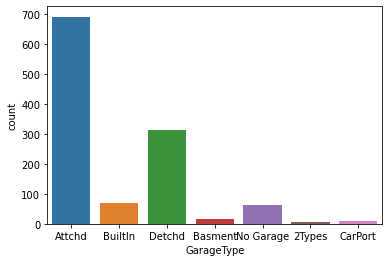

In [153]:
sns.countplot(df2['GarageType'])

In [154]:
df2['GarageType'].value_counts()

Attchd       691
Detchd       314
BuiltIn       70
No Garage     64
Basment       16
CarPort        8
2Types         5
Name: GarageType, dtype: int64

The maximum records i.e 691 out of 1168 are for the garage type Attchd(Attached to home).

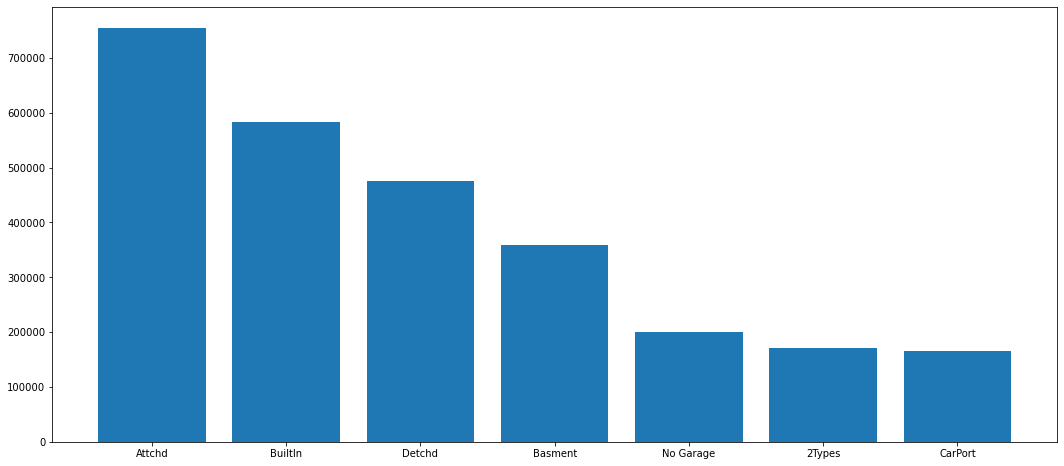

In [155]:
plt.figure(figsize=[18,8])
plt.bar(df2['GarageType'],df2['SalePrice'])
plt.show()

The houses having attcahed garages are expensive as compared to others.

<AxesSubplot:xlabel='GarageFinish', ylabel='count'>

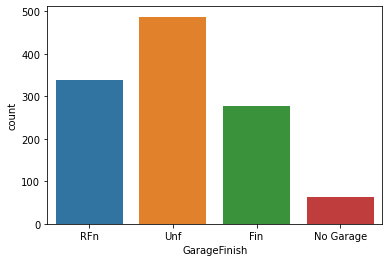

In [156]:
sns.countplot(df2['GarageFinish'])

In [157]:
df2['GarageFinish'].value_counts()

Unf          487
RFn          339
Fin          278
No Garage     64
Name: GarageFinish, dtype: int64

The maximum records i.e 487 out of 1168 are for the unf(unfinished) type of interior of the garage.

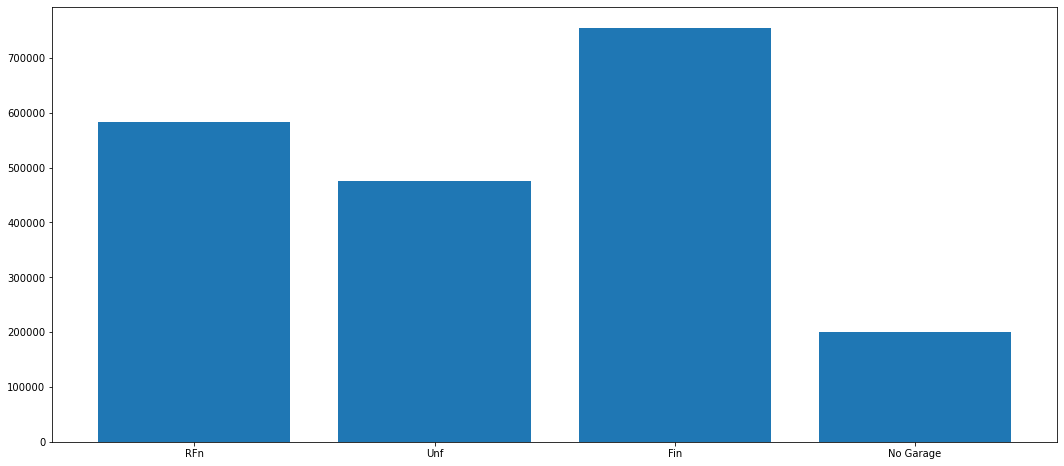

In [158]:
plt.figure(figsize=[18,8])
plt.bar(df2['GarageFinish'],df2['SalePrice'])
plt.show()

The houses with finished(fin) type of garage interiors are expensive as compared to others.

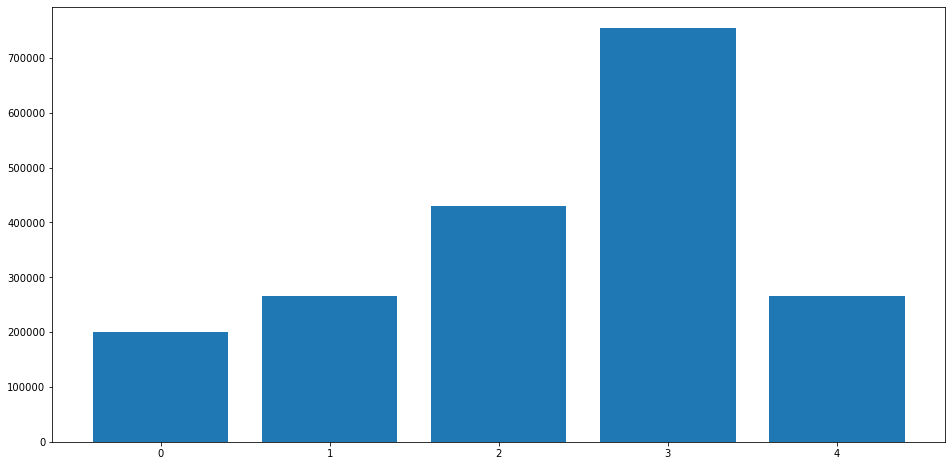

In [159]:
plt.figure(figsize=[16,8])
plt.bar(df2['GarageCars'],df2['SalePrice'])
plt.show()

The houses with 3 car parking capacity are expensive as compared to others.

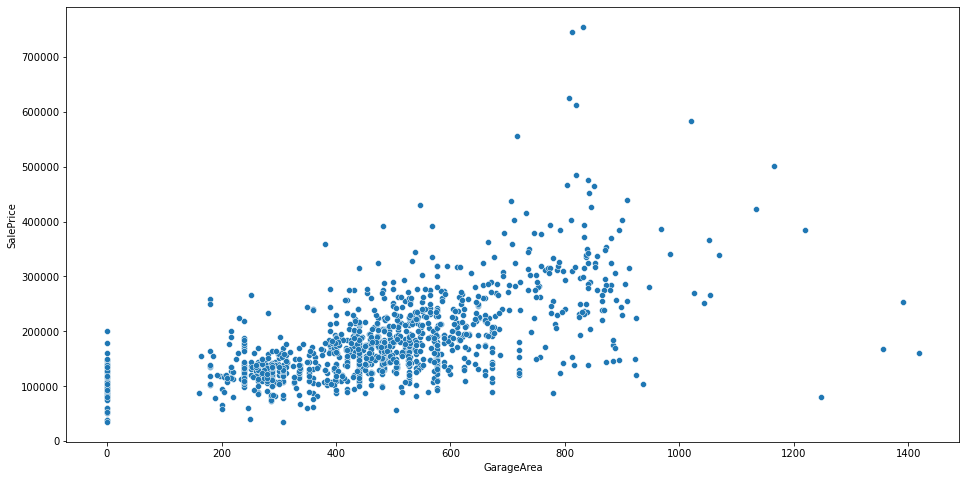

In [160]:
plt.figure(figsize=[16,8])
sns.scatterplot(x='GarageArea',y='SalePrice',data=df2)
plt.show()

There is a linear positive relationship between features GarageArea and the Sale price.

<AxesSubplot:xlabel='GarageQual', ylabel='count'>

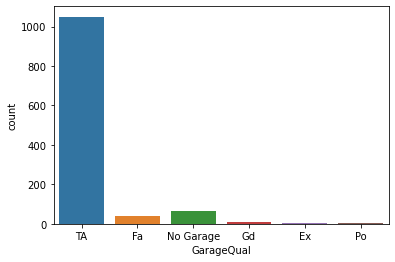

In [161]:
sns.countplot(df2['GarageQual'])

In [162]:
df2['GarageQual'].value_counts()

TA           1050
No Garage      64
Fa             39
Gd             11
Po              2
Ex              2
Name: GarageQual, dtype: int64

The maximum records i.e 1050 out of 1168 are for the houses having average(TA) garage quality.

<AxesSubplot:xlabel='PavedDrive', ylabel='count'>

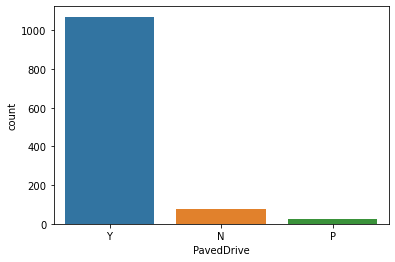

In [163]:
sns.countplot(df2['PavedDrive'])

In [164]:
df2['PavedDrive'].value_counts()

Y    1071
N      74
P      23
Name: PavedDrive, dtype: int64

The maximum records i.e 1071 out of 1168 are the houses having paved driveway.

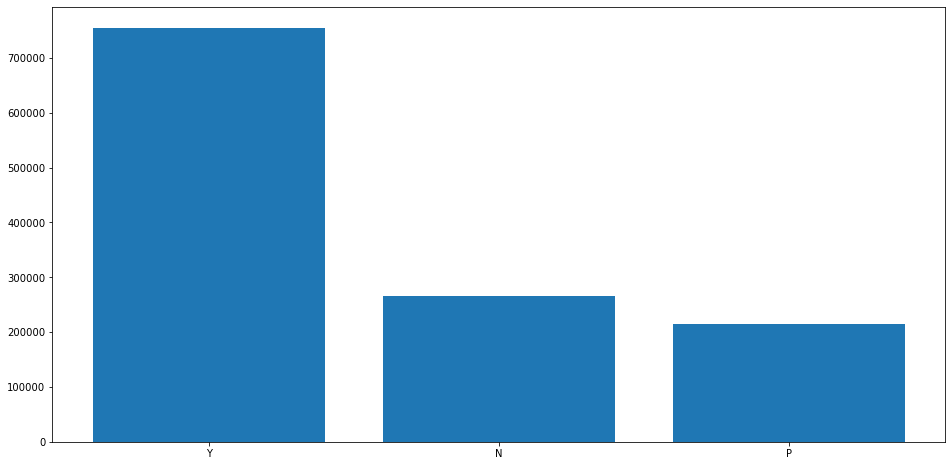

In [165]:
plt.figure(figsize=[16,8])
plt.bar(df2['PavedDrive'],df2['SalePrice'])
plt.show()

The houses with paved driveway are expensive as compared to others.

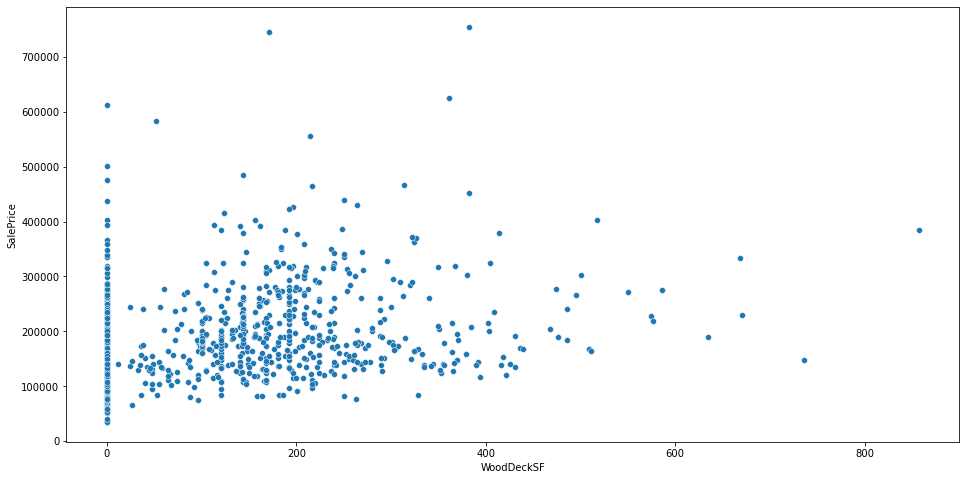

In [166]:
plt.figure(figsize=[16,8])
sns.scatterplot(x='WoodDeckSF',y='SalePrice',data=df2)
plt.show()

There is a positive linear relationship between features WoodDeckSF and the Sale Price.

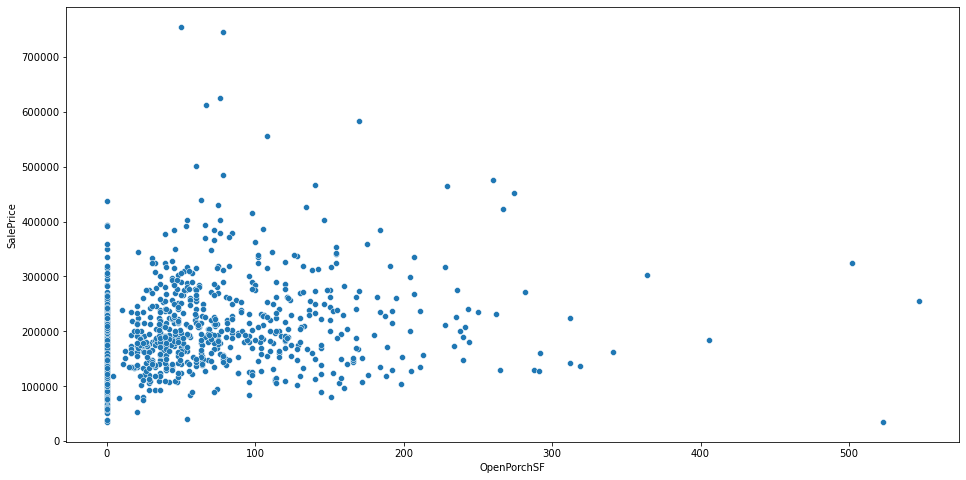

In [167]:
plt.figure(figsize=[16,8])
sns.scatterplot(x='OpenPorchSF',y='SalePrice',data=df2)
plt.show()

There is a positive linear relationship between features OpenPorchSF and the sale price.

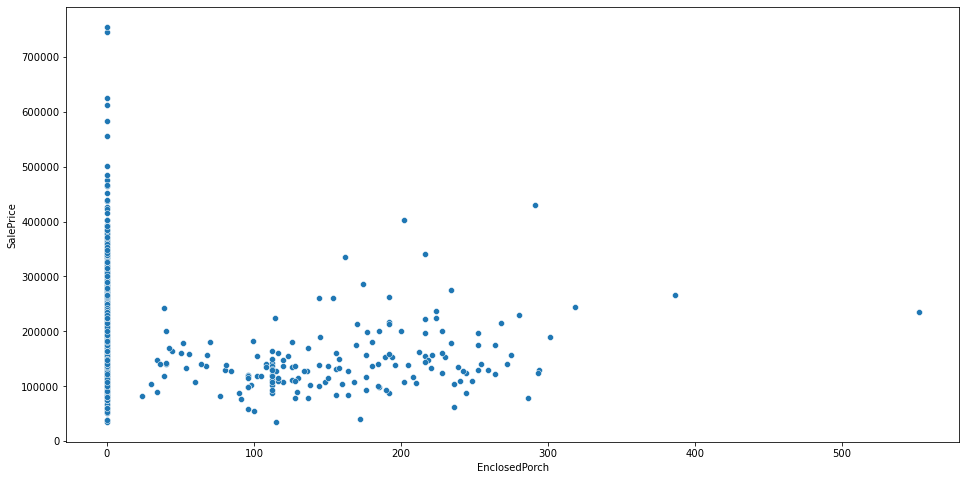

In [168]:
plt.figure(figsize=[16,8])
sns.scatterplot(x='EnclosedPorch',y='SalePrice',data=df2)
plt.show()

As such no relationship can be established between features EnclosedPorch and the sale Price.

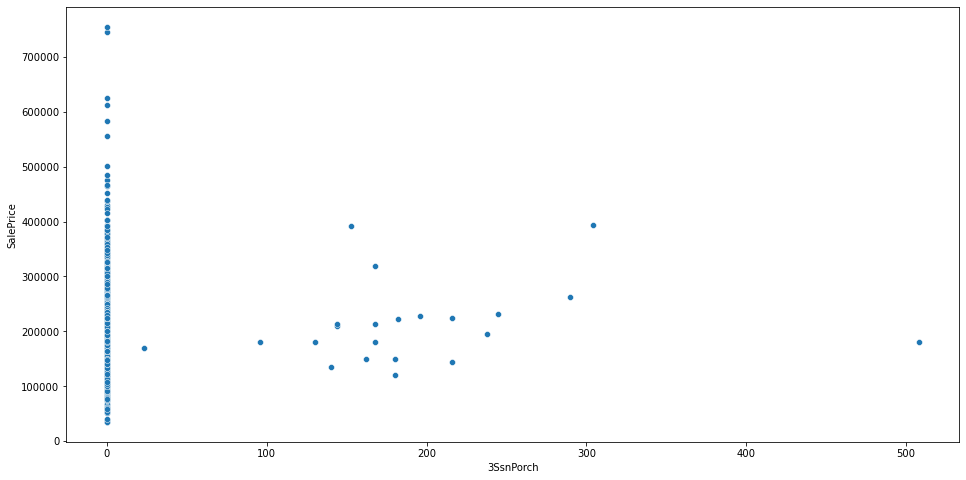

In [169]:
plt.figure(figsize=[16,8])
sns.scatterplot(x='3SsnPorch',y='SalePrice',data=df2)
plt.show()

As such no relationship can be established between features 3SsnPorch and the sale Price.

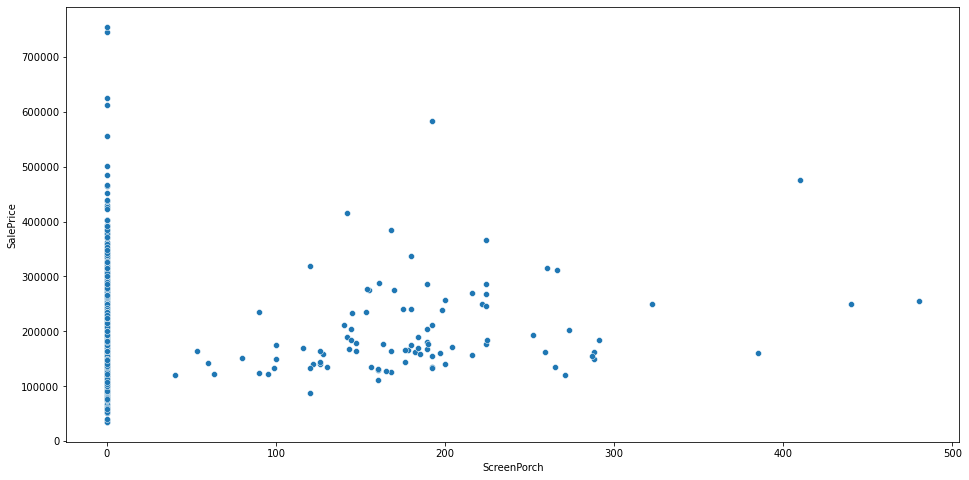

In [170]:
plt.figure(figsize=[16,8])
sns.scatterplot(x='ScreenPorch',y='SalePrice',data=df2)
plt.show()

As such no relationship can be established between features ScreenPorch and the sale Price.

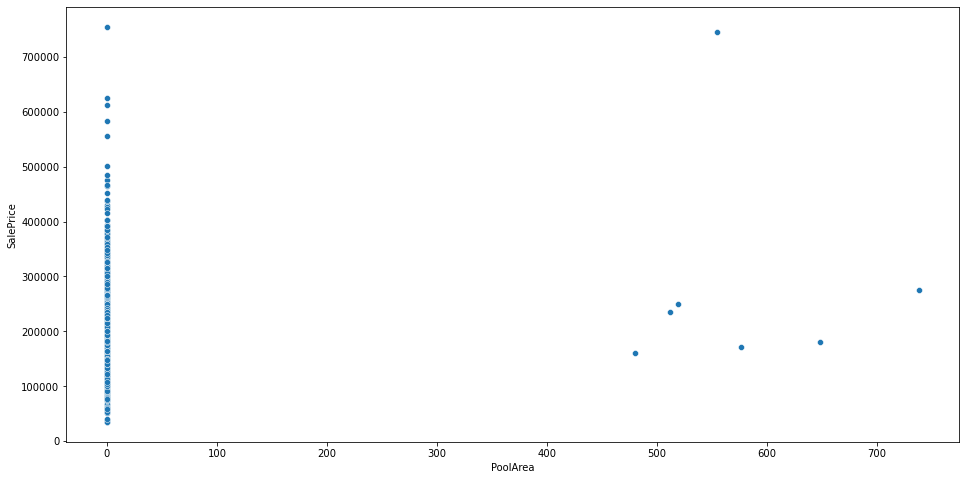

In [171]:
plt.figure(figsize=[16,8])
sns.scatterplot(x='PoolArea',y='SalePrice',data=df2)
plt.show()

As such no relationship can be established between features PoolArea and the sale price.

<AxesSubplot:xlabel='PoolQC', ylabel='count'>

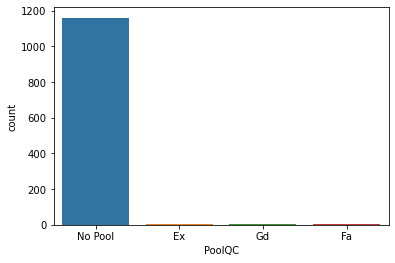

In [172]:
sns.countplot(df2['PoolQC'])

In [173]:
df2['PoolQC'].value_counts()

No Pool    1161
Gd            3
Fa            2
Ex            2
Name: PoolQC, dtype: int64

The maximum records i.e 1161 out of 1168 are for the houses with No Pool.

<AxesSubplot:xlabel='Fence', ylabel='count'>

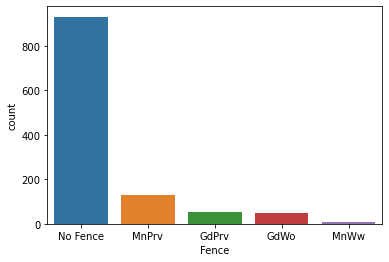

In [174]:
sns.countplot(df2['Fence'])

In [175]:
df2['Fence'].value_counts()

No Fence    931
MnPrv       129
GdPrv        51
GdWo         47
MnWw         10
Name: Fence, dtype: int64

The maximum records i.e 931 out of 1168 are for the houses having no fencing.

<AxesSubplot:xlabel='MiscFeature', ylabel='count'>

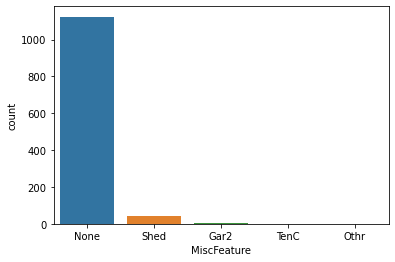

In [176]:
sns.countplot(df2['MiscFeature'])

In [177]:
df2['MiscFeature'].value_counts()

None    1124
Shed      40
Gar2       2
Othr       1
TenC       1
Name: MiscFeature, dtype: int64

The maximum records i.e 1124 out of 1168 are for the houses having no additional features like elevator, shed etc.

<AxesSubplot:xlabel='MiscVal', ylabel='SalePrice'>

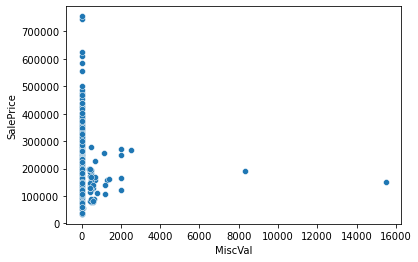

In [178]:
sns.scatterplot(x='MiscVal',y='SalePrice',data=df2)

As such no relationship can be established between features MisVal and the sale price.

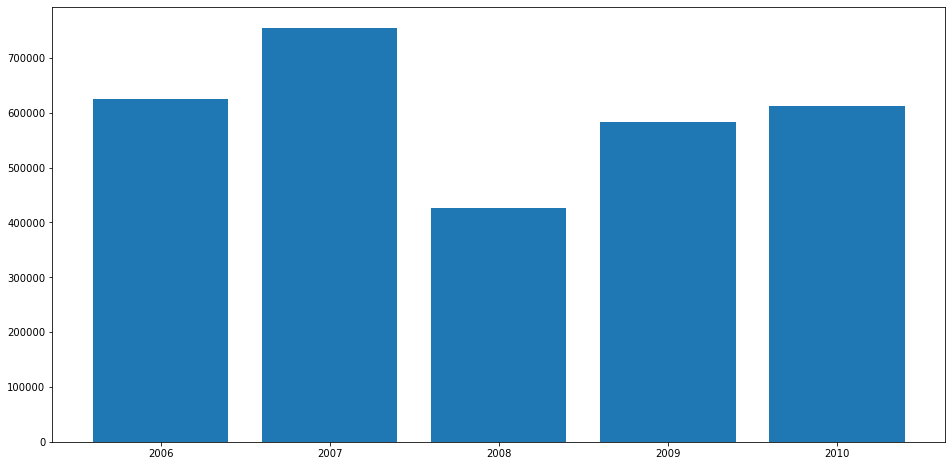

In [179]:
plt.figure(figsize=[16,8])
plt.bar(df2['YrSold'],df2['SalePrice'])
plt.show()

In [180]:
df2['YrSold'].value_counts()

2007    264
2009    260
2006    254
2008    248
2010    142
Name: YrSold, dtype: int64

The maximum records i.e 264 out of 1168 are for the houses sold in the year 2007.

Houses sold in the year 2007 are expensive as compared to the other categories.

<AxesSubplot:xlabel='SaleType', ylabel='count'>

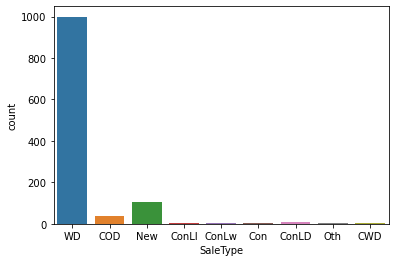

In [181]:
sns.countplot(df2['SaleType'])

In [182]:
df2['SaleType'].value_counts()

WD       999
New      106
COD       38
ConLD      8
ConLI      5
ConLw      4
CWD        3
Oth        3
Con        2
Name: SaleType, dtype: int64

The maximum records i.e 999 out of 1168 are for the houses having WD(Warranty Deed-Conventional) type of sale.

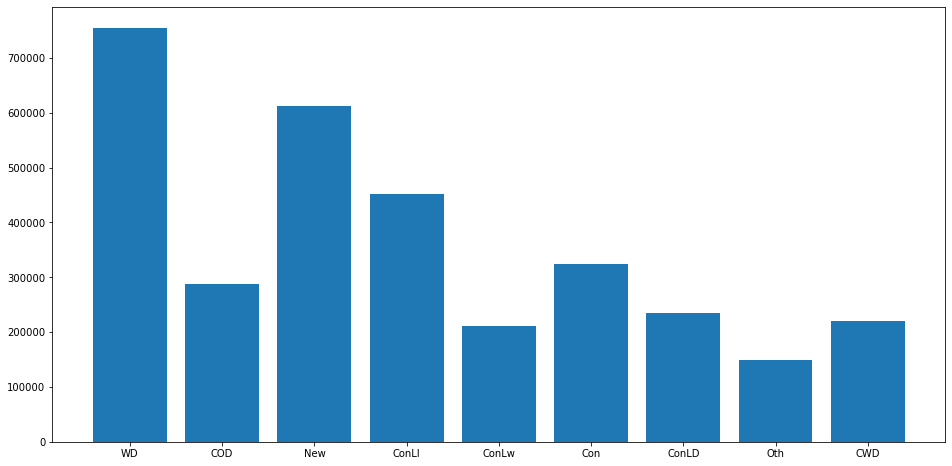

In [183]:
plt.figure(figsize=[16,8])
plt.bar(df2['SaleType'],df2['SalePrice'])
plt.show()

Warranty Deed - Conventional type of sale are expensive as compared to other type of sale.

<AxesSubplot:xlabel='SaleCondition', ylabel='count'>

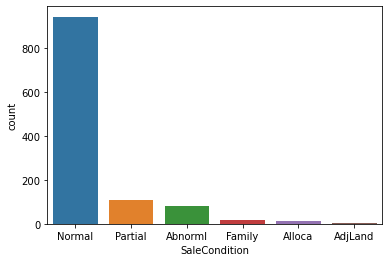

In [184]:
sns.countplot(df2['SaleCondition'])

In [185]:
df2['SaleCondition'].value_counts()

Normal     945
Partial    108
Abnorml     81
Family      18
Alloca      12
AdjLand      4
Name: SaleCondition, dtype: int64

The maximum records i.e 945 out of 1168 are for the houses having normal conditions of sale.

(array([112., 582., 297., 116.,  40.,  12.,   3.,   2.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <BarContainer object of 10 artists>)

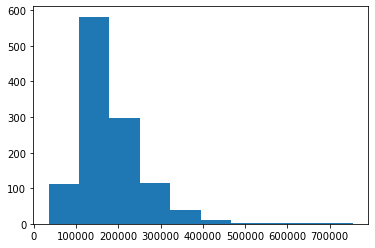

In [186]:
plt.hist(df2['SalePrice'])

The price of the property is lying in the range of 100000 to 200000 for most of the records in the dataset.

{'bodies': [<matplotlib.collections.PolyCollection at 0x2e7003eeb80>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2e7003eed30>,
 'cmins': <matplotlib.collections.LineCollection at 0x2e70057e730>,
 'cbars': <matplotlib.collections.LineCollection at 0x2e70057e970>}

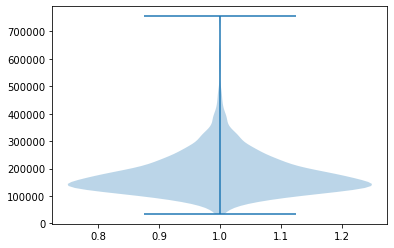

In [187]:
plt.violinplot(df2['SalePrice'])

The maximum density area i.e the area where most of the records are lying is in the range of 100000 to 200000 as per the violin plot.

In [188]:
df2.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1168.000000  1168.000000  1168.000000    1168.000000  1168.000000   
mean    724.136130    56.767979    70.988470   10484.749144     6.104452   
std     416.159877    41.940650    22.437056    8957.442311     1.390153   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     360.500000    20.000000    60.000000    7621.500000     5.000000   
50%     714.500000    50.000000    70.988470    9522.500000     6.000000   
75%    1079.500000    70.000000    79.250000   11515.500000     7.000000   
max    1460.000000   190.000000   313.000000  164660.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1168.000000  1168.000000   1168.000000  1168.000000  1168.000000  ...   
mean      5.595890  1970.930651   1984.758562   101.696918   444.726027  ...   
std       1.124343    30.145255     20.785185   182.218483   462.664785  ...   
min       1.000000  1875.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1966.000000     0.000000     0.000000  ...   
50%       5.000000  1972.000000   1993.000000     0.000000   385.500000  ...   
75%       6.000000  2000.000000   2004.000000   160.000000   714.500000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     96.206336    46.559932      23.015411     3.639555    15.051370   
std     126.158988    66.381023      63.191089    29.088867    55.080816   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    24.000000       0.000000     0.000000     0.000000   
75%     171.000000    70.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1168.000000   1168.000000  1168.000000  1168.000000    1168.000000  
mean      3.448630     47.315068     6.344178  2007.804795  181477.005993  
std      44.896939    543.264432     2.686352     1.329738   79105.586863  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  130375.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163995.000000  
75%       0.000000      0.000000     8.000000  2009.000000  215000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

The features named as LotArea,MasVnrArea,BsmtFinSF1,OpenPorchSF,WoodDeckSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal are having right tailed skewness as the mean is greater than median.

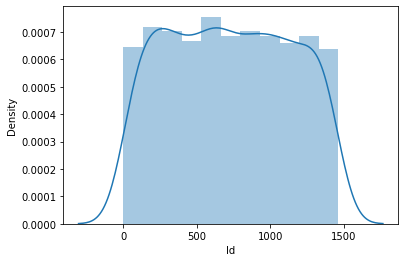

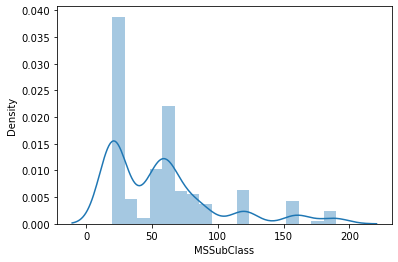

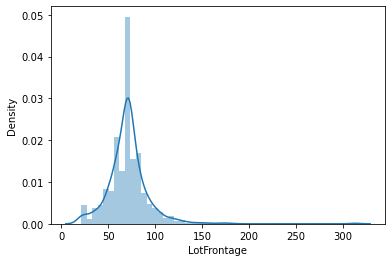

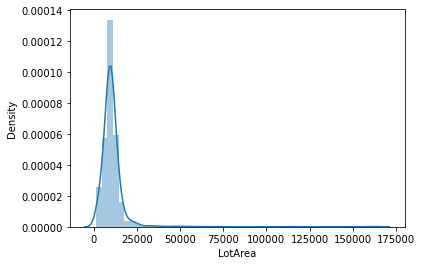

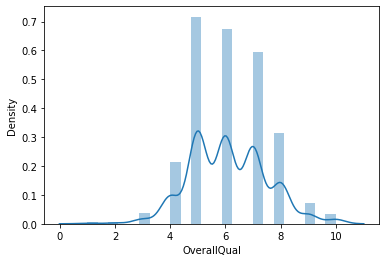

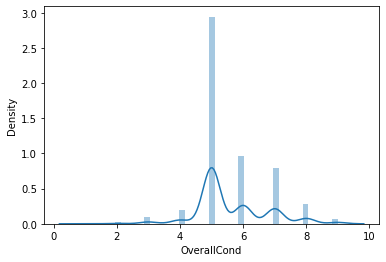

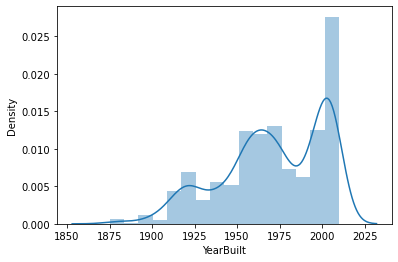

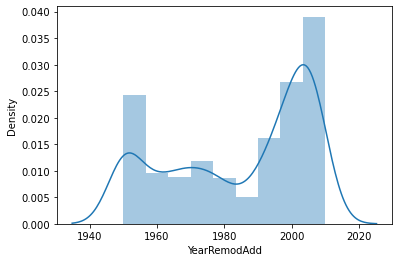

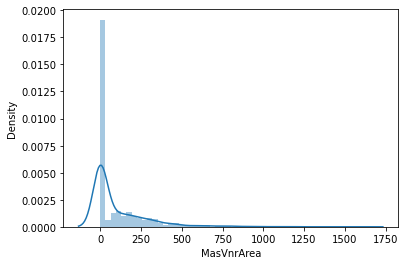

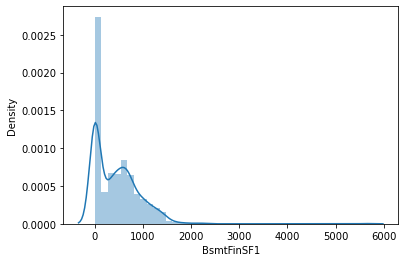

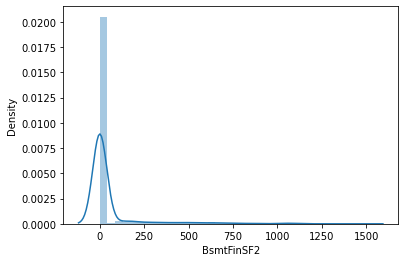

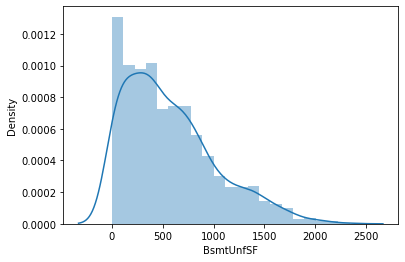

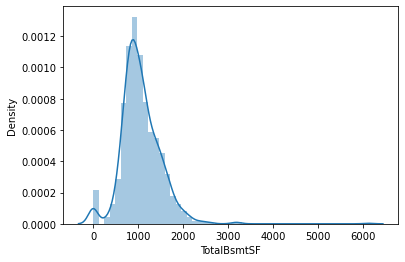

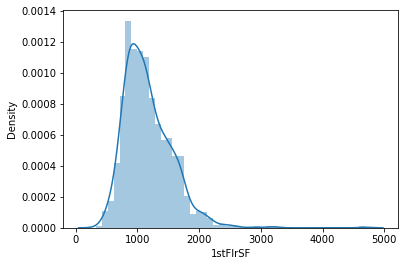

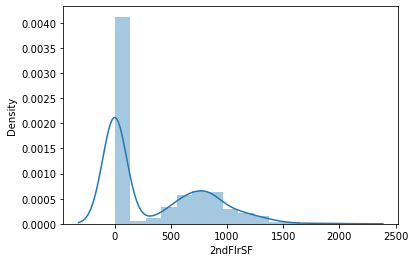

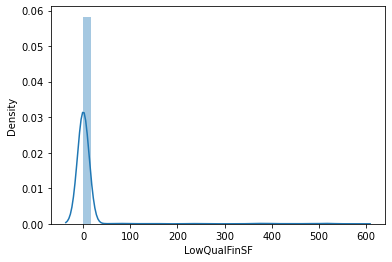

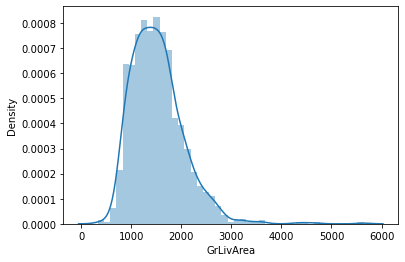

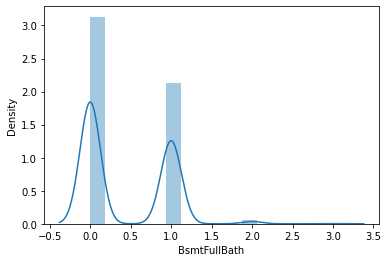

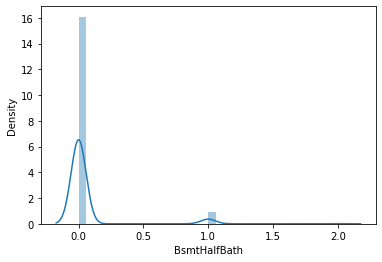

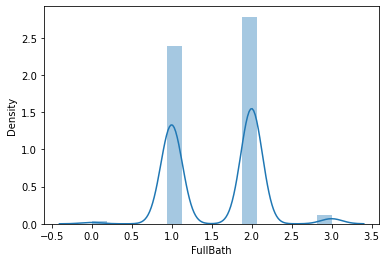

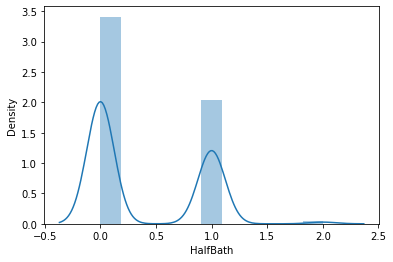

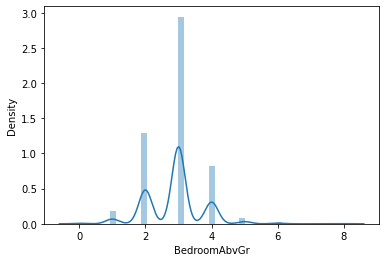

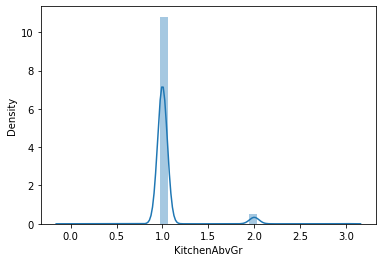

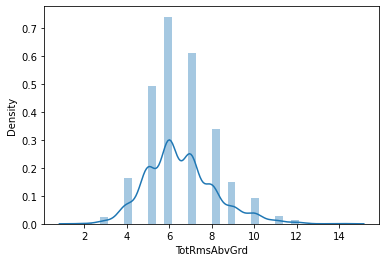

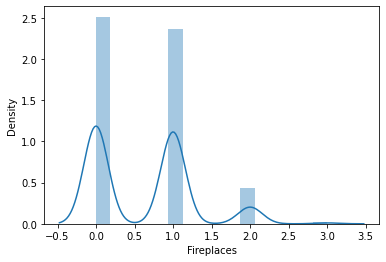

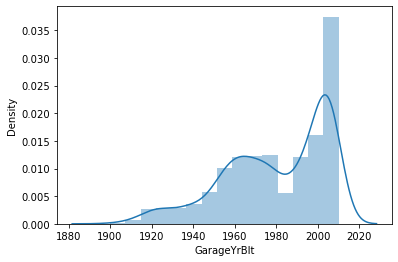

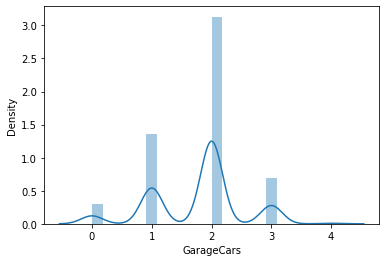

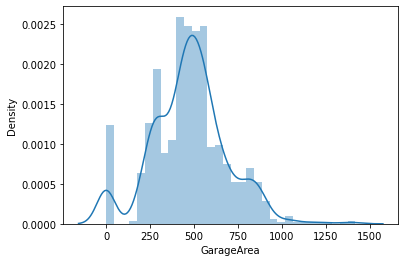

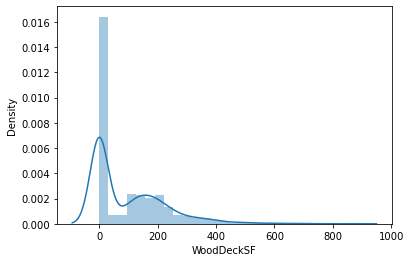

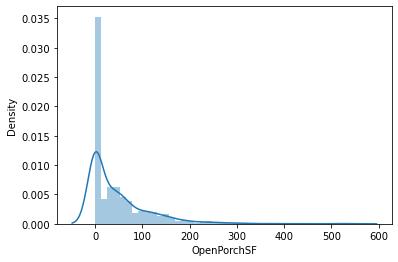

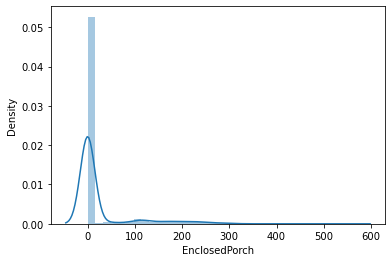

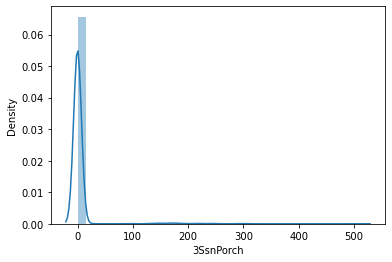

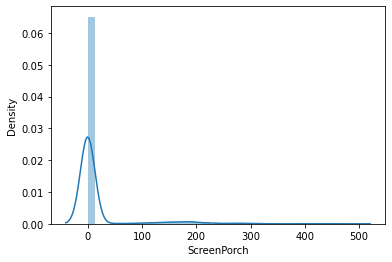

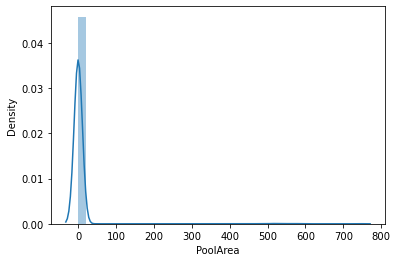

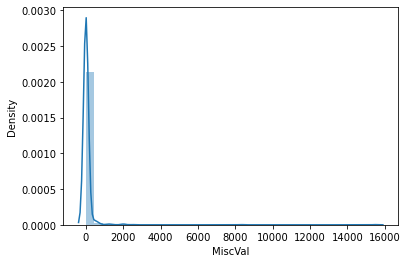

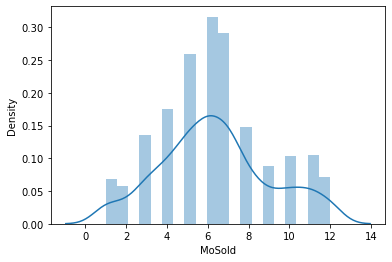

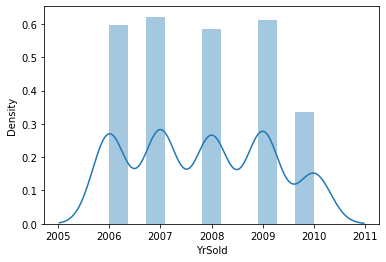

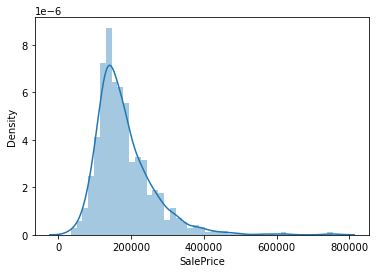

In [189]:
for i in df2.columns:
    if df2[i].dtypes=='int64':
        sns.distplot(df2[i])
        plt.show()
    elif df2[i].dtypes=='float64':
        sns.distplot(df2[i])
        plt.show()
    

Looking at the distribution of numerical categories it can said that features named as LotArea,MasVnrArea,BsmtFinSF1,OpenPorchSF,WoodDeckSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal are having right tailed skewness.

Id                  AxesSubplot(0.125,0.749828;0.065678x0.130172)
MSSubClass       AxesSubplot(0.203814,0.749828;0.065678x0.130172)
LotFrontage      AxesSubplot(0.282627,0.749828;0.065678x0.130172)
LotArea          AxesSubplot(0.361441,0.749828;0.065678x0.130172)
OverallQual      AxesSubplot(0.440254,0.749828;0.065678x0.130172)
OverallCond      AxesSubplot(0.519068,0.749828;0.065678x0.130172)
YearBuilt        AxesSubplot(0.597881,0.749828;0.065678x0.130172)
YearRemodAdd     AxesSubplot(0.676695,0.749828;0.065678x0.130172)
MasVnrArea       AxesSubplot(0.755508,0.749828;0.065678x0.130172)
BsmtFinSF1       AxesSubplot(0.834322,0.749828;0.065678x0.130172)
BsmtFinSF2          AxesSubplot(0.125,0.593621;0.065678x0.130172)
BsmtUnfSF        AxesSubplot(0.203814,0.593621;0.065678x0.130172)
TotalBsmtSF      AxesSubplot(0.282627,0.593621;0.065678x0.130172)
1stFlrSF         AxesSubplot(0.361441,0.593621;0.065678x0.130172)
2ndFlrSF         AxesSubplot(0.440254,0.593621;0.065678x0.130172)
LowQualFin

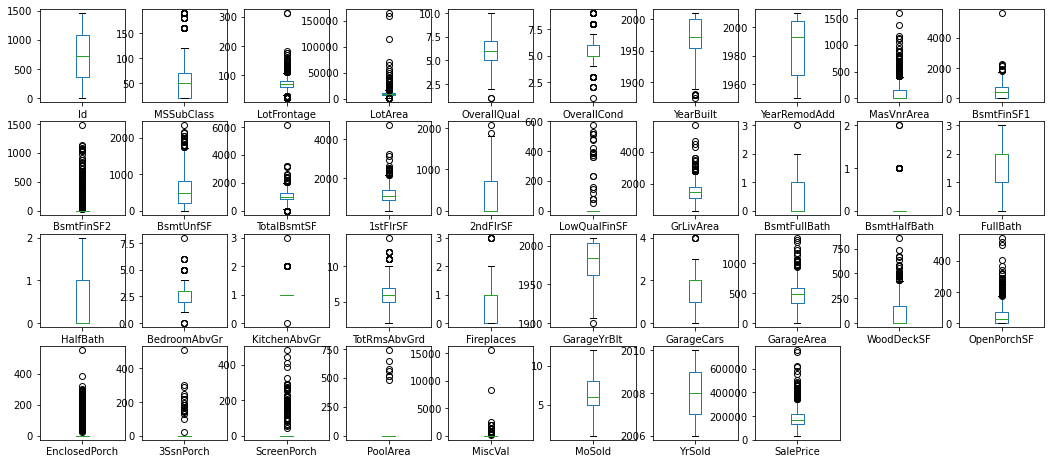

In [190]:
df2.plot(kind='box',figsize=[18,10],layout=(5,10),subplots=True)

From the above boxplot it can be said there are outliers present in the dataset.

I am not treating outliers from feature named as MSSubclass as 160 ,180 and 190 value belongs to 2-STORY PUD - 1946 & NEWER,PUD - MULTILEVEL - INCL SPLIT LEV/FOYER and 2 FAMILY CONVERSION - ALL STYLES AND AGES type of dwelling.

Similarly for the feature named as LotFrontage area the outlier treatment is not required as the chances are the lotFrontage area can be more than 100.

In [191]:
df6=df2.copy()

In [192]:
Q1=df6['LotArea'].quantile(0.25)
Q3=df6['LotArea'].quantile(0.75)
IQR=Q3-Q1
lower_boundary=Q1-(1.5*IQR)
upper_boundary=Q3+(1.5*IQR)
print(Q1,Q3,IQR,lower_boundary,upper_boundary)
df6['LotArea']=df6['LotArea'].astype('float')
df6['LotArea'].values[df6['LotArea']>upper_boundary]=np.nan

7621.5 11515.5 3894.0 1780.5 17356.5


The outliers present in the features named as OverallQual and OverallCond are not to be treated as higher the overall ratings the better it is.

In [193]:
Q11=df6['MasVnrArea'].quantile(0.25)
Q31=df6['MasVnrArea'].quantile(0.75)
IQR1=Q31-Q11
lower_boundary1=Q11-(1.5*IQR1)
upper_boundary1=Q31+(1.5*IQR1)
print(Q11,Q31,IQR1,lower_boundary1,upper_boundary1)
df6['MasVnrArea'].values[df6['MasVnrArea']>upper_boundary1]=np.nan

0.0 160.0 160.0 -240.0 400.0


In [194]:
Q111=df6['BsmtFinSF1'].quantile(0.25)
Q311=df6['BsmtFinSF1'].quantile(0.75)
IQR2=Q311-Q111
lower_boundary2=Q111-(1.5*IQR2)
upper_boundary2=Q311+(1.5*IQR2)
print(Q111,Q311,IQR2,lower_boundary2,upper_boundary2)
df6['BsmtFinSF1']=df6['BsmtFinSF1'].astype('float')
df6['BsmtFinSF1'].values[df6['BsmtFinSF1']>upper_boundary2]=np.nan

0.0 714.5 714.5 -1071.75 1786.25


In [195]:
Q2=df6['BsmtFinSF2'].quantile(0.25)
Q4=df6['BsmtFinSF2'].quantile(0.75)
IQR3=Q4-Q2
lower_boundary3=Q2-(1.5*IQR3)
upper_boundary3=Q4+(1.5*IQR3)
print(Q2,Q4,IQR3,lower_boundary3,upper_boundary3)

0.0 0.0 0.0 0.0 0.0


The outliers treatment is not required for feature named as BsmtFinSF2 as the 25 percentile and 75 percentile is zero. Further, say suppose if it replaced then all the values above upper_boundary  will get converted into zero which is not correct.

In [196]:
Q21=df6['BsmtUnfSF'].quantile(0.25)
Q41=df6['BsmtUnfSF'].quantile(0.75)
IQR4=Q41-Q21
lower_boundary4=Q21-(1.5*IQR4)
upper_boundary4=Q41+(1.5*IQR4)
print(Q21,Q41,IQR4,lower_boundary4,upper_boundary4)
df6['BsmtUnfSF']=df6['BsmtUnfSF'].astype('float')
df6['BsmtUnfSF'].values[df6['BsmtUnfSF']>upper_boundary4]=np.nan

216.0 816.0 600.0 -684.0 1716.0


In [197]:
Q211=df6['TotalBsmtSF'].quantile(0.25)
Q411=df6['TotalBsmtSF'].quantile(0.75)
IQR5=Q411-Q211
lower_boundary5=Q211-(1.5*IQR5)
upper_boundary5=Q411+(1.5*IQR5)
print(Q211,Q411,IQR5,lower_boundary5,upper_boundary5)
df6['TotalBsmtSF']=df6['TotalBsmtSF'].astype('float')
df6['TotalBsmtSF'].values[df6['TotalBsmtSF']>upper_boundary5]=np.nan

799.0 1291.5 492.5 60.25 2030.25


In [198]:
Q5=df6['1stFlrSF'].quantile(0.25)
Q7=df6['1stFlrSF'].quantile(0.75)
IQR6=Q7-Q5
lower_boundary6=Q5-(1.5*IQR6)
upper_boundary6=Q7+(1.5*IQR6)
print(Q5,Q7,IQR6,lower_boundary6,upper_boundary6)
df6['1stFlrSF']=df6['1stFlrSF'].astype('float')
df6['1stFlrSF'].values[df6['1stFlrSF']>upper_boundary6]=np.nan

892.0 1392.0 500.0 142.0 2142.0


In [199]:
Q51=df6['2ndFlrSF'].quantile(0.25)
Q71=df6['2ndFlrSF'].quantile(0.75)
IQR7=Q71-Q51
lower_boundary7=Q51-(1.5*IQR7)
upper_boundary7=Q71+(1.5*IQR7)
print(Q51,Q71,IQR7,lower_boundary7,upper_boundary7)
df6['2ndFlrSF']=df6['2ndFlrSF'].astype('float')
df6['2ndFlrSF'].values[df6['2ndFlrSF']>upper_boundary7]=np.nan

0.0 729.0 729.0 -1093.5 1822.5


In [200]:
Q6=df6['GrLivArea'].quantile(0.25)
Q8=df6['GrLivArea'].quantile(0.75)
IQR9=Q8-Q6
lower_boundary9=Q6-(1.5*IQR9)
upper_boundary9=Q8+(1.5*IQR9)
print(Q6,Q8,IQR9,lower_boundary9,upper_boundary9)
df6['GrLivArea']=df6['GrLivArea'].astype('float')
df6['GrLivArea'].values[df6['GrLivArea']>upper_boundary9]=np.nan

1143.25 1795.0 651.75 165.625 2772.625


The outliers treatment is not required in feature named as BsmtFullBath, BsmtHalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd as the chances of the values in the dataset being correct are higher.

The outlier treatment is not required for feature named as fireplaces as a single house/property can have more than 2 fireplaces.

The outlier treatment is not required for feature named as GarageCars as a single house/property can have more than 3 cars parked in a garage depending on the size of garage area.

In [201]:
Q61=df6['GarageArea'].quantile(0.25)
Q81=df6['GarageArea'].quantile(0.75)
IQR10=Q81-Q61
lower_boundary10=Q61-(1.5*IQR10)
upper_boundary10=Q81+(1.5*IQR10)
print(Q61,Q81,IQR10,lower_boundary10,upper_boundary10)
df6['GarageArea']=df6['GarageArea'].astype('float')
df6['GarageArea'].values[df6['GarageArea']>upper_boundary10]=np.nan

338.0 576.0 238.0 -19.0 933.0


In [202]:
Q611=df6['WoodDeckSF'].quantile(0.25)
Q811=df6['WoodDeckSF'].quantile(0.75)
IQR11=Q811-Q611
lower_boundary11=Q611-(1.5*IQR11)
upper_boundary11=Q811+(1.5*IQR11)
print(Q611,Q811,IQR11,lower_boundary11,upper_boundary11)
df6['WoodDeckSF']=df6['WoodDeckSF'].astype('float')
df6['WoodDeckSF'].values[df6['WoodDeckSF']>upper_boundary11]=np.nan

0.0 171.0 171.0 -256.5 427.5


In [203]:
Q7=df6['OpenPorchSF'].quantile(0.25)
Q9=df6['OpenPorchSF'].quantile(0.75)
IQR12=Q9-Q7
lower_boundary12=Q7-(1.5*IQR12)
upper_boundary12=Q9+(1.5*IQR12)
print(Q7,Q9,IQR12,lower_boundary12,upper_boundary12)
df6['OpenPorchSF']=df6['OpenPorchSF'].astype('float')
df6['OpenPorchSF'].values[df6['OpenPorchSF']>upper_boundary12]=np.nan

0.0 70.0 70.0 -105.0 175.0


In [204]:
Q71=df6['EnclosedPorch'].quantile(0.25)
Q91=df6['EnclosedPorch'].quantile(0.75)
IQR13=Q91-Q71
lower_boundary13=Q71-(1.5*IQR13)
upper_boundary13=Q91+(1.5*IQR13)
print(Q71,Q91,IQR13,lower_boundary13,upper_boundary13)

0.0 0.0 0.0 0.0 0.0


The outliers treatment is not required for feature named as EnclosedPorch as the 25 percentile and 75 percentile is zero. Further, say suppose if it replaced then all the values above upper_boundary will get converted into zero which is not correct.

In [205]:
df6['3SsnPorch'].quantile(0.25)

0.0

In [206]:
df6['3SsnPorch'].quantile(0.75)

0.0

The outliers treatment is not required for feature named as 3SsnPorch as the 25 percentile and 75 percentile is zero. Further, say suppose if it replaced then all the values above upper_boundary will get converted into zero which is not correct.

In [207]:
df6['ScreenPorch'].quantile(0.25)

0.0

In [208]:
df6['ScreenPorch'].quantile(0.75)

0.0

The outliers treatment is not required for feature named as ScreenPorch as the 25 percentile and 75 percentile is zero. Further, say suppose if it replaced then all the values above upper_boundary will get converted into zero which is not correct.

In [209]:
df6['PoolArea'].quantile(0.25)

0.0

In [210]:
df6['MiscVal'].quantile(0.25)

0.0

In [211]:
df6['MiscVal'].quantile(0.75)

0.0

The outliers treatment is not required for feature named as MiscVal as the 25 percentile and 75 percentile is zero. Further, say suppose if it replaced then all the values above upper_boundary will get converted into zero which is not correct.

In [212]:
df6.describe()

Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1168.000000  1168.000000  1168.000000   1108.000000  1168.000000   
mean    724.136130    56.767979    70.988470   9253.774368     6.104452   
std     416.159877    41.940650    22.437056   3111.012843     1.390153   
min       1.000000    20.000000    21.000000   1300.000000     1.000000   
25%     360.500000    20.000000    60.000000   7493.000000     5.000000   
50%     714.500000    50.000000    70.988470   9317.000000     6.000000   
75%    1079.500000    70.000000    79.250000  11177.250000     7.000000   
max    1460.000000   190.000000   313.000000  17217.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1168.000000  1168.000000   1168.000000  1091.000000  1161.000000  ...   
mean      5.595890  1970.930651   1984.758562    64.705775   432.091301  ...   
std       1.124343    30.145255     20.785185   104.226397   422.915093  ...   
min       1.000000  1875.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1966.000000     0.000000     0.000000  ...   
50%       5.000000  1972.000000   1993.000000     0.000000   383.000000  ...   
75%       6.000000  2000.000000   2004.000000   112.500000   706.000000  ...   
max       9.000000  2010.000000   2010.000000   399.000000  1721.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1145.000000  1113.000000    1168.000000  1168.000000  1168.000000   
mean     87.212227    36.400719      23.015411     3.639555    15.051370   
std     109.091462    45.804963      63.191089    29.088867    55.080816   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    20.000000       0.000000     0.000000     0.000000   
75%     168.000000    60.000000       0.000000     0.000000     0.000000   
max     426.000000   175.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1168.000000   1168.000000  1168.000000  1168.000000    1168.000000  
mean      3.448630     47.315068     6.344178  2007.804795  181477.005993  
std      44.896939    543.264432     2.686352     1.329738   79105.586863  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  130375.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163995.000000  
75%       0.000000      0.000000     8.000000  2009.000000  215000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [213]:
Q511=df6['LowQualFinSF'].quantile(0.25)
Q711=df6['LowQualFinSF'].quantile(0.75)
IQR8=Q711-Q511
lower_boundary8=Q511-(1.5*IQR8)
upper_boundary8=Q711+(1.5*IQR8)
print(Q511,Q711,IQR8,lower_boundary8,upper_boundary8)
df6['LowQualFinSF']=df6['LowQualFinSF'].astype('float')
df6['LowQualFinSF'].values[df6['LowQualFinSF']>upper_boundary8]=np.nan

0.0 0.0 0.0 0.0 0.0


In [214]:
df6['LotArea']=df6['LotArea'].fillna(df6['LotArea'].mean())
df6['MasVnrArea']=df6['MasVnrArea'].fillna(df6['MasVnrArea'].mean())
df6['BsmtFinSF1']=df6['BsmtFinSF1'].fillna(df6['BsmtFinSF1'].median())
df6['BsmtUnfSF']=df6['BsmtUnfSF'].fillna(df6['BsmtUnfSF'].median())
df6['TotalBsmtSF']=df6['TotalBsmtSF'].fillna(df6['TotalBsmtSF'].median())
df6['1stFlrSF']=df6['1stFlrSF'].fillna(df6['1stFlrSF'].median())
df6['2ndFlrSF']=df6['2ndFlrSF'].fillna(df6['2ndFlrSF'].mean())
df6['GrLivArea']=df6['GrLivArea'].fillna(df6['GrLivArea'].mean())
df6['GarageArea']=df6['GarageArea'].fillna(df6['GarageArea'].mean())
df6['WoodDeckSF']=df6['WoodDeckSF'].fillna(df6['WoodDeckSF'].mean())
df6['OpenPorchSF']=df6['OpenPorchSF'].fillna(df6['OpenPorchSF'].median())
df6['EnclosedPorch']=df6['EnclosedPorch'].fillna(df6['EnclosedPorch'].mean())

In [215]:
df6['LowQualFinSF']=df6['LowQualFinSF'].fillna(df6['LowQualFinSF'].mean())

Have replaced the Nan values with the respective mean or median of that feature.

In [216]:
df6.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

# Checking out for skewness

In [217]:
df6.skew()

Id                0.026526
MSSubClass        1.422019
LotFrontage       2.710383
LotArea          -0.148483
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
MasVnrArea        1.509812
BsmtFinSF1        0.676109
BsmtFinSF2        4.365829
BsmtUnfSF         0.738744
TotalBsmtSF       0.004175
1stFlrSF          0.563538
2ndFlrSF          0.782581
LowQualFinSF      0.000000
GrLivArea         0.462816
BsmtFullBath      0.627106
BsmtHalfBath      4.264403
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
KitchenAbvGr      4.365259
TotRmsAbvGrd      0.644657
Fireplaces        0.671966
GarageYrBlt      -0.708074
GarageCars       -0.358556
GarageArea       -0.196776
WoodDeckSF        0.984356
OpenPorchSF       1.240135
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
PoolArea         13.243711
MiscVal          23.065943
MoSold            0.220979
YrSold            0.115765
S

In [218]:
from sklearn.preprocessing import power_transform

In [219]:
df6['LotFrontage']=power_transform(df6['LotFrontage'].values.reshape(-1,1))
df6['MasVnrArea']=power_transform(df6['MasVnrArea'].values.reshape(-1,1))
df6['BsmtFinSF1']=power_transform(df6['BsmtFinSF1'].values.reshape(-1,1))
df6['BsmtFinSF2']=power_transform(df6['BsmtFinSF2'].values.reshape(-1,1))
df6['BsmtUnfSF']=power_transform(df6['BsmtUnfSF'].values.reshape(-1,1))
df6['2ndFlrSF']=power_transform(df6['2ndFlrSF'].values.reshape(-1,1))
df6['BsmtFullBath']=power_transform(df6['BsmtFullBath'].values.reshape(-1,1))
df6['BsmtHalfBath']=power_transform(df6['BsmtHalfBath'].values.reshape(-1,1))
df6['HalfBath']=power_transform(df6['HalfBath'].values.reshape(-1,1))
df6['KitchenAbvGr']=power_transform(df6['KitchenAbvGr'].values.reshape(-1,1))
df6['TotRmsAbvGrd']=power_transform(df6['TotRmsAbvGrd'].values.reshape(-1,1))
df6['Fireplaces']=power_transform(df6['Fireplaces'].values.reshape(-1,1))
df6['WoodDeckSF']=power_transform(df6['WoodDeckSF'].values.reshape(-1,1))
df6['OpenPorchSF']=power_transform(df6['OpenPorchSF'].values.reshape(-1,1))

In [220]:
df6['EnclosedPorch']=power_transform(df6['EnclosedPorch'].values.reshape(-1,1))
df6['3SsnPorch']=power_transform(df6['3SsnPorch'].values.reshape(-1,1))
df6['ScreenPorch']=power_transform(df6['ScreenPorch'].values.reshape(-1,1))
df6['PoolArea']=power_transform(df6['PoolArea'].values.reshape(-1,1))
df6['MiscVal']=power_transform(df6['MiscVal'].values.reshape(-1,1))

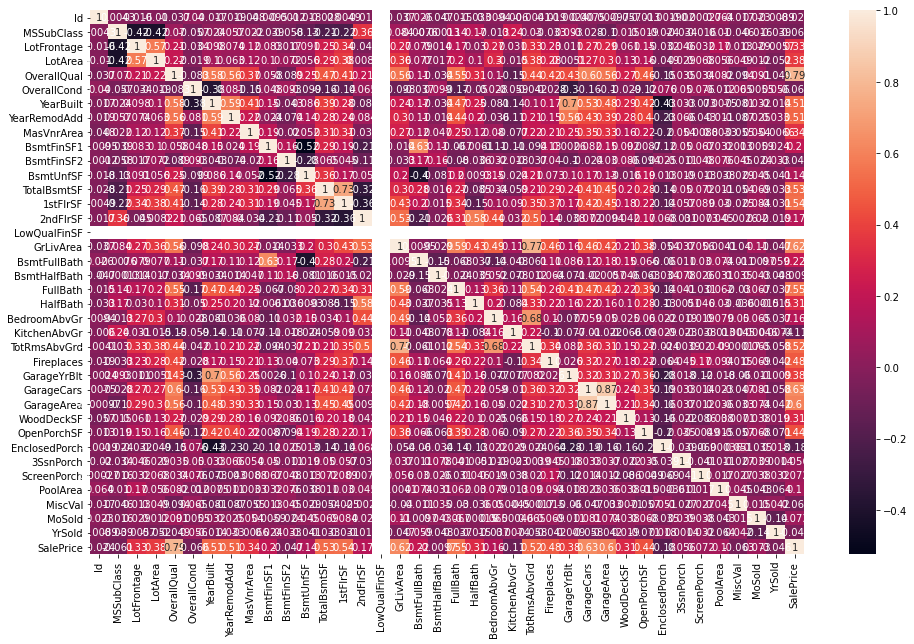

In [221]:
plt.figure(figsize=[16,10])
sns.heatmap(df6.corr(),annot=True)
plt.show()

In [222]:
corr=df6.corr()
corr['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.789185
GarageCars       0.628329
GrLivArea        0.620601
GarageArea       0.599093
FullBath         0.554988
1stFlrSF         0.537227
TotalBsmtSF      0.528732
TotRmsAbvGrd     0.518303
YearBuilt        0.514408
YearRemodAdd     0.507831
Fireplaces       0.475598
OpenPorchSF      0.444246
GarageYrBlt      0.381997
LotArea          0.380871
MasVnrArea       0.340823
LotFrontage      0.333893
HalfBath         0.309808
WoodDeckSF       0.307002
BsmtFullBath     0.218391
BsmtFinSF1       0.200522
2ndFlrSF         0.165162
BedroomAbvGr     0.158281
BsmtUnfSF        0.138859
PoolArea         0.104742
MoSold           0.072764
ScreenPorch      0.072359
3SsnPorch        0.056113
BsmtHalfBath    -0.009658
Id              -0.023897
YrSold          -0.045508
BsmtFinSF2      -0.047265
MSSubClass      -0.060775
MiscVal         -0.062961
OverallCond     -0.065642
KitchenAbvGr    -0.105223
EnclosedPorch   -0.175799
LowQualFinSF          NaN
Name: SalePr

Dropping out the columns which are having very less correlation with the label(target).

In [223]:
df7=df6.copy()

In [224]:
df7.drop('Id',axis=1,inplace=True)
df7.drop('BsmtHalfBath',axis=1,inplace=True)
df7.drop('3SsnPorch',axis=1,inplace=True)
df7.drop('BsmtFinSF2',axis=1,inplace=True)
df7.drop('MiscVal',axis=1,inplace=True)
df7.drop('OverallCond',axis=1,inplace=True)
df7.drop('MoSold',axis=1,inplace=True)
df7.drop('ScreenPorch',axis=1,inplace=True)

In [225]:
from sklearn.preprocessing import OrdinalEncoder

In [226]:
enc=OrdinalEncoder()
for i in df7.columns:
    if df7[i].dtypes=='object':
         df7[i]=enc.fit_transform(df7[i].values.reshape(-1,1))

In [227]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   float64
 2   LotFrontage    1168 non-null   float64
 3   LotArea        1168 non-null   float64
 4   Street         1168 non-null   float64
 5   Alley          1168 non-null   float64
 6   LotShape       1168 non-null   float64
 7   LandContour    1168 non-null   float64
 8   Utilities      1168 non-null   float64
 9   LotConfig      1168 non-null   float64
 10  LandSlope      1168 non-null   float64
 11  Neighborhood   1168 non-null   float64
 12  Condition1     1168 non-null   float64
 13  Condition2     1168 non-null   float64
 14  BldgType       1168 non-null   float64
 15  HouseStyle     1168 non-null   float64
 16  OverallQual    1168 non-null   int64  
 17  YearBuilt      1168 non-null   int64  
 18  YearRemo

Having converted the categorical dataset into the numerical type.

In [228]:
x=df7.drop('SalePrice',axis=1)
y=df7['SalePrice']

Converting the date into x and y label

In [229]:
se=StandardScaler()
x=se.fit_transform(x)

In [230]:
x.shape

(1168, 72)

Applying Standard Scaler first before splitting the data in x_train,x_test, y_train,y_test

# Model Building

In [231]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [232]:
le=LinearRegression()
le.fit(x_train,y_train)
pred=le.predict(x_test)
print(mean_absolute_error(y_test,pred))
print(mean_squared_error(y_test,pred))
print(np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))

23562.880122836046
1919437908.277439
43811.39016599952
0.724891180017379


In [233]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred1=dt.predict(x_test)
print(mean_absolute_error(y_test,pred1))
print(mean_squared_error(y_test,pred1))
print(np.sqrt(mean_squared_error(y_test,pred1)))
print(r2_score(y_test,pred1))

29040.42735042735
1949799956.7606838
44156.53922988852
0.7205394542884771


In [234]:
svr=SVR()
svr.fit(x_train,y_train)
pred2=svr.predict(x_test)
print(mean_absolute_error(y_test,pred2))
print(mean_squared_error(y_test,pred2))
print(np.sqrt(mean_squared_error(y_test,pred2)))
print(r2_score(y_test,pred2))

57126.478022950265
7249374164.028571
85143.25671495407
-0.03903687807656375


In [235]:
kvr=KNeighborsRegressor()
kvr.fit(x_train,y_train)
pred3=kvr.predict(x_test)
print(mean_absolute_error(y_test,pred3))
print(mean_squared_error(y_test,pred3))
print(np.sqrt(mean_squared_error(y_test,pred3)))
print(r2_score(y_test,pred3))

26501.4641025641
2727518006.3642735
52225.645102423325
0.6090708342393707


In [236]:
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)
pred4=ada.predict(x_test)
print(mean_absolute_error(y_test,pred4))
print(mean_squared_error(y_test,pred4))
print(np.sqrt(mean_squared_error(y_test,pred4)))
print(r2_score(y_test,pred4))

27746.702202679633
1692747099.5085876
41143.0079054581
0.7573822757868027


In [237]:
gr=GradientBoostingRegressor()
gr.fit(x_train,y_train)
pred5=gr.predict(x_test)
print(mean_absolute_error(y_test,pred5))
print(mean_squared_error(y_test,pred5))
print(np.sqrt(mean_squared_error(y_test,pred5)))
print(r2_score(y_test,pred5))

19976.191412884997
1540977038.2591145
39255.280386963415
0.7791351453529265


In [238]:
rfc=RandomForestRegressor()
rfc.fit(x_train,y_train)
pred6=rfc.predict(x_test)
print(mean_absolute_error(y_test,pred6))
print(mean_squared_error(y_test,pred6))
print(np.sqrt(mean_squared_error(y_test,pred6)))
print(r2_score(y_test,pred6))

20730.05692307693
1558700605.9008436
39480.3825450165
0.7765948653267942


In [239]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso(alpha=0.001)
ls.fit(x_train,y_train)
pred7=ls.predict(x_test)
print(mean_absolute_error(y_test,pred7))
print(mean_squared_error(y_test,pred7))
print(np.sqrt(mean_squared_error(y_test,pred7)))
print(r2_score(y_test,pred7))

23563.19732206958
1919410361.9533987
43811.07579087049
0.7248951281715073


In [240]:
rd=Ridge(alpha=0.001)
rd.fit(x_train,y_train)
pred8=rd.predict(x_test)
print(mean_absolute_error(y_test,pred8))
print(mean_squared_error(y_test,pred8))
print(np.sqrt(mean_squared_error(y_test,pred8)))
print(r2_score(y_test,pred8))

23563.19054743255
1919410699.1297548
43811.079638942414
0.7248950798447606


# Checking out the cross_val_score for all the models

In [241]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(le,x,y,cv=5)
print(score.mean())

0.7577750766780658


In [242]:
score1=cross_val_score(dt,x,y,cv=5)
print(score1.mean())

0.6413395945283457


In [243]:
score2=cross_val_score(svr,x,y,cv=5)
print(score2.mean())

-0.061760898499046445


In [244]:
score3=cross_val_score(kvr,x,y,cv=5)
print(score3.mean())

0.7125977914956483


In [245]:
score4=cross_val_score(ada,x,y,cv=5)
print(score4.mean())

0.7784315235297357


In [246]:
score5=cross_val_score(gr,x,y,cv=5)
print(score5.mean())

0.8230030362267465


In [247]:
score6=cross_val_score(rfc,x,y,cv=5)
print(score6.mean())

0.8265718809135573


In [248]:
score7=cross_val_score(ls,x,y,cv=5)
print(score7.mean())

0.7578058526910432


In [249]:
score8=cross_val_score(rd,x,y,cv=5)
print(score8.mean())

0.757806291982723


The difference between cross_val_Score the r2_score is minimum for decision Tree Regressor and Ada boost regressor. Further, to find the best model among these hypertuning is required.

In [250]:
from sklearn.model_selection import RandomizedSearchCV

In [251]:
params={'criterion':["mse", "friedman_mse", "mae"],'max_depth':np.arange(1,10),'max_features':["auto", "sqrt", "log2"],'random_state':np.arange(1,100)}

In [252]:
re=RandomizedSearchCV(dt,param_distributions=params,n_jobs=-1,cv=5)
re.fit(x_train,y_train)
re.best_params_

{'random_state': 63,
 'max_features': 'sqrt',
 'max_depth': 5,
 'criterion': 'mae'}

In [253]:
dt=DecisionTreeRegressor(criterion='mae',max_depth=3,max_features='auto',random_state=79)
dt.fit(x_train,y_train)
pred9=dt.predict(x_test)
print(mean_absolute_error(y_test,pred9))
print(mean_squared_error(y_test,pred9))
print(np.sqrt(mean_squared_error(y_test,pred9)))
print(r2_score(y_test,pred9))

32772.33974358974
2598332406.342949
50973.84041195002
0.6275867225769666


In [254]:
params1={'n_estimators':[10,20,30,40,50],'learning_rate':[0.1,0.01,0.001,1],'random_state':np.arange(1,100)}

In [255]:
re=RandomizedSearchCV(ada,param_distributions=params1,n_jobs=-1,cv=5)
re.fit(x_train,y_train)
re.best_params_

{'random_state': 90, 'n_estimators': 50, 'learning_rate': 1}

In [256]:
ada=AdaBoostRegressor(n_estimators=50,learning_rate=1,random_state=15)
ada.fit(x_train,y_train)
pred10=ada.predict(x_test)
print(mean_absolute_error(y_test,pred10))
print(mean_squared_error(y_test,pred10))
print(np.sqrt(mean_squared_error(y_test,pred10)))
print(r2_score(y_test,pred10))

26074.68949212662
1618282124.2873201
40227.87745192779
0.7680551771475677


# Ada Boost Regressor is my best model with the r2_Score of 77% without PCA

Text(0.5, 1.0, 'Ada boost Regressor')

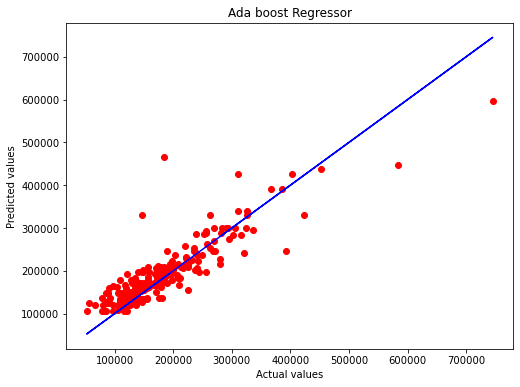

In [257]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred10,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Ada boost Regressor")

# The r2_score is calculated taking into consideration all the features without applying PCA.


# Applying PCA on the dataset and finding the r2_score 

In [258]:
x1=df7.drop('SalePrice',axis=1)
y1=df7['SalePrice']

In [259]:
se1=StandardScaler()
x1=se1.fit_transform(x1)

In [260]:
from sklearn.decomposition import PCA

In [261]:
testpca=PCA()
X=testpca.fit(x1)

In [262]:
arcum=np.cumsum(X.explained_variance_ratio_)*100
arcum

array([ 14.75718248,  20.67740353,  25.99560865,  30.24632065,
        33.54662004,  36.63558743,  39.39830408,  41.84909792,
        44.17259806,  46.48471467,  48.60988235,  50.54950435,
        52.47080198,  54.33641181,  56.14883768,  57.86590148,
        59.55391394,  61.1290572 ,  62.65044556,  64.13301757,
        65.59141406,  67.03355978,  68.42180551,  69.78059969,
        71.07878264,  72.34298018,  73.5523788 ,  74.74262378,
        75.91754266,  77.04985969,  78.16579172,  79.27474211,
        80.32548422,  81.3204443 ,  82.27442828,  83.21309389,
        84.11454239,  84.99650442,  85.85272419,  86.66021743,
        87.45892498,  88.23094972,  88.9908583 ,  89.74061511,
        90.45899788,  91.15230527,  91.81031638,  92.42919813,
        93.01301253,  93.59369411,  94.15555549,  94.68316964,
        95.20210485,  95.69233944,  96.16067333,  96.61016907,
        97.03441605,  97.43698394,  97.82340443,  98.14858773,
        98.44825713,  98.74024214,  98.96163133,  99.16

If we take dataset with only one feature then only 14% information is there and rest is lost.Further, if we consider two features only 20% information is there  and rest is lost and so on.

In [263]:
k=np.argmax(arcum>95)
print("number of components explaining 95% variance:",k)

number of components explaining 95% variance: 52


With 52 features 95% of the information is there and rest is lost.

In [264]:
finalpca=PCA(n_components=52)
X1=finalpca.fit_transform(x1)

In [265]:
X1.shape

(1168, 52)

In [266]:
x1.shape

(1168, 72)

The new dataset is having only 52 features as compared to the previous dataset having 72 features.

In [267]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.20,random_state=48)

In [268]:
le1=LinearRegression()
le1.fit(X1_train,y1_train)
pred11=le1.predict(X1_test)
print(mean_absolute_error(y1_test,pred11))
print(mean_squared_error(y1_test,pred11))
print(np.sqrt(mean_squared_error(y1_test,pred11)))
print(r2_score(y1_test,pred11))

20192.076603245914
862537484.7366108
29368.98848677991
0.8457150195104148


In [269]:
dt1=DecisionTreeRegressor()
dt1.fit(X1_train,y1_train)
pred12=dt1.predict(X1_test)
print(mean_absolute_error(y1_test,pred12))
print(mean_squared_error(y1_test,pred12))
print(np.sqrt(mean_squared_error(y1_test,pred12)))
print(r2_score(y1_test,pred12))

27974.824786324785
2287797459.491453
47830.925764524494
0.5907739748730492


In [270]:
svr1=SVR()
svr1.fit(X1_train,y1_train)
pred13=svr1.predict(X1_test)
print(mean_absolute_error(y1_test,pred13))
print(mean_squared_error(y1_test,pred13))
print(np.sqrt(mean_squared_error(y1_test,pred13)))
print(r2_score(y1_test,pred13))

53038.45363104528
5696872631.003584
75477.63000388647
-0.019018765305530927


In [271]:
knr1=KNeighborsRegressor()
knr1.fit(X1_train,y1_train)
pred14=knr1.predict(X1_test)
print(mean_absolute_error(y1_test,pred14))
print(mean_squared_error(y1_test,pred14))
print(np.sqrt(mean_squared_error(y1_test,pred14)))
print(r2_score(y1_test,pred14))

22561.519658119658
1250948116.1788032
35368.744905337015
0.7762387036928995


In [272]:
ada1=AdaBoostRegressor()
ada1.fit(X1_train,y1_train)
pred15=ada1.predict(X1_test)
print(mean_absolute_error(y1_test,pred15))
print(mean_squared_error(y1_test,pred15))
print(np.sqrt(mean_squared_error(y1_test,pred15)))
print(r2_score(y1_test,pred15))

29224.91886065377
1552685395.6808412
39404.129170441534
0.7222659418074631


In [273]:
gr1=GradientBoostingRegressor()
gr1.fit(X1_train,y1_train)
pred16=gr1.predict(X1_test)
print(mean_absolute_error(y1_test,pred16))
print(mean_squared_error(y1_test,pred16))
print(np.sqrt(mean_squared_error(y1_test,pred16)))
print(r2_score(y1_test,pred16))

18089.05247215601
869226675.5155567
29482.650415380853
0.8445185014609576


In [274]:
rfr=RandomForestRegressor()
rfr.fit(X1_train,y1_train)
pred17=rfr.predict(X1_test)
print(mean_absolute_error(y1_test,pred17))
print(mean_squared_error(y1_test,pred17))
print(np.sqrt(mean_squared_error(y1_test,pred17)))
print(r2_score(y1_test,pred17))

19415.8202991453
1073959067.9878926
32771.31471253317
0.8078973299325967


In [275]:
ls1=Lasso(alpha=0.001)
ls1.fit(X1_train,y1_train)
pred18=ls1.predict(X1_test)
print(mean_absolute_error(y1_test,pred18))
print(mean_squared_error(y1_test,pred18))
print(np.sqrt(mean_squared_error(y1_test,pred18)))
print(r2_score(y1_test,pred18))

20192.07630757729
862537521.8599757
29368.989118796304
0.8457150128700337


In [276]:
rd1=Ridge(alpha=0.001)
rd1.fit(X1_train,y1_train)
pred19=rd1.predict(X1_test)
print(mean_absolute_error(y1_test,pred19))
print(mean_squared_error(y1_test,pred19))
print(np.sqrt(mean_squared_error(y1_test,pred19)))
print(r2_score(y1_test,pred19))

20192.072626178877
862537489.7299563
29368.988571790418
0.8457150186172384


# Checking out the cross_val_score for all the models

In [277]:
score=cross_val_score(le1,X1,y1,cv=5)
print(score.mean())

0.7700201356852288


In [278]:
score1=cross_val_score(dt1,X1,y1,cv=5)
print(score1.mean())

0.5839585970368905


In [279]:
score2=cross_val_score(svr1,X1,y1,cv=5)
print(score2.mean())

-0.06170759756493989


In [280]:
score3=cross_val_score(knr1,X1,y1,cv=5)
print(score3.mean())

0.6988964879184704


In [281]:
score4=cross_val_score(ada1,X1,y1,cv=5)
print(score4.mean())

0.7047777491687766


In [282]:
score5=cross_val_score(gr1,X1,y1,cv=5)
print(score5.mean())

0.8083908427577118


In [283]:
score6=cross_val_score(rfr,X1,y1,cv=5)
print(score6.mean())

0.784872093098531


In [284]:
score7=cross_val_score(ls1,X1,y1,cv=5)
print(score7.mean())

0.7700201575500023


In [285]:
score8=cross_val_score(rd1,X1,y1,cv=5)
print(score8.mean())

0.770020224998445


The difference between the cross_val_score and the r2_score is minimum for Decision Tree Regressor .Further, Decision Tree Regrerssor is my best model.

Hytertuning of Decision Tree Regressor to find out if the r2_score can be improved or not.

In [398]:
params2={'criterion':["mse", "mae"],'max_depth':np.arange(1,10),'max_features':["auto", "sqrt", "log2"],'random_state':np.arange(1,100)}

In [399]:
re2=RandomizedSearchCV(dt1,param_distributions=params2,n_jobs=-1,cv=5)
re2.fit(X1_train,y1_train)
re2.best_params_

{'random_state': 44,
 'max_features': 'sqrt',
 'max_depth': 9,
 'criterion': 'mse'}

In [400]:
dt1=DecisionTreeRegressor(criterion='mse',max_depth=9,max_features='sqrt',random_state=44)
dt1.fit(X1_train,y1_train)
pred20=dt1.predict(X1_test)
print(mean_absolute_error(y1_test,pred20))
print(mean_squared_error(y1_test,pred20))
print(np.sqrt(mean_squared_error(y1_test,pred20)))
print(r2_score(y1_test,pred20))

45723.79688312381
5261363068.586095
72535.25397064585
0.058882294682752634


# Decision Tree Regressor is my best model with r2_score of 59% after applying PCA

Text(0.5, 1.0, 'Decision Tree Regressor')

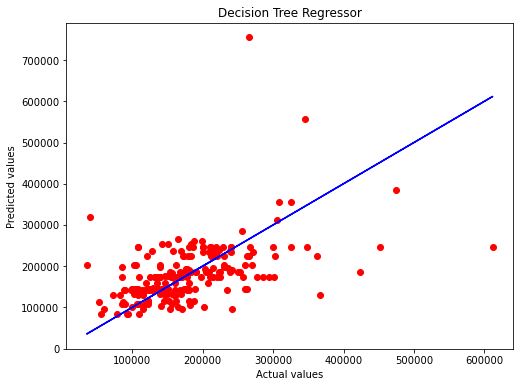

In [401]:
plt.figure(figsize=(8,6))
plt.scatter(x=y1_test,y=pred20,color='r')
plt.plot(y1_test,y1_test,color='b')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Decision Tree Regressor")

# Applying Prediction on the test data

In [290]:
test=pd.read_csv('test_data.csv')

In [291]:
test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
5     650         180       RM         21.0     1936   Pave   NaN      Reg   
6    1453         180       RM         35.0     3675   Pave   NaN      Reg   
7     152          20       RL        107.0    13891   Pave   NaN      Reg   
8     427          80       RL          NaN    12800   Pave   NaN      Reg   
9     776         120       RM         32.0     4500   Pave   NaN      Reg   
10     30          30       RM         60.0     6324   Pave   NaN      IR1   
11   1425          20       RL          NaN     9503   Pave   NaN      Reg   
12    423          20       RL        100.0    21750   Pave   NaN      Reg   
13   1185          20       RL         50.0    35133   Grvl   NaN      Reg   
14    775          20       RL        110.0    14226   Pave   NaN      Reg   
15    391          50       RL         50.0     8405   Pave  Grvl      Reg   
16   1408          20       RL          NaN     8780   Pave   NaN      IR1   
17    513          20       RL         70.0     9100   Pave   NaN      Reg   
18   1266         160       FV         35.0     3735   Pave   NaN      Reg   
19    173         160       RL         44.0     5306   Pave   NaN      IR1   
20   1150          70       RM         50.0     9000   Pave   NaN      Reg   
21    797          20       RL         71.0     8197   Pave   NaN      Reg   
22    137          20       RL          NaN    10355   Pave   NaN      IR1   
23    706         190       RM         70.0     5600   Pave   NaN      Reg   
24   1377          30       RL         52.0     6292   Pave   NaN      Reg   
25   1177          20       RL         37.0     6951   Pave   NaN      IR1   
26   1456          60       RL         62.0     7917   Pave   NaN      Reg   
27    369          20       RL         78.0     7800   Pave   NaN      Reg   
28   1421          60       RL         90.0    11700   Pave   NaN      Reg   
29    999          30       RM         60.0     9786   Pave   NaN      Reg   
30   1217          90       RM         68.0     8930   Pave   NaN      Reg   
31    937          20       RL         67.0    10083   Pave   NaN      Reg   
32    769          20       RL         70.0     9100   Pave   NaN      Reg   
33    831          20       RL         80.0    11900   Pave   NaN      IR1   
34    678          30       RL         52.0     9022   Pave   NaN      Reg   
35    574          80       RL         76.0     9967   Pave   NaN      IR1   
36    921          60       RL         70.0     8462   Pave   NaN      IR1   
37   1292         160       RM         21.0     1680   Pave   NaN      Reg   
38   1277          60       RL          NaN    12936   Pave   NaN      IR1   
39    676         160       RL         24.0     2289   Pave   NaN      Reg   
40    108          20       RM         50.0     6000   Pave   NaN      Reg   
41    424          60       RL         80.0     9200   Pave   NaN      Reg   
42    823          60       RL          NaN    12394   Pave   NaN      IR1   
43   1455          20       FV         62.0     7500   Pave  Pave      Reg   
44    377          85       RL         57.0     8846   Pave   NaN      IR1   
45   1256          50       RM         52.0     6240   Pave   NaN      Reg   
46   1120          20       RL         70.0     7560   Pave   NaN      Reg   
47    265          30       RM         30.0     5232   Pave  Grvl      IR3   
48   1158         120       RL         34.0     5001   Pave   NaN      IR1   
49    725          20       RL         86.0    13286   Pave   NaN      IR1   
50   1378          50       R

In [292]:
df11=pd.DataFrame(test)

In [293]:
df11

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
5     650         180       RM         21.0     1936   Pave   NaN      Reg   
6    1453         180       RM         35.0     3675   Pave   NaN      Reg   
7     152          20       RL        107.0    13891   Pave   NaN      Reg   
8     427          80       RL          NaN    12800   Pave   NaN      Reg   
9     776         120       RM         32.0     4500   Pave   NaN      Reg   
10     30          30       RM         60.0     6324   Pave   NaN      IR1   
11   1425          20       RL          NaN     9503   Pave   NaN      Reg   
12    423          20       RL        100.0    21750   Pave   NaN      Reg   
13   1185          20       RL         50.0    35133   Grvl   NaN      Reg   
14    775          20       RL        110.0    14226   Pave   NaN      Reg   
15    391          50       RL         50.0     8405   Pave  Grvl      Reg   
16   1408          20       RL          NaN     8780   Pave   NaN      IR1   
17    513          20       RL         70.0     9100   Pave   NaN      Reg   
18   1266         160       FV         35.0     3735   Pave   NaN      Reg   
19    173         160       RL         44.0     5306   Pave   NaN      IR1   
20   1150          70       RM         50.0     9000   Pave   NaN      Reg   
21    797          20       RL         71.0     8197   Pave   NaN      Reg   
22    137          20       RL          NaN    10355   Pave   NaN      IR1   
23    706         190       RM         70.0     5600   Pave   NaN      Reg   
24   1377          30       RL         52.0     6292   Pave   NaN      Reg   
25   1177          20       RL         37.0     6951   Pave   NaN      IR1   
26   1456          60       RL         62.0     7917   Pave   NaN      Reg   
27    369          20       RL         78.0     7800   Pave   NaN      Reg   
28   1421          60       RL         90.0    11700   Pave   NaN      Reg   
29    999          30       RM         60.0     9786   Pave   NaN      Reg   
30   1217          90       RM         68.0     8930   Pave   NaN      Reg   
31    937          20       RL         67.0    10083   Pave   NaN      Reg   
32    769          20       RL         70.0     9100   Pave   NaN      Reg   
33    831          20       RL         80.0    11900   Pave   NaN      IR1   
34    678          30       RL         52.0     9022   Pave   NaN      Reg   
35    574          80       RL         76.0     9967   Pave   NaN      IR1   
36    921          60       RL         70.0     8462   Pave   NaN      IR1   
37   1292         160       RM         21.0     1680   Pave   NaN      Reg   
38   1277          60       RL          NaN    12936   Pave   NaN      IR1   
39    676         160       RL         24.0     2289   Pave   NaN      Reg   
40    108          20       RM         50.0     6000   Pave   NaN      Reg   
41    424          60       RL         80.0     9200   Pave   NaN      Reg   
42    823          60       RL          NaN    12394   Pave   NaN      IR1   
43   1455          20       FV         62.0     7500   Pave  Pave      Reg   
44    377          85       RL         57.0     8846   Pave   NaN      IR1   
45   1256          50       RM         52.0     6240   Pave   NaN      Reg   
46   1120          20       RL         70.0     7560   Pave   NaN      Reg   
47    265          30       RM         30.0     5232   Pave  Grvl      IR3   
48   1158         120       RL         34.0     5001   Pave   NaN      IR1   
49    725          20       RL         86.0    13286   Pave   NaN      IR1   
50   1378          50       R

In [294]:
df11.shape

(292, 80)

The test dataset is having 292 rows and 80 columns(features).

In [295]:
df11.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [296]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

The dataset is a mix of integer,float ,object(categorical) datatype.
There are null values present in the dataset.

In [297]:
df11.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley            278
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

There are null values present in features named as LotFrontage ,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence and MiscFeature.

In [298]:
df11['Alley']=df11['Alley'].replace(np.nan,'No alley access')

In [299]:
df11['Alley'].value_counts()

No alley access    278
Grvl                 9
Pave                 5
Name: Alley, dtype: int64

The feature Alley is having third category as per the dataset information so i have replaced the nan values appearing in the alley feature with 'No alley access'.

In [300]:
df11['MasVnrType']=df11['MasVnrType'].replace(np.nan,'None')

In [301]:
df11['MasVnrType'].value_counts()

None       169
BrkFace     91
Stone       30
BrkCmn       2
Name: MasVnrType, dtype: int64

The feature MasVnrType is having maximum records for None Type so the null values are replaced with the mode which is None in this case.

In [302]:
df11['LotFrontage']=df11['LotFrontage'].fillna(df11['LotFrontage'].mean())

The nan values in feature LotFrontage is replaced by the mean of that feature.

In [303]:
df11['MasVnrArea']=df11['MasVnrArea'].fillna(df11['MasVnrArea'].median())

The nan values in feature MasVnrArea is replaced by the median of that feature.

In [304]:
df11['BsmtQual'].value_counts()  

TA    132
Gd    120
Ex     27
Fa      6
Name: BsmtQual, dtype: int64

In [305]:
df11['BsmtQual']=df11['BsmtQual'].replace(np.nan,'No Basement')

In [306]:
df11['BsmtQual'].value_counts()  

TA             132
Gd             120
Ex              27
No Basement      7
Fa               6
Name: BsmtQual, dtype: int64

The feature BsmtQual is having fifth category as NA i.e 'No Basement '.Further, the nan values are replaced with 'No Basement' in feature BsmtQual.

In [307]:
df11['BsmtCond'].value_counts()   

TA    270
Gd      9
Fa      6
Name: BsmtCond, dtype: int64

In [308]:
df11['BsmtCond']=df11['BsmtCond'].replace(np.nan,'No Basement')

The feature BsmtCond is having fifth category as NA i.e 'No Basement '.Further, the nan values are replaced with 'No Basement' in feature BsmtCond.

In [309]:
df11['BsmtExposure'].value_counts()

No    197
Av     41
Gd     26
Mn     21
Name: BsmtExposure, dtype: int64

In [310]:
df11['BsmtExposure']=df11['BsmtExposure'].replace(np.nan,'No Basement')

In [311]:
df11['BsmtExposure'].value_counts()

No             197
Av              41
Gd              26
Mn              21
No Basement      7
Name: BsmtExposure, dtype: int64

The feature BsmtExposure is having fifth category as NA i.e 'No Basement '.Further, the nan values are replaced with 'No Basement' in feature BsmtExposure.

In [312]:
df11['BsmtFinType1'].value_counts()  

GLQ    88
Unf    85
ALQ    46
BLQ    27
Rec    24
LwQ    15
Name: BsmtFinType1, dtype: int64

In [313]:
df11['BsmtFinType1']=df11['BsmtFinType1'].replace(np.nan,'No Basement')

The feature BsmtFinType1 is having seventh category as NA i.e 'No Basement '.Further, the nan values are replaced with 'No Basement' in feature  BsmtFinType1 .

In [314]:
df11['BsmtFinType2'].value_counts()  

Unf    254
Rec     11
BLQ      9
LwQ      6
ALQ      3
GLQ      2
Name: BsmtFinType2, dtype: int64

In [315]:
df11['BsmtFinType2']=df11['BsmtFinType2'].replace(np.nan,'No Basement')

The feature BsmtFinType2 is having seventh category as NA i.e 'No Basement '.Further, the nan values are replaced with 'No Basement' in feature BsmtFinType2 .

In [316]:
df11['Electrical'].value_counts()

SBrkr    264
FuseA     20
FuseF      6
FuseP      1
Name: Electrical, dtype: int64

In [317]:
df11['Electrical']=df11['Electrical'].replace(np.nan,'SBrkr')

The feature Electrical is having maximum records for SBrkr Type so the null values are replaced with the mode which is SBrkr in this case.

In [318]:
df11['Electrical'].value_counts()

SBrkr    265
FuseA     20
FuseF      6
FuseP      1
Name: Electrical, dtype: int64

In [319]:
df11['FireplaceQu'].value_counts() 

Gd    79
TA    61
Fa     8
Ex     3
Po     2
Name: FireplaceQu, dtype: int64

In [320]:
df11['FireplaceQu']=df11['FireplaceQu'].replace(np.nan,'No Fireplace')

The feature FireplaceQu is having sixth category as NA i.e 'No Fireplace '. Further, the nan values are replaced with 'No Fireplace' in feature FireplaceQu.

In [321]:
df11['FireplaceQu'].value_counts()

No Fireplace    139
Gd               79
TA               61
Fa                8
Ex                3
Po                2
Name: FireplaceQu, dtype: int64

In [322]:
df11['GarageType']=df11['GarageType'].replace(np.nan,'No Garage')

The feature GarageType is having seventh category as NA i.e 'No Garage '. Further, the nan values are replaced with 'No Garage' in feature GarageType.

In [323]:
df11['GarageType'].value_counts()

Attchd       179
Detchd        73
BuiltIn       18
No Garage     17
Basment        3
CarPort        1
2Types         1
Name: GarageType, dtype: int64

In [324]:
df11['GarageYrBlt'].value_counts()

2004.0    17
2005.0    14
2003.0    13
1977.0    11
2000.0     9
1976.0     9
2007.0     9
2008.0     8
1968.0     8
2006.0     7
1999.0     7
1996.0     7
1950.0     6
1998.0     6
1970.0     6
1978.0     5
1964.0     5
1972.0     5
1954.0     5
1967.0     5
1973.0     4
1979.0     4
1965.0     4
1958.0     4
1984.0     4
1959.0     3
1966.0     3
1962.0     3
1987.0     3
2009.0     3
1963.0     3
1992.0     3
1994.0     3
1956.0     3
1980.0     3
1960.0     3
1941.0     3
1953.0     3
2002.0     3
1939.0     3
1925.0     3
2001.0     2
1928.0     2
1930.0     2
1957.0     2
1993.0     2
1920.0     2
1989.0     2
1991.0     2
1922.0     2
1997.0     2
1926.0     2
1948.0     2
1990.0     2
1940.0     2
1988.0     2
1916.0     1
1974.0     1
2010.0     1
1985.0     1
1949.0     1
1955.0     1
1995.0     1
1982.0     1
1951.0     1
1924.0     1
1931.0     1
1938.0     1
1975.0     1
1971.0     1
1969.0     1
Name: GarageYrBlt, dtype: int64

In [325]:
df11['GarageYrBlt']=df11['GarageYrBlt'].replace(np.nan,2004.0)

The maximum records i.e 17 for feature GarageYrBlt are for garage built in year 2004. Further, the nan values in feature GarageYrBlt will be replaced by the maximum records i.e 2004 in this case.

In [326]:
df11['GarageYrBlt'].value_counts()

2004.0    34
2005.0    14
2003.0    13
1977.0    11
1976.0     9
2000.0     9
2007.0     9
2008.0     8
1968.0     8
2006.0     7
1996.0     7
1999.0     7
1970.0     6
1998.0     6
1950.0     6
1967.0     5
1954.0     5
1964.0     5
1972.0     5
1978.0     5
1965.0     4
1958.0     4
1973.0     4
1984.0     4
1979.0     4
1959.0     3
1966.0     3
1962.0     3
1987.0     3
2009.0     3
1963.0     3
1992.0     3
1994.0     3
1956.0     3
1980.0     3
1960.0     3
1941.0     3
1953.0     3
2002.0     3
1939.0     3
1925.0     3
2001.0     2
1928.0     2
1930.0     2
1957.0     2
1993.0     2
1920.0     2
1989.0     2
1991.0     2
1922.0     2
1997.0     2
1926.0     2
1948.0     2
1990.0     2
1940.0     2
1988.0     2
1916.0     1
1974.0     1
2010.0     1
1985.0     1
1949.0     1
1955.0     1
1995.0     1
1982.0     1
1951.0     1
1924.0     1
1931.0     1
1938.0     1
1975.0     1
1971.0     1
1969.0     1
Name: GarageYrBlt, dtype: int64

In [327]:
df11['GarageFinish'].value_counts()

Unf    118
RFn     83
Fin     74
Name: GarageFinish, dtype: int64

In [328]:
df11['GarageFinish']=df11['GarageFinish'].replace(np.nan,'No Garage')

the feature GarageFinish is having fourth category as NA i.e 'No Garage '. Further, the nan values are replaced with 'No Garage' in feature GarageFinish.

In [329]:
df11['GarageFinish'].value_counts()

Unf          118
RFn           83
Fin           74
No Garage     17
Name: GarageFinish, dtype: int64

In [330]:
df11['GarageQual'].value_counts()

TA    261
Fa      9
Gd      3
Ex      1
Po      1
Name: GarageQual, dtype: int64

In [331]:
df11['GarageQual']=df11['GarageQual'].replace(np.nan,'No Garage')

The feature GarageQual is having sixth category as NA i.e 'No Garage '. Further, the nan values are replaced with 'No Garage' in feature GarageQual.

In [332]:
df11['GarageQual'].value_counts()

TA           261
No Garage     17
Fa             9
Gd             3
Ex             1
Po             1
Name: GarageQual, dtype: int64

In [333]:
df11['GarageCond'].value_counts()

TA    265
Fa      7
Ex      1
Gd      1
Po      1
Name: GarageCond, dtype: int64

In [334]:
df11['GarageCond']=df11['GarageCond'].replace(np.nan,'No Garage')

The feature GarageCond is having sixth category as NA i.e 'No Garage '. Further, the nan values are replaced with 'No Garage' in feature GarageCond.

In [335]:
df11['GarageCond'].value_counts()

TA           265
No Garage     17
Fa             7
Ex             1
Gd             1
Po             1
Name: GarageCond, dtype: int64

In [336]:
df11['PoolQC'].value_counts()

Series([], Name: PoolQC, dtype: int64)

In [337]:
df11['PoolQC']=df11['PoolQC'].replace(np.nan,'No Pool ')

The feature PoolQC is having fifth category as NA i.e 'No Pool '. Further, the nan values are replaced with 'No Pool' in feature PoolQC.

In [338]:
df11['PoolQC'].value_counts()

No Pool     292
Name: PoolQC, dtype: int64

In [339]:
df11['Fence'].value_counts()

MnPrv    28
GdPrv     8
GdWo      7
MnWw      1
Name: Fence, dtype: int64

In [340]:
df11['Fence']=df11['Fence'].replace(np.nan,'No Fence')

The feature Fence is having fifth category as NA i.e 'No Fence '. Further, the nan values are replaced with 'No Fence' in feature Fence.

In [341]:
df11['Fence'].value_counts()

No Fence    248
MnPrv        28
GdPrv         8
GdWo          7
MnWw          1
Name: Fence, dtype: int64

In [342]:
df11['MiscFeature'].value_counts()

Shed    9
Othr    1
Name: MiscFeature, dtype: int64

In [343]:
df11['MiscFeature']=df11['MiscFeature'].replace(np.nan,'None')

The feature MiscFeature is having sixth category as NA i.e 'None '. Further, the nan values are replaced with 'None' in feature MiscFeature.

In [344]:
df11['MiscFeature'].value_counts()

None    282
Shed      9
Othr      1
Name: MiscFeature, dtype: int64

In [345]:
df11.describe()

Id  MSSubClass  LotFrontage        LotArea  OverallQual  \
count   292.000000  292.000000   292.000000     292.000000   292.000000   
mean    755.955479   57.414384    66.425101   10645.143836     6.078767   
std     442.565228   43.780649    19.975962   13330.669795     1.356147   
min       6.000000   20.000000    21.000000    1526.000000     3.000000   
25%     377.750000   20.000000    57.750000    7200.000000     5.000000   
50%     778.000000   50.000000    66.425101    9200.000000     6.000000   
75%    1152.250000   70.000000    76.000000   11658.750000     7.000000   
max    1456.000000  190.000000   150.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count   292.000000   292.000000    292.000000   292.000000   292.000000  ...   
mean      5.493151  1972.616438   1985.294521   108.797945   439.294521  ...   
std       1.063267    30.447016     20.105792   174.845785   429.559675  ...   
min       3.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1968.000000     0.000000     0.000000  ...   
50%       5.000000  1976.000000   1994.000000     0.000000   369.500000  ...   
75%       6.000000  2001.000000   2003.250000   180.000000   700.500000  ...   
max       9.000000  2009.000000   2010.000000  1031.000000  1767.000000  ...   

        GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch   3SsnPorch  \
count   292.000000  292.000000   292.000000     292.000000  292.000000   
mean    457.458904   86.397260    47.061644      17.708904    2.489726   
std     210.785591  121.898836    65.865449      51.892906   30.247488   
min       0.000000    0.000000     0.000000       0.000000    0.000000   
25%     300.000000    0.000000     0.000000       0.000000    0.000000   
50%     467.500000    0.000000    28.500000       0.000000    0.000000   
75%     569.750000  149.250000    66.000000       0.000000    0.000000   
max    1052.000000  728.000000   418.000000     330.000000  407.000000   

       ScreenPorch  PoolArea      MiscVal      MoSold       YrSold  
count   292.000000     292.0   292.000000  292.000000   292.000000  
mean     15.099315       0.0    28.184932    6.232877  2007.859589  
std      58.483473       0.0   224.036218    2.774556     1.322867  
min       0.000000       0.0     0.000000    1.000000  2006.000000  
25%       0.000000       0.0     0.000000    4.000000  2007.000000  
50%       0.000000       0.0     0.000000    6.000000  2008.000000  
75%       0.000000       0.0     0.000000    8.000000  2009.000000  
max     396.000000       0.0  3500.000000   12.000000  2010.000000  

[8 rows x 37 columns]

The features named as LotArea,MasVnrArea,BsmtFinSF1,OpenPorchSF,WoodDeckSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal are having right tailed skewness as the mean is greater than median.

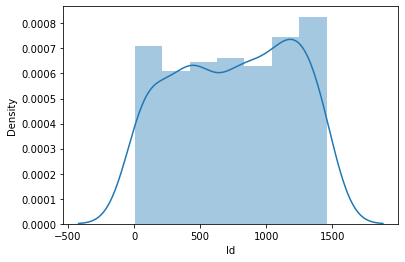

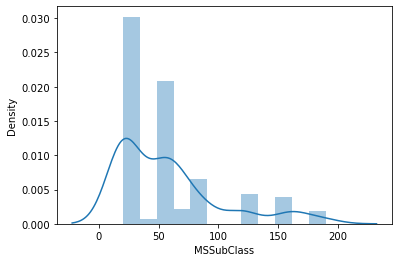

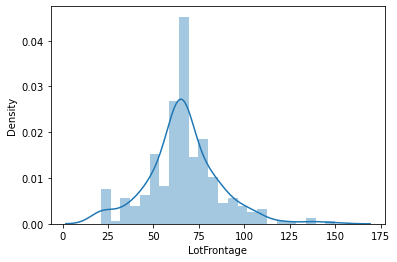

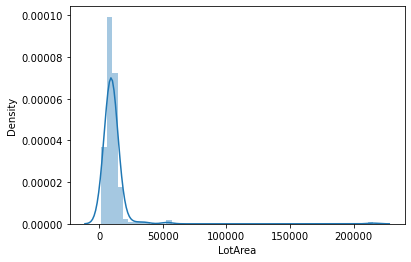

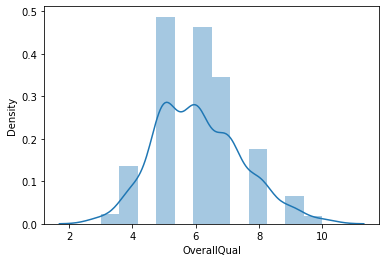

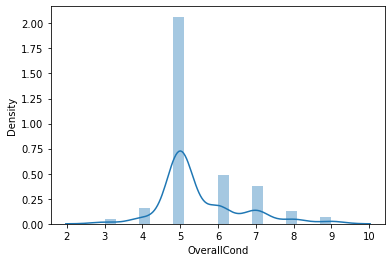

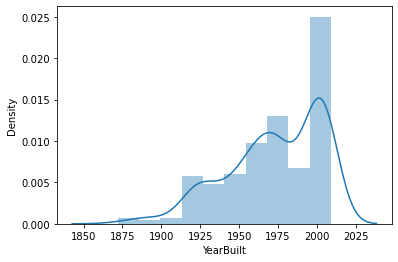

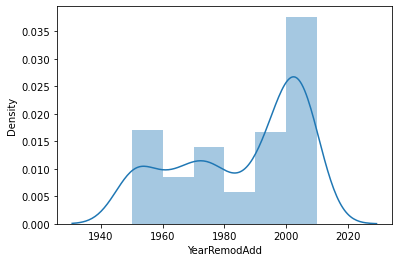

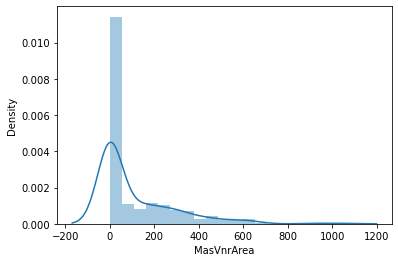

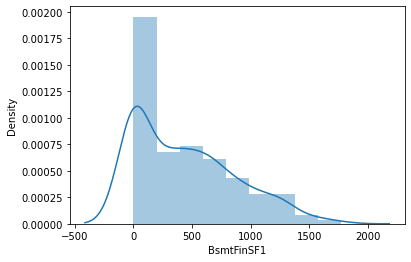

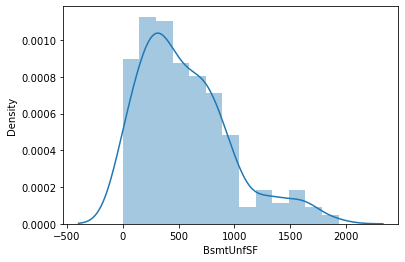

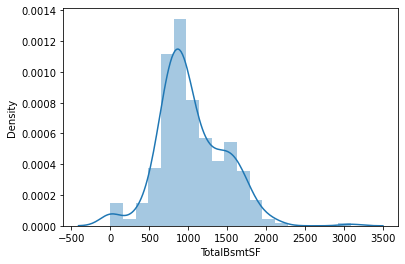

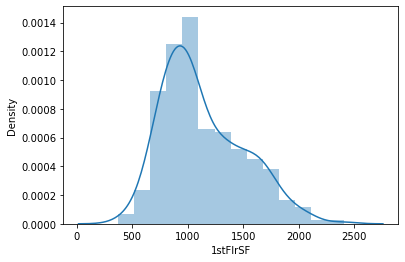

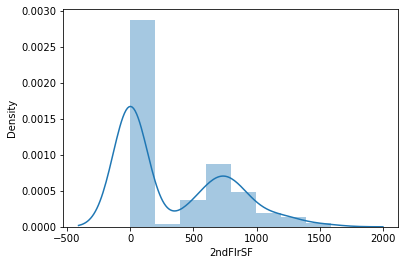

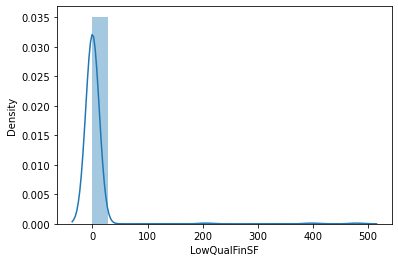

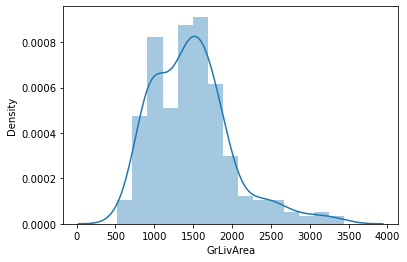

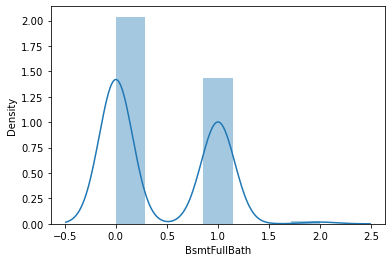

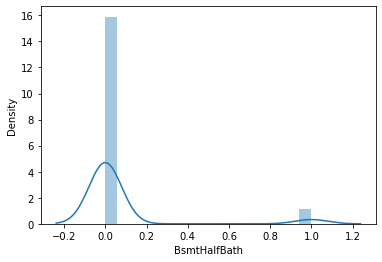

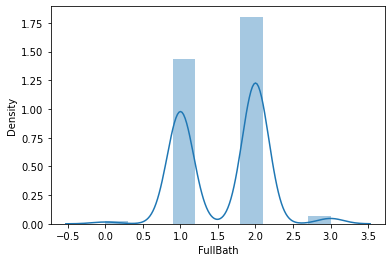

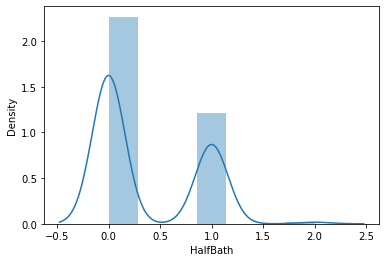

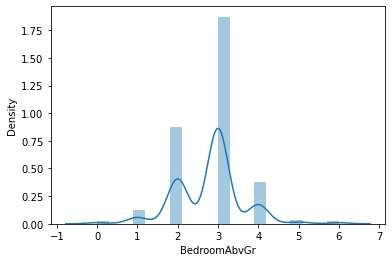

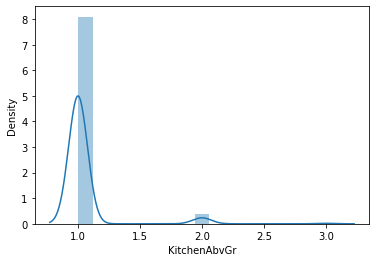

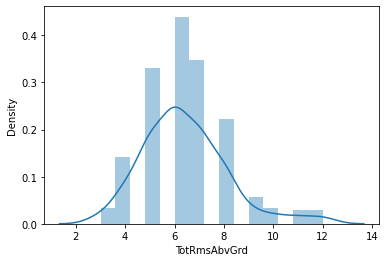

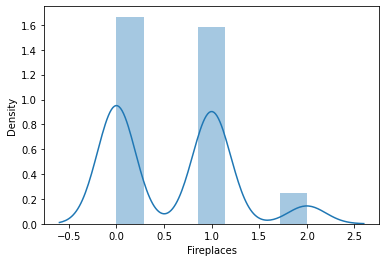

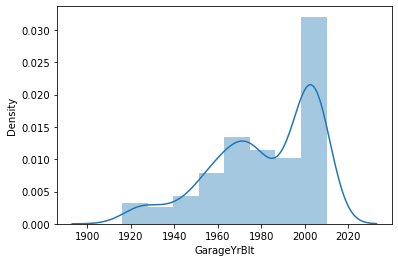

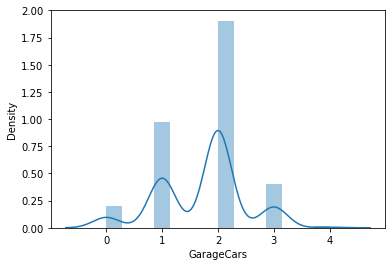

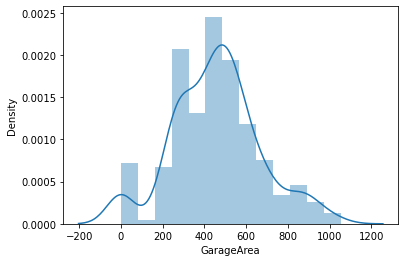

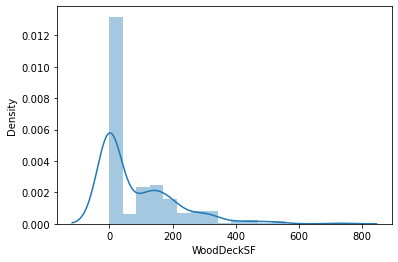

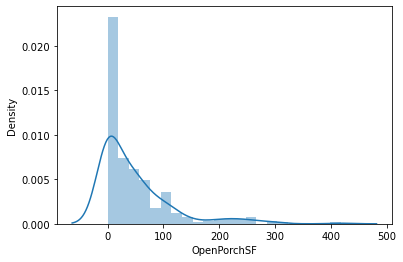

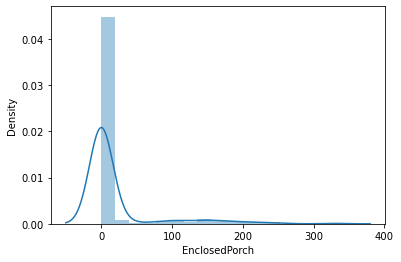

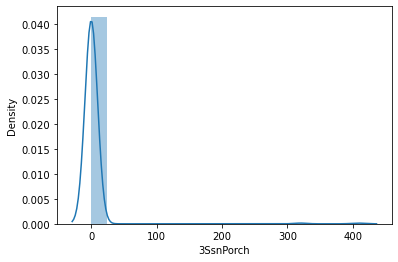

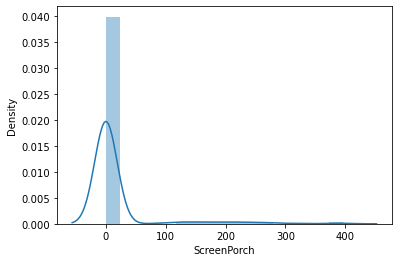

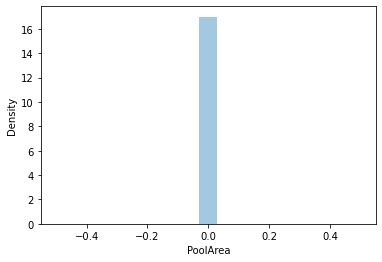

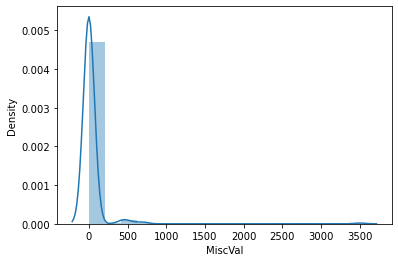

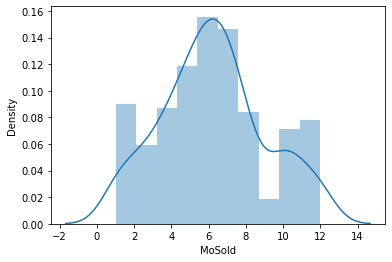

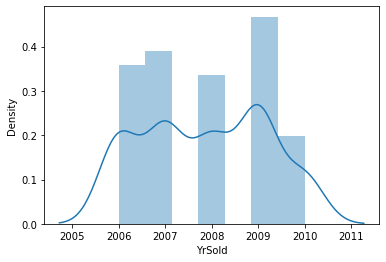

In [346]:
for i in df11.columns:
    if df11[i].dtypes=='int64':
        sns.distplot(df11[i])
        plt.show()
    elif df11[i].dtypes=='float64':
        sns.distplot(df11[i])
        plt.show()

Looking at the distribution of numerical categories it can said that features named as LotArea,MasVnrArea,BsmtFinSF1,OpenPorchSF,WoodDeckSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal are having right tailed skewness.

Id                  AxesSubplot(0.125,0.749828;0.065678x0.130172)
MSSubClass       AxesSubplot(0.203814,0.749828;0.065678x0.130172)
LotFrontage      AxesSubplot(0.282627,0.749828;0.065678x0.130172)
LotArea          AxesSubplot(0.361441,0.749828;0.065678x0.130172)
OverallQual      AxesSubplot(0.440254,0.749828;0.065678x0.130172)
OverallCond      AxesSubplot(0.519068,0.749828;0.065678x0.130172)
YearBuilt        AxesSubplot(0.597881,0.749828;0.065678x0.130172)
YearRemodAdd     AxesSubplot(0.676695,0.749828;0.065678x0.130172)
MasVnrArea       AxesSubplot(0.755508,0.749828;0.065678x0.130172)
BsmtFinSF1       AxesSubplot(0.834322,0.749828;0.065678x0.130172)
BsmtFinSF2          AxesSubplot(0.125,0.593621;0.065678x0.130172)
BsmtUnfSF        AxesSubplot(0.203814,0.593621;0.065678x0.130172)
TotalBsmtSF      AxesSubplot(0.282627,0.593621;0.065678x0.130172)
1stFlrSF         AxesSubplot(0.361441,0.593621;0.065678x0.130172)
2ndFlrSF         AxesSubplot(0.440254,0.593621;0.065678x0.130172)
LowQualFin

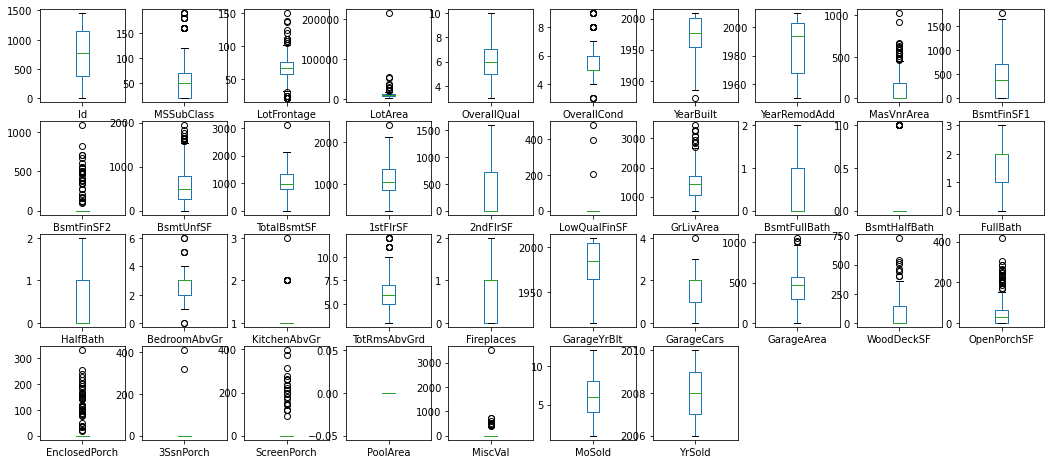

In [347]:
df11.plot(kind='box',figsize=[18,10],layout=(5,10),subplots=True)

From the above boxplot it can be said there are outliers present in the dataset.

I am not treating outliers from feature named as MSSubclass as 160 ,180 and 190 value belongs to 2-STORY PUD - 1946 & NEWER,PUD - MULTILEVEL - INCL SPLIT LEV/FOYER and 2 FAMILY CONVERSION - ALL STYLES AND AGES type of dwelling.

Similarly for the feature named as LotFrontage area the outlier treatment is not required as the chances are the lotFrontage area can be more than 100.

In [348]:
Q1=df11['LotArea'].quantile(0.25)
Q3=df11['LotArea'].quantile(0.75)
IQR=Q3-Q1
lower_boundary=Q1-(1.5*IQR)
upper_boundary=Q3+(1.5*IQR)
print(Q1,Q3,IQR,lower_boundary,upper_boundary)
df11['LotArea']=df11['LotArea'].astype('float')
df11['LotArea'].values[df11['LotArea']>upper_boundary]=np.nan

7200.0 11658.75 4458.75 511.875 18346.875


The outliers present in the feature named as  OverallCond is not to be treated as higher the overall ratings the better it is.

In [349]:
Q11=df11['MasVnrArea'].quantile(0.25)
Q31=df11['MasVnrArea'].quantile(0.75)
IQR1=Q31-Q11
lower_boundary1=Q11-(1.5*IQR1)
upper_boundary1=Q31+(1.5*IQR1)
print(Q11,Q31,IQR1,lower_boundary1,upper_boundary1)
df11['MasVnrArea'].values[df11['MasVnrArea']>upper_boundary1]=np.nan

0.0 180.0 180.0 -270.0 450.0


In [350]:
df11['MasVnrArea'].quantile(0.75)

147.5

In [351]:
Q111=df11['BsmtFinSF1'].quantile(0.25)
Q311=df11['BsmtFinSF1'].quantile(0.75)
IQR2=Q311-Q111
lower_boundary2=Q111-(1.5*IQR2)
upper_boundary2=Q311+(1.5*IQR2)
print(Q111,Q311,IQR2,lower_boundary2,upper_boundary2)
df11['BsmtFinSF1']=df11['BsmtFinSF1'].astype('float')
df11['BsmtFinSF1'].values[df11['BsmtFinSF1']>upper_boundary2]=np.nan

0.0 700.5 700.5 -1050.75 1751.25


In [352]:
Q2=df11['BsmtFinSF2'].quantile(0.25)
Q4=df11['BsmtFinSF2'].quantile(0.75)
IQR3=Q4-Q2
lower_boundary3=Q2-(1.5*IQR3)
upper_boundary3=Q4+(1.5*IQR3)
print(Q2,Q4,IQR3,lower_boundary3,upper_boundary3)

0.0 0.0 0.0 0.0 0.0


The outliers treatment is not required for feature named as BsmtFinSF2 as the 25 percentile and 75 percentile is zero. Further, say suppose if it replaced then all the values above upper_boundary will get converted into zero which is not correct.

In [353]:
Q21=df11['BsmtUnfSF'].quantile(0.25)
Q41=df11['BsmtUnfSF'].quantile(0.75)
IQR4=Q41-Q21
lower_boundary4=Q21-(1.5*IQR4)
upper_boundary4=Q41+(1.5*IQR4)
print(Q21,Q41,IQR4,lower_boundary4,upper_boundary4)
df11['BsmtUnfSF']=df11['BsmtUnfSF'].astype('float')
df11['BsmtUnfSF'].values[df11['BsmtUnfSF']>upper_boundary4]=np.nan

255.0 780.0 525.0 -532.5 1567.5


In [354]:
Q211=df11['TotalBsmtSF'].quantile(0.25)
Q411=df11['TotalBsmtSF'].quantile(0.75)
IQR5=Q411-Q211
lower_boundary5=Q211-(1.5*IQR5)
upper_boundary5=Q411+(1.5*IQR5)
print(Q211,Q411,IQR5,lower_boundary5,upper_boundary5)
df11['TotalBsmtSF']=df11['TotalBsmtSF'].astype('float')
df11['TotalBsmtSF'].values[df11['TotalBsmtSF']>upper_boundary5]=np.nan

771.75 1322.0 550.25 -53.625 2147.375


In [355]:
Q6=df11['GrLivArea'].quantile(0.25)
Q8=df11['GrLivArea'].quantile(0.75)
IQR9=Q8-Q6
lower_boundary9=Q6-(1.5*IQR9)
upper_boundary9=Q8+(1.5*IQR9)
print(Q6,Q8,IQR9,lower_boundary9,upper_boundary9)
df11['GrLivArea']=df11['GrLivArea'].astype('float')
df11['GrLivArea'].values[df11['GrLivArea']>upper_boundary9]=np.nan

1061.5 1720.25 658.75 73.375 2708.375


In [356]:
Q5=df11['1stFlrSF'].quantile(0.25)
Q7=df11['1stFlrSF'].quantile(0.75)
IQR6=Q7-Q5
lower_boundary6=Q5-(1.5*IQR6)
upper_boundary6=Q7+(1.5*IQR6)
print(Q5,Q7,IQR6,lower_boundary6,upper_boundary6)
df11['1stFlrSF']=df11['1stFlrSF'].astype('float')
df11['1stFlrSF'].values[df11['1stFlrSF']>upper_boundary6]=np.nan

858.0 1370.5 512.5 89.25 2139.25


The outliers treatment is not required in features named as BsmtHalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd as the chances of the values in the dataset being correct are higher.

The outlier treatment is not required for feature named as GarageCars as a single house/property can have more than 3 cars parked in a garage depending on the size of garage area.

In [357]:
Q61=df11['GarageArea'].quantile(0.25)
Q81=df11['GarageArea'].quantile(0.75)
IQR10=Q81-Q61
lower_boundary10=Q61-(1.5*IQR10)
upper_boundary10=Q81+(1.5*IQR10)
print(Q61,Q81,IQR10,lower_boundary10,upper_boundary10)
df11['GarageArea']=df11['GarageArea'].astype('float')
df11['GarageArea'].values[df11['GarageArea']>upper_boundary10]=np.nan

300.0 569.75 269.75 -104.625 974.375


In [358]:
Q611=df11['WoodDeckSF'].quantile(0.25)
Q811=df11['WoodDeckSF'].quantile(0.75)
IQR11=Q811-Q611
lower_boundary11=Q611-(1.5*IQR11)
upper_boundary11=Q811+(1.5*IQR11)
print(Q611,Q811,IQR11,lower_boundary11,upper_boundary11)
df11['WoodDeckSF']=df11['WoodDeckSF'].astype('float')
df11['WoodDeckSF'].values[df11['WoodDeckSF']>upper_boundary11]=np.nan

0.0 149.25 149.25 -223.875 373.125


In [359]:
df11['WoodDeckSF'].quantile(0.75)

144.0

In [360]:
Q7=df11['OpenPorchSF'].quantile(0.25)
Q9=df11['OpenPorchSF'].quantile(0.75)
IQR12=Q9-Q7
lower_boundary12=Q7-(1.5*IQR12)
upper_boundary12=Q9+(1.5*IQR12)
print(Q7,Q9,IQR12,lower_boundary12,upper_boundary12)
df11['OpenPorchSF']=df11['OpenPorchSF'].astype('float')
df11['OpenPorchSF'].values[df11['OpenPorchSF']>upper_boundary12]=np.nan

0.0 66.0 66.0 -99.0 165.0


In [361]:
Q71=df11['EnclosedPorch'].quantile(0.25)
Q91=df11['EnclosedPorch'].quantile(0.75)
IQR13=Q91-Q71
lower_boundary13=Q71-(1.5*IQR13)
upper_boundary13=Q91+(1.5*IQR13)
print(Q71,Q91,IQR13,lower_boundary13,upper_boundary13)

0.0 0.0 0.0 0.0 0.0


The outliers treatment is not required for feature named as EnclosedPorch as the 25 percentile and 75 percentile is zero. Further, say suppose if it replaced then all the values above upper_boundary will get converted into zero which is not correct.

In [362]:
df11['3SsnPorch'].quantile(0.25)

0.0

In [363]:
df11['3SsnPorch'].quantile(0.75)

0.0

The outliers treatment is not required for feature named as 3SsnPorch as the 25 percentile and 75 percentile is zero. Further, say suppose if it replaced then all the values above upper_boundary will get converted into zero which is not correct.

In [364]:
df11['ScreenPorch'].quantile(0.25)

0.0

In [365]:
df11['ScreenPorch'].quantile(0.75)

0.0

The outliers treatment is not required for feature named as ScreenPorch as the 25 percentile and 75 percentile is zero. Further, say suppose if it replaced then all the values above upper_boundary will get converted into zero which is not correct.

In [366]:
df11['MiscVal'].quantile(0.25)

0.0

In [367]:
df11['MiscVal'].quantile(0.75)

0.0

The outliers treatment is not required for feature named as MiscVal as the 25 percentile and 75 percentile is zero. Further, say suppose if it replaced then all the values above upper_boundary will get converted into zero which is not correct.

In [368]:
df11['LotArea']=df11['LotArea'].fillna(df11['LotArea'].mean())
df11['MasVnrArea']=df11['MasVnrArea'].fillna(df11['MasVnrArea'].mean())
df11['BsmtFinSF1']=df11['BsmtFinSF1'].fillna(df11['BsmtFinSF1'].median())
df11['BsmtUnfSF']=df11['BsmtUnfSF'].fillna(df11['BsmtUnfSF'].median())
df11['TotalBsmtSF']=df11['TotalBsmtSF'].fillna(df11['TotalBsmtSF'].median())
df11['1stFlrSF']=df11['1stFlrSF'].fillna(df11['1stFlrSF'].median())
df11['GrLivArea']=df11['GrLivArea'].fillna(df11['GrLivArea'].mean())
df11['GarageArea']=df11['GarageArea'].fillna(df11['GarageArea'].mean())
df11['WoodDeckSF']=df11['WoodDeckSF'].fillna(df11['WoodDeckSF'].mean())
df11['OpenPorchSF']=df11['OpenPorchSF'].fillna(df11['OpenPorchSF'].median())

In [369]:
df11.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

All the null values are treated by replacing the same with mean/median of that feature.

# Skewness

In [370]:
df11.skew()

Id               -0.108806
MSSubClass        1.358597
LotFrontage       0.466813
LotArea           0.023647
OverallQual       0.397312
OverallCond       1.209714
YearBuilt        -0.755233
YearRemodAdd     -0.535600
MasVnrArea        1.427506
BsmtFinSF1        0.704612
BsmtFinSF2        3.698543
BsmtUnfSF         0.664115
TotalBsmtSF       0.200274
1stFlrSF          0.623741
2ndFlrSF          0.765511
LowQualFinSF     10.929928
GrLivArea         0.453182
BsmtFullBath      0.463685
BsmtHalfBath      3.544994
FullBath         -0.049800
HalfBath          0.758892
BedroomAbvGr      0.075315
KitchenAbvGr      4.849432
TotRmsAbvGrd      0.805535
Fireplaces        0.540164
GarageYrBlt      -0.742835
GarageCars       -0.280324
GarageArea        0.013871
WoodDeckSF        1.089634
OpenPorchSF       1.082907
EnclosedPorch     3.177046
3SsnPorch        12.277476
ScreenPorch       4.182351
PoolArea          0.000000
MiscVal          13.264758
MoSold            0.186504
YrSold            0.018412
d

In [371]:
df12=df11.copy()

In [372]:
df13=df11.copy()

In [373]:
df13['OverallCond']=power_transform(df13['OverallCond'].values.reshape(-1,1))
df13['MasVnrArea']=power_transform(df13['MasVnrArea'].values.reshape(-1,1))
df13['BsmtFinSF1']=power_transform(df13['BsmtFinSF1'].values.reshape(-1,1))
df13['BsmtFinSF2']=power_transform(df13['BsmtFinSF2'].values.reshape(-1,1))
df13['BsmtUnfSF']=power_transform(df13['BsmtUnfSF'].values.reshape(-1,1))
df13['1stFlrSF']=power_transform(df13['1stFlrSF'].values.reshape(-1,1))
df13['2ndFlrSF']=power_transform(df13['2ndFlrSF'].values.reshape(-1,1))
df13['LowQualFinSF']=power_transform(df13['LowQualFinSF'].values.reshape(-1,1))
df13['BsmtHalfBath']=power_transform(df13['BsmtHalfBath'].values.reshape(-1,1))
df13['HalfBath']=power_transform(df13['HalfBath'].values.reshape(-1,1))
df13['KitchenAbvGr']=power_transform(df13['KitchenAbvGr'].values.reshape(-1,1))
df13['TotRmsAbvGrd']=power_transform(df13['TotRmsAbvGrd'].values.reshape(-1,1))
df13['WoodDeckSF']=power_transform(df13['WoodDeckSF'].values.reshape(-1,1))
df13['OpenPorchSF']=power_transform(df13['OpenPorchSF'].values.reshape(-1,1))
df13['EnclosedPorch']=power_transform(df13['EnclosedPorch'].values.reshape(-1,1))
df13['3SsnPorch']=power_transform(df13['3SsnPorch'].values.reshape(-1,1))
df13['ScreenPorch']=power_transform(df13['ScreenPorch'].values.reshape(-1,1))
df13['MiscVal']=power_transform(df13['MiscVal'].values.reshape(-1,1))
df13['LowQualFinSF']=power_transform(df13['LowQualFinSF'].values.reshape(-1,1))

Applied the power_transform on features where skewess was greater than 0.5.

In [374]:
df13.drop('Id',axis=1,inplace=True)
df13.drop('BsmtHalfBath',axis=1,inplace=True)
df13.drop('3SsnPorch',axis=1,inplace=True)
df13.drop('BsmtFinSF2',axis=1,inplace=True)
df13.drop('MiscVal',axis=1,inplace=True)
df13.drop('OverallCond',axis=1,inplace=True)
df13.drop('MoSold',axis=1,inplace=True)
df13.drop('ScreenPorch',axis=1,inplace=True)

As all the above mentioned features were having very less correlation with the target variable as per the training dataset,it has to be dropped from the dataset.

In [375]:
enc1=OrdinalEncoder()
for i in df13.columns:
    if df13[i].dtypes=='object':
         df13[i]=enc1.fit_transform(df13[i].values.reshape(-1,1))

In [376]:
df13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     292 non-null    int64  
 1   MSZoning       292 non-null    float64
 2   LotFrontage    292 non-null    float64
 3   LotArea        292 non-null    float64
 4   Street         292 non-null    float64
 5   Alley          292 non-null    float64
 6   LotShape       292 non-null    float64
 7   LandContour    292 non-null    float64
 8   Utilities      292 non-null    float64
 9   LotConfig      292 non-null    float64
 10  LandSlope      292 non-null    float64
 11  Neighborhood   292 non-null    float64
 12  Condition1     292 non-null    float64
 13  Condition2     292 non-null    float64
 14  BldgType       292 non-null    float64
 15  HouseStyle     292 non-null    float64
 16  OverallQual    292 non-null    int64  
 17  YearBuilt      292 non-null    int64  
 18  YearRemodA

Having converted the categorical dataset into the numerical type.

In [377]:
x2=df13.copy()

In [378]:
se2=StandardScaler()
x2=se2.fit_transform(x2)

Applying Standard scaler first and then giving it to model for prediction.

In [379]:
x2.shape

(292, 72)

In [380]:
prediction=ada.predict(x2)

In [381]:
df13['Sale Price']=prediction

In [382]:
df13

MSSubClass  MSZoning  LotFrontage       LotArea  Street  Alley  LotShape  \
0            20       2.0    86.000000  14157.000000     1.0    1.0       0.0   
1           120       2.0    66.425101   5814.000000     1.0    1.0       0.0   
2            20       2.0    66.425101  11838.000000     1.0    1.0       3.0   
3            70       2.0    75.000000  12000.000000     1.0    1.0       3.0   
4            60       2.0    86.000000  14598.000000     1.0    1.0       0.0   
5           180       3.0    21.000000   1936.000000     1.0    1.0       3.0   
6           180       3.0    35.000000   3675.000000     1.0    1.0       3.0   
7            20       2.0   107.000000  13891.000000     1.0    1.0       3.0   
8            80       2.0    66.425101  12800.000000     1.0    1.0       3.0   
9           120       3.0    32.000000   4500.000000     1.0    1.0       3.0   
10           30       3.0    60.000000   6324.000000     1.0    1.0       0.0   
11           20       2.0    66.425101   9503.000000     1.0    1.0       3.0   
12           20       2.0   100.000000   9206.652482     1.0    1.0       3.0   
13           20       2.0    50.000000   9206.652482     0.0    1.0       3.0   
14           20       2.0   110.000000  14226.000000     1.0    1.0       3.0   
15           50       2.0    50.000000   8405.000000     1.0    0.0       3.0   
16           20       2.0    66.425101   8780.000000     1.0    1.0       0.0   
17           20       2.0    70.000000   9100.000000     1.0    1.0       3.0   
18          160       1.0    35.000000   3735.000000     1.0    1.0       3.0   
19          160       2.0    44.000000   5306.000000     1.0    1.0       0.0   
20           70       3.0    50.000000   9000.000000     1.0    1.0       3.0   
21           20       2.0    71.000000   8197.000000     1.0    1.0       3.0   
22           20       2.0    66.425101  10355.000000     1.0    1.0       0.0   
23          190       3.0    70.000000   5600.000000     1.0    1.0       3.0   
24           30       2.0    52.000000   6292.000000     1.0    1.0       3.0   
25           20       2.0    37.000000   6951.000000     1.0    1.0       0.0   
26           60       2.0    62.000000   7917.000000     1.0    1.0       3.0   
27           20       2.0    78.000000   7800.000000     1.0    1.0       3.0   
28           60       2.0    90.000000  11700.000000     1.0    1.0       3.0   
29           30       3.0    60.000000   9786.000000     1.0    1.0       3.0   
30           90       3.0    68.000000   8930.000000     1.0    1.0       3.0   
31           20       2.0    67.000000  10083.000000     1.0    1.0       3.0   
32           20       2.0    70.000000   9100.000000     1.0    1.0       3.0   
33           20       2.0    80.000000  11900.000000     1.0    1.0       0.0   
34           30       2.0    52.000000   9022.000000     1.0    1.0       3.0   
35           80       2.0    76.000000   9967.000000     1.0    1.0       0.0   
36           60       2.0    70.000000   8462.000000     1.0    1.0       0.0   
37          160       3.0    21.000000   1680.000000     1.0    1.0       3.0   
38           60       2.0    66.425101  12936.000000     1.0    1.0       0.0   
39          160       2.0    24.000000   2289.000000     1.0    1.0       3.0   
40           20       3.0    50.000000   6000.000000     1.0    1.0       3.0   
41           60       2.0    80.000000   9200.000000     1.0    1.0       3.0   
42           60       2.0    66.425101  12394.000000     1.0    1.0       0.0   
43           20       1.0    62.000000   7500.000000     1.0    2.0       3.0   
44           85       2.0    57.000000   8846.000000     1.0    1.0       0.0   
45           50       3.0    52.000000   6240.000000     1.0    1.0       3.0   
46           20       2.0    70.000000   7560.000000     1.0    1.0       3.0   
47           30       3.0    30.000000   5232.000000     1.0    0.0       2.0   
48          120       2.0    34.0000

# The sale price is predicted using Adaboost regressor having r2 score of 77% which is my best model without applying PCA to the features.

# Applying PCA on the features and will predict the sale price

In [383]:
x3=df13.copy()

In [384]:
s4=StandardScaler()
x3=s4.fit_transform(x3)

In [385]:
testpca1=PCA()
X1=testpca1.fit(x3)

In [386]:
arcum1=np.cumsum(X1.explained_variance_ratio_)*100
arcum1

array([ 16.43973654,  22.4571162 ,  28.15429113,  33.06291201,
        36.61915224,  39.7256622 ,  42.48362478,  45.05856523,
        47.55927626,  49.97679158,  52.28866973,  54.41138522,
        56.42518744,  58.33218756,  60.18734999,  61.97135605,
        63.64530762,  65.2402595 ,  66.81653455,  68.33294057,
        69.79770929,  71.22018675,  72.60550015,  73.95073961,
        75.24028194,  76.49832119,  77.69910795,  78.86884456,
        79.95682941,  80.99338485,  82.01017161,  82.98996283,
        83.93569218,  84.82229365,  85.68500569,  86.52079497,
        87.31433294,  88.08580812,  88.84352261,  89.59213125,
        90.32754847,  91.02420397,  91.65994981,  92.26184046,
        92.85046023,  93.39229274,  93.91039626,  94.3803005 ,
        94.83581492,  95.27804965,  95.70006667,  96.1032129 ,
        96.48646593,  96.8391641 ,  97.18289429,  97.49828125,
        97.79508539,  98.07549277,  98.33527004,  98.58981731,
        98.80873806,  99.00721973,  99.19682233,  99.37

If we take dataset with only one feature then only 16% information is there and rest is lost.Further, if we consider two features only 22% information is there and rest is lost and so on.

In [387]:
k1=np.argmax(arcum1>96.2)
print("number of components explaining 95% variance:",k1)

number of components explaining 95% variance: 52


By selecting 52 features from the dataset 96.2% information is retained and rest is lost.

In [388]:
finalpca1=PCA(n_components=52)
X1=finalpca1.fit_transform(x3)

In [389]:
X1.shape

(292, 52)

In [402]:
prediction1=dt1.predict(X1)

In [403]:
df14=df13.copy()

In [404]:
df14.drop('Sale Price',axis=1)

MSSubClass  MSZoning  LotFrontage       LotArea  Street  Alley  LotShape  \
0            20       2.0    86.000000  14157.000000     1.0    1.0       0.0   
1           120       2.0    66.425101   5814.000000     1.0    1.0       0.0   
2            20       2.0    66.425101  11838.000000     1.0    1.0       3.0   
3            70       2.0    75.000000  12000.000000     1.0    1.0       3.0   
4            60       2.0    86.000000  14598.000000     1.0    1.0       0.0   
5           180       3.0    21.000000   1936.000000     1.0    1.0       3.0   
6           180       3.0    35.000000   3675.000000     1.0    1.0       3.0   
7            20       2.0   107.000000  13891.000000     1.0    1.0       3.0   
8            80       2.0    66.425101  12800.000000     1.0    1.0       3.0   
9           120       3.0    32.000000   4500.000000     1.0    1.0       3.0   
10           30       3.0    60.000000   6324.000000     1.0    1.0       0.0   
11           20       2.0    66.425101   9503.000000     1.0    1.0       3.0   
12           20       2.0   100.000000   9206.652482     1.0    1.0       3.0   
13           20       2.0    50.000000   9206.652482     0.0    1.0       3.0   
14           20       2.0   110.000000  14226.000000     1.0    1.0       3.0   
15           50       2.0    50.000000   8405.000000     1.0    0.0       3.0   
16           20       2.0    66.425101   8780.000000     1.0    1.0       0.0   
17           20       2.0    70.000000   9100.000000     1.0    1.0       3.0   
18          160       1.0    35.000000   3735.000000     1.0    1.0       3.0   
19          160       2.0    44.000000   5306.000000     1.0    1.0       0.0   
20           70       3.0    50.000000   9000.000000     1.0    1.0       3.0   
21           20       2.0    71.000000   8197.000000     1.0    1.0       3.0   
22           20       2.0    66.425101  10355.000000     1.0    1.0       0.0   
23          190       3.0    70.000000   5600.000000     1.0    1.0       3.0   
24           30       2.0    52.000000   6292.000000     1.0    1.0       3.0   
25           20       2.0    37.000000   6951.000000     1.0    1.0       0.0   
26           60       2.0    62.000000   7917.000000     1.0    1.0       3.0   
27           20       2.0    78.000000   7800.000000     1.0    1.0       3.0   
28           60       2.0    90.000000  11700.000000     1.0    1.0       3.0   
29           30       3.0    60.000000   9786.000000     1.0    1.0       3.0   
30           90       3.0    68.000000   8930.000000     1.0    1.0       3.0   
31           20       2.0    67.000000  10083.000000     1.0    1.0       3.0   
32           20       2.0    70.000000   9100.000000     1.0    1.0       3.0   
33           20       2.0    80.000000  11900.000000     1.0    1.0       0.0   
34           30       2.0    52.000000   9022.000000     1.0    1.0       3.0   
35           80       2.0    76.000000   9967.000000     1.0    1.0       0.0   
36           60       2.0    70.000000   8462.000000     1.0    1.0       0.0   
37          160       3.0    21.000000   1680.000000     1.0    1.0       3.0   
38           60       2.0    66.425101  12936.000000     1.0    1.0       0.0   
39          160       2.0    24.000000   2289.000000     1.0    1.0       3.0   
40           20       3.0    50.000000   6000.000000     1.0    1.0       3.0   
41           60       2.0    80.000000   9200.000000     1.0    1.0       3.0   
42           60       2.0    66.425101  12394.000000     1.0    1.0       0.0   
43           20       1.0    62.000000   7500.000000     1.0    2.0       3.0   
44           85       2.0    57.000000   8846.000000     1.0    1.0       0.0   
45           50       3.0    52.000000   6240.000000     1.0    1.0       3.0   
46           20       2.0    70.000000   7560.000000     1.0    1.0       3.0   
47           30       3.0    30.000000   5232.000000     1.0    0.0       2.0   
48          120       2.0    34.0000

In [405]:
df14['Sale Price Prediction']=prediction1

In [406]:
df14

MSSubClass  MSZoning  LotFrontage       LotArea  Street  Alley  LotShape  \
0            20       2.0    86.000000  14157.000000     1.0    1.0       0.0   
1           120       2.0    66.425101   5814.000000     1.0    1.0       0.0   
2            20       2.0    66.425101  11838.000000     1.0    1.0       3.0   
3            70       2.0    75.000000  12000.000000     1.0    1.0       3.0   
4            60       2.0    86.000000  14598.000000     1.0    1.0       0.0   
5           180       3.0    21.000000   1936.000000     1.0    1.0       3.0   
6           180       3.0    35.000000   3675.000000     1.0    1.0       3.0   
7            20       2.0   107.000000  13891.000000     1.0    1.0       3.0   
8            80       2.0    66.425101  12800.000000     1.0    1.0       3.0   
9           120       3.0    32.000000   4500.000000     1.0    1.0       3.0   
10           30       3.0    60.000000   6324.000000     1.0    1.0       0.0   
11           20       2.0    66.425101   9503.000000     1.0    1.0       3.0   
12           20       2.0   100.000000   9206.652482     1.0    1.0       3.0   
13           20       2.0    50.000000   9206.652482     0.0    1.0       3.0   
14           20       2.0   110.000000  14226.000000     1.0    1.0       3.0   
15           50       2.0    50.000000   8405.000000     1.0    0.0       3.0   
16           20       2.0    66.425101   8780.000000     1.0    1.0       0.0   
17           20       2.0    70.000000   9100.000000     1.0    1.0       3.0   
18          160       1.0    35.000000   3735.000000     1.0    1.0       3.0   
19          160       2.0    44.000000   5306.000000     1.0    1.0       0.0   
20           70       3.0    50.000000   9000.000000     1.0    1.0       3.0   
21           20       2.0    71.000000   8197.000000     1.0    1.0       3.0   
22           20       2.0    66.425101  10355.000000     1.0    1.0       0.0   
23          190       3.0    70.000000   5600.000000     1.0    1.0       3.0   
24           30       2.0    52.000000   6292.000000     1.0    1.0       3.0   
25           20       2.0    37.000000   6951.000000     1.0    1.0       0.0   
26           60       2.0    62.000000   7917.000000     1.0    1.0       3.0   
27           20       2.0    78.000000   7800.000000     1.0    1.0       3.0   
28           60       2.0    90.000000  11700.000000     1.0    1.0       3.0   
29           30       3.0    60.000000   9786.000000     1.0    1.0       3.0   
30           90       3.0    68.000000   8930.000000     1.0    1.0       3.0   
31           20       2.0    67.000000  10083.000000     1.0    1.0       3.0   
32           20       2.0    70.000000   9100.000000     1.0    1.0       3.0   
33           20       2.0    80.000000  11900.000000     1.0    1.0       0.0   
34           30       2.0    52.000000   9022.000000     1.0    1.0       3.0   
35           80       2.0    76.000000   9967.000000     1.0    1.0       0.0   
36           60       2.0    70.000000   8462.000000     1.0    1.0       0.0   
37          160       3.0    21.000000   1680.000000     1.0    1.0       3.0   
38           60       2.0    66.425101  12936.000000     1.0    1.0       0.0   
39          160       2.0    24.000000   2289.000000     1.0    1.0       3.0   
40           20       3.0    50.000000   6000.000000     1.0    1.0       3.0   
41           60       2.0    80.000000   9200.000000     1.0    1.0       3.0   
42           60       2.0    66.425101  12394.000000     1.0    1.0       0.0   
43           20       1.0    62.000000   7500.000000     1.0    2.0       3.0   
44           85       2.0    57.000000   8846.000000     1.0    1.0       0.0   
45           50       3.0    52.000000   6240.000000     1.0    1.0       3.0   
46           20       2.0    70.000000   7560.000000     1.0    1.0       3.0   
47           30       3.0    30.000000   5232.000000     1.0    0.0       2.0   
48          120       2.0    34.0000

# The sale price is predicted using Decision Tree Regressor having r2 score of 59% which is my best model after applying PCA on the features.